#         REGRESSION MODEL FOR PREDICTING LIFE EXPECTANCY

Our goal in this project is to predict the life expectancy. So, the target variable is Life_Expectancy. First we start with data cleaning by detecting and removing null-values and treating outliers. Then we move to Data Exploration and Modeling.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Load the dataset**

In [2]:
life = pd.read_csv(r'../input/Life Expectancy Data.csv')

**Description of the dataset**

In [3]:
# First 5 rows of the dataset
life.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [4]:
life.size

64636

In [5]:
life.shape

(2938, 22)

In [6]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Data Cleaning

**checking for Null values in each column**

In [7]:
life.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
country_list = life.Country.unique()
fill_list = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

**Using Interpolate function to remove the Null values**

In [9]:
for country in country_list:
    life.loc[life['Country'] == country,fill_list] = life.loc[life['Country'] == country,fill_list].interpolate()
life.dropna(inplace=True)

In [10]:
#Verifying for null-values after removing 
life.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

**DETECTING OUTLIERS **

In [11]:
# Create a dictionary of columns
col_dict = {'Life expectancy ':1 , 'Adult Mortality':2 ,
        'Alcohol':3 , 'percentage expenditure': 4, 'Hepatitis B': 5,
       'Measles ' : 6, ' BMI ': 7, 'under-five deaths ' : 8, 'Polio' : 9, 'Total expenditure' :10,
       'Diphtheria ':11, ' HIV/AIDS':12, 'GDP':13, 'Population' :14,
       ' thinness  1-19 years' :15, ' thinness 5-9 years' :16,
       'Income composition of resources' : 17, 'Schooling' :18, 'infant deaths':19}

**using BOXPLOTS to identify the outliers**

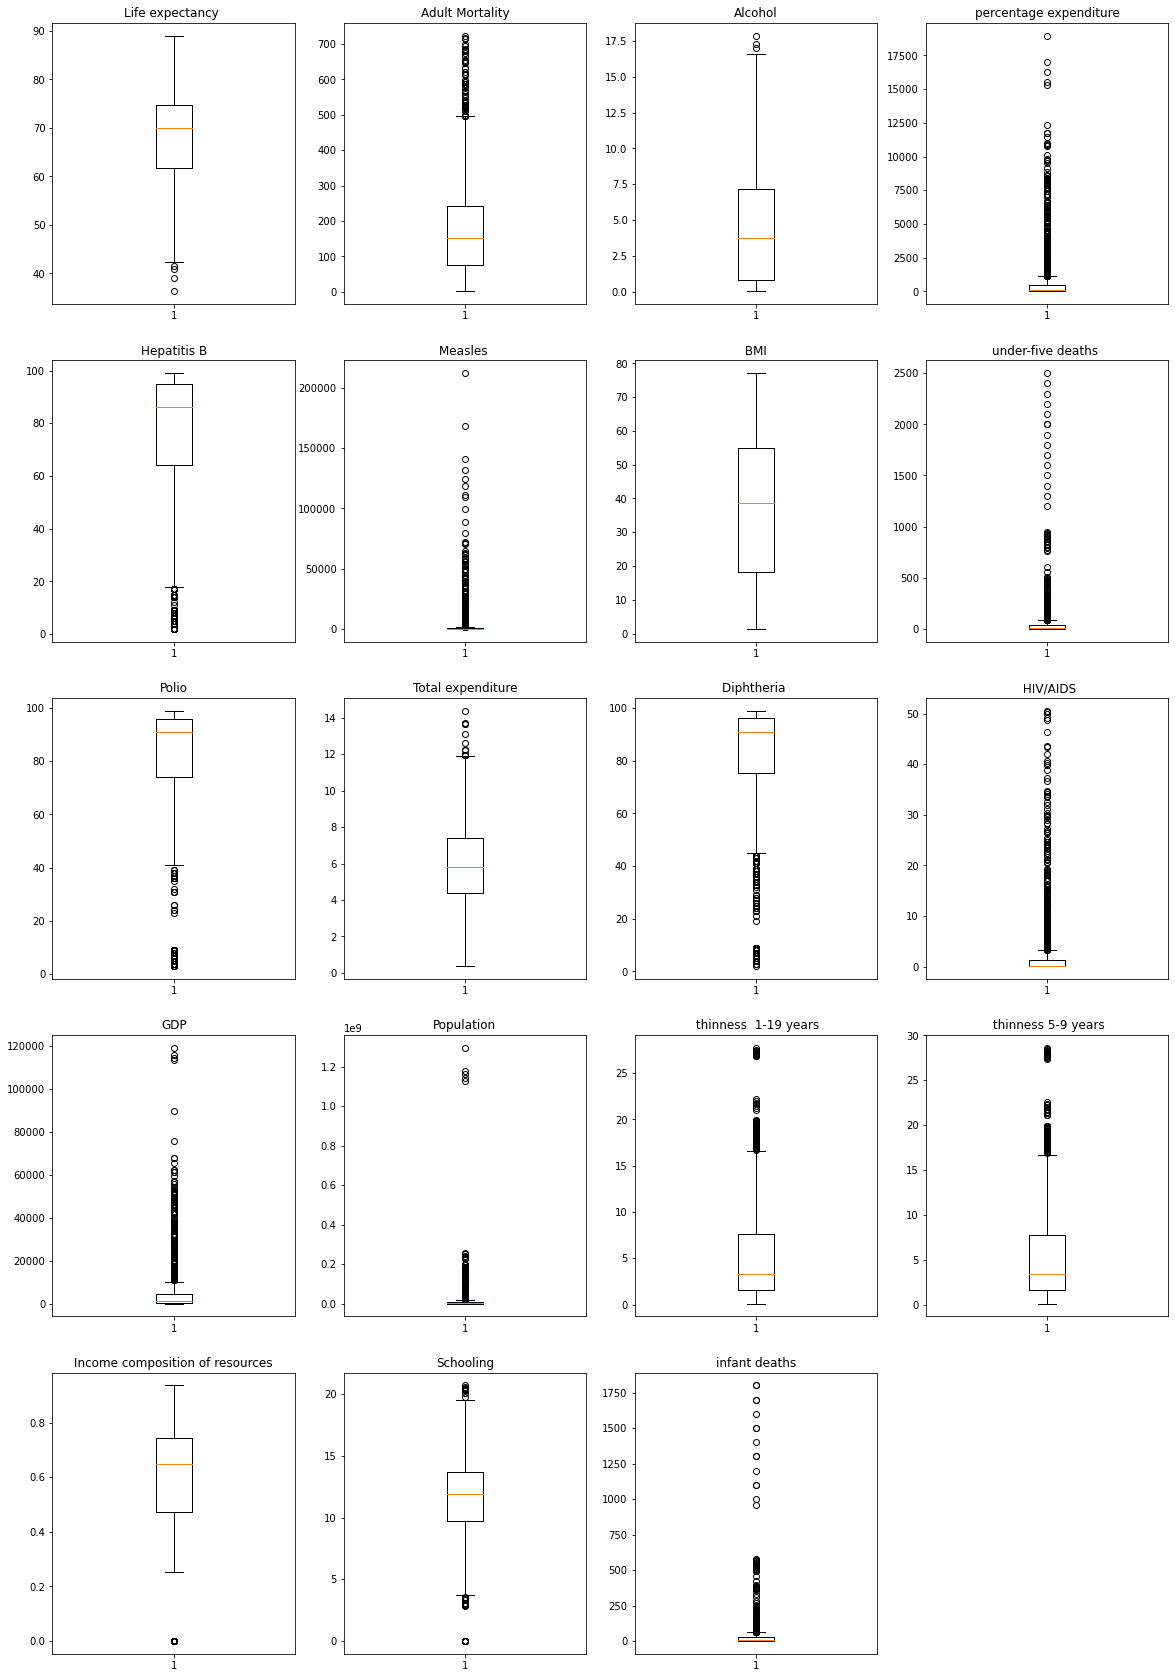

In [12]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(life[variable],whis=1.5)
                     plt.title(variable)

plt.show()

**calculating Number of outliers and thier percentages**

In [13]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(life[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((life[variable] > max_val) | (life[variable] < min_val))[0])),
                                                                             len((np.where((life[variable] > max_val) | (life[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life expectancy  : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in percentage expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in Hepatitis B : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles  : 361 and 18.16809260191243
Number of outliers and percentage of it in  BMI  : 0 and 0.0
Number of outliers and percentage of it in under-five deaths  : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total expenditure : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria  : 195 and 9.813789632611979
Number of outliers and percentage of it in  HIV/AIDS : 309 and 15.551082033215904
Numbe

**Removing the outliers using winsorization **

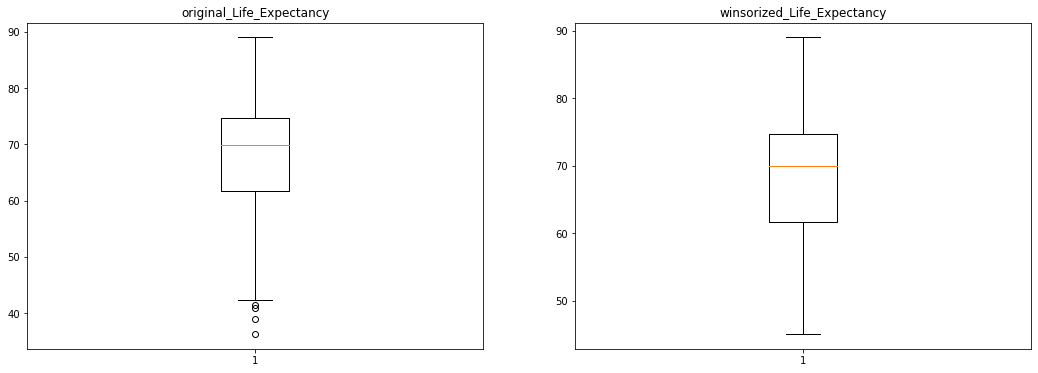

In [14]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Life_Expectancy = life['Life expectancy ']
plt.boxplot(original_Life_Expectancy)
plt.title("original_Life_Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(life['Life expectancy '],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.show()

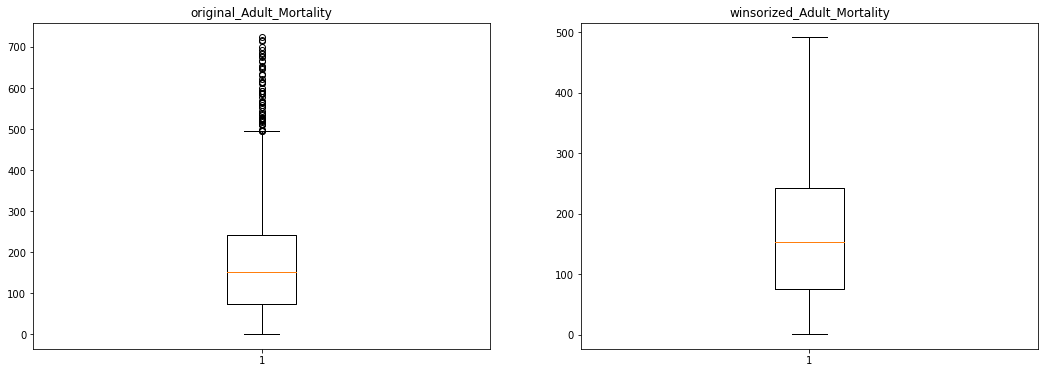

In [15]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = life['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(life['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

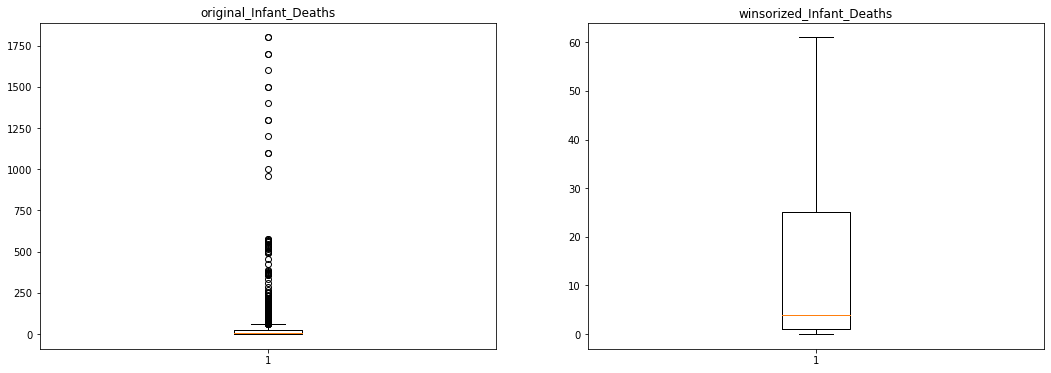

In [16]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = life['infant deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(life['infant deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

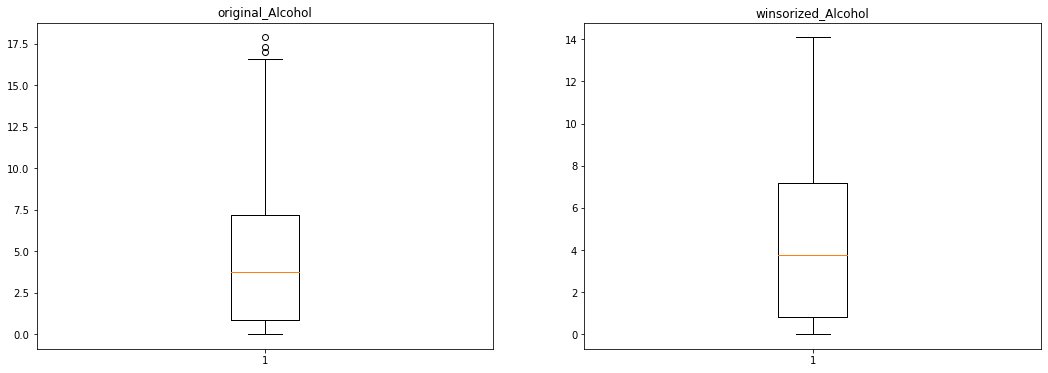

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = life['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(life['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

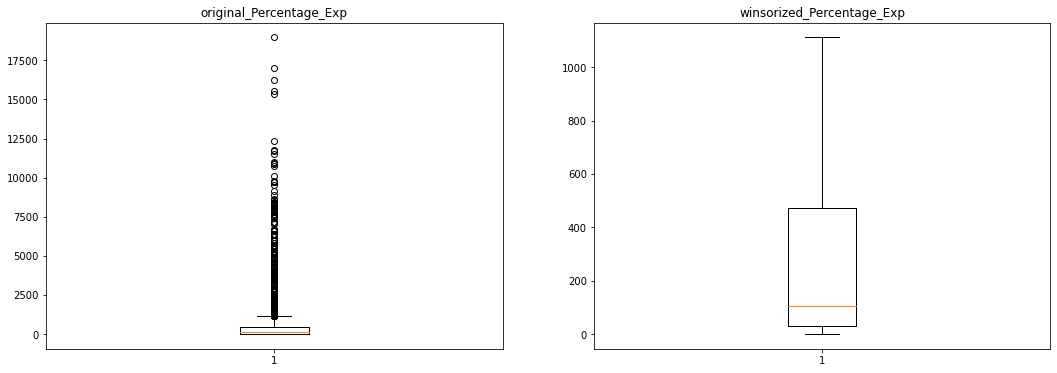

In [18]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = life['percentage expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(life['percentage expenditure'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()


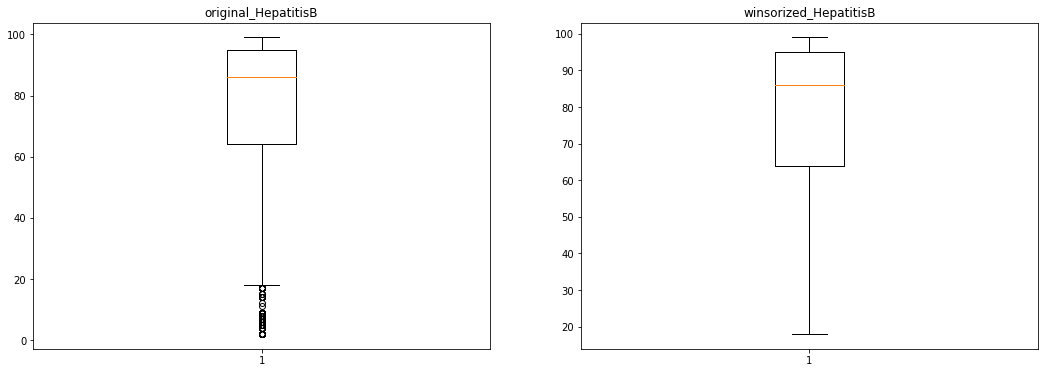

In [19]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = life['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(life['Hepatitis B'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

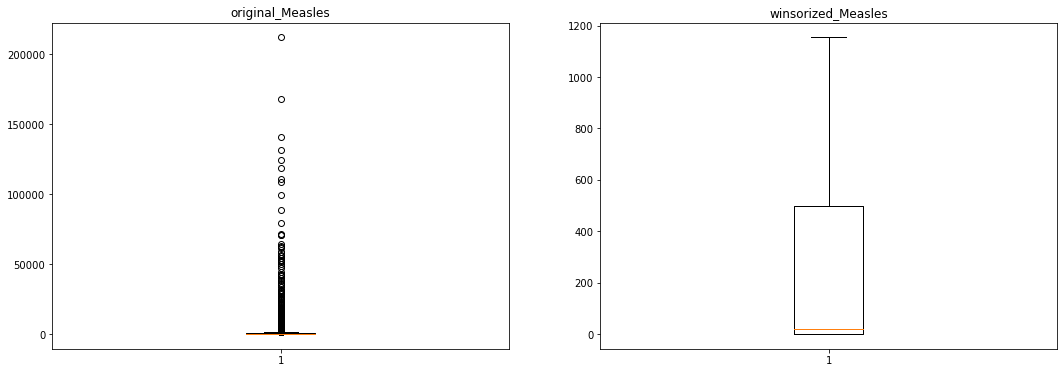

In [20]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = life['Measles ']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(life['Measles '],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

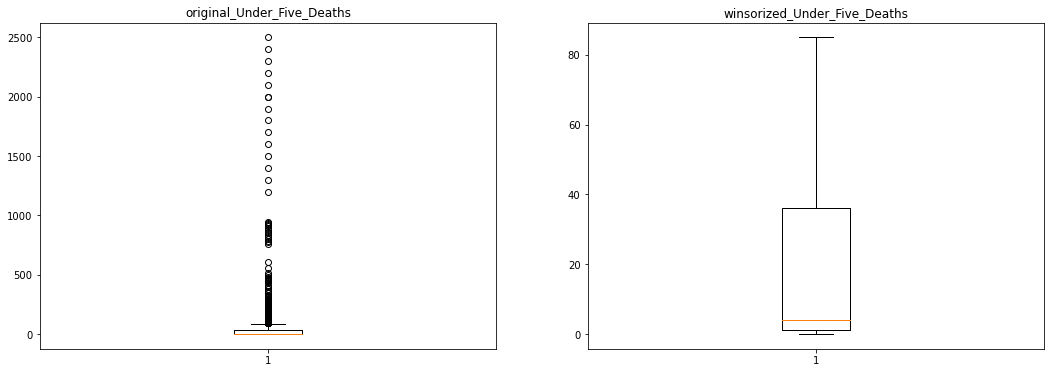

In [21]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = life['under-five deaths ']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(life['under-five deaths '],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

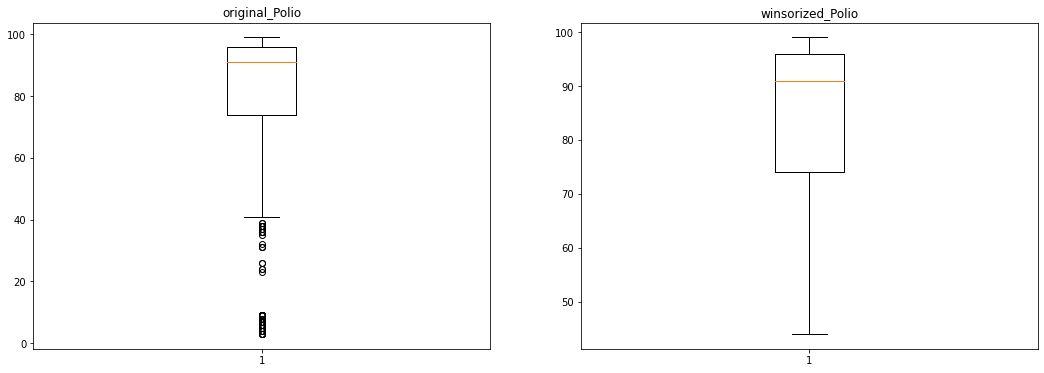

In [22]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = life['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(life['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

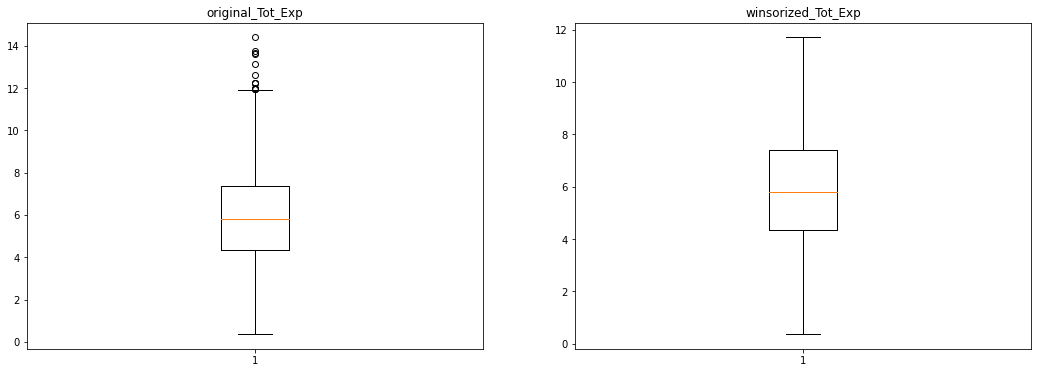

In [23]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Tot_Exp = life['Total expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original_Tot_Exp")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(life['Total expenditure'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.show()

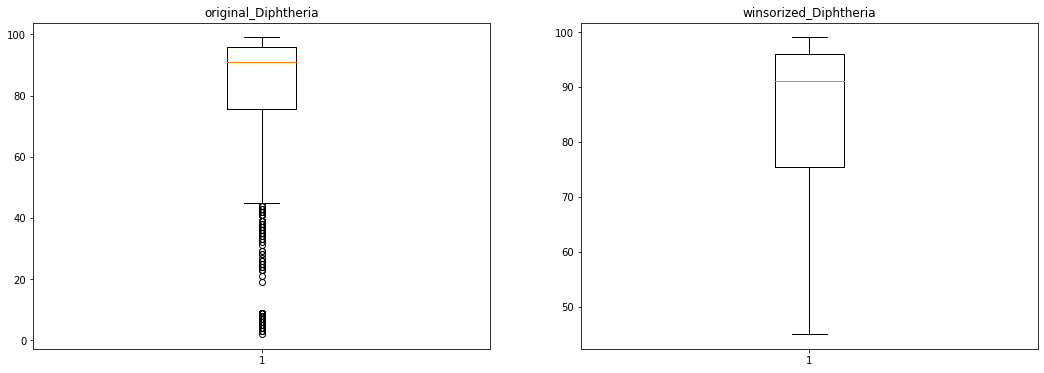

In [24]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = life['Diphtheria ']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(life['Diphtheria '],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

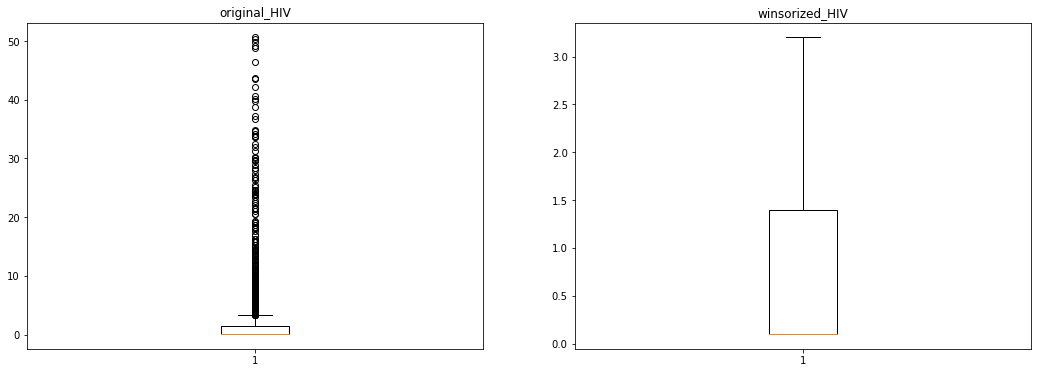

In [25]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = life[' HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(life[' HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

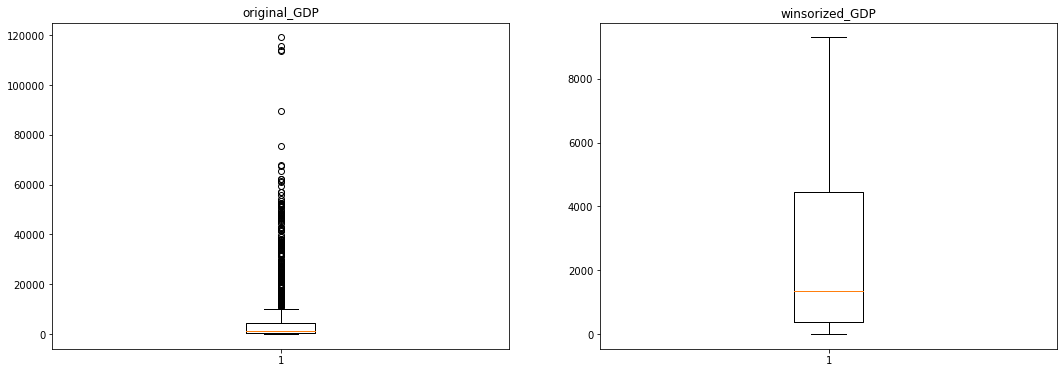

In [26]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = life['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(life['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

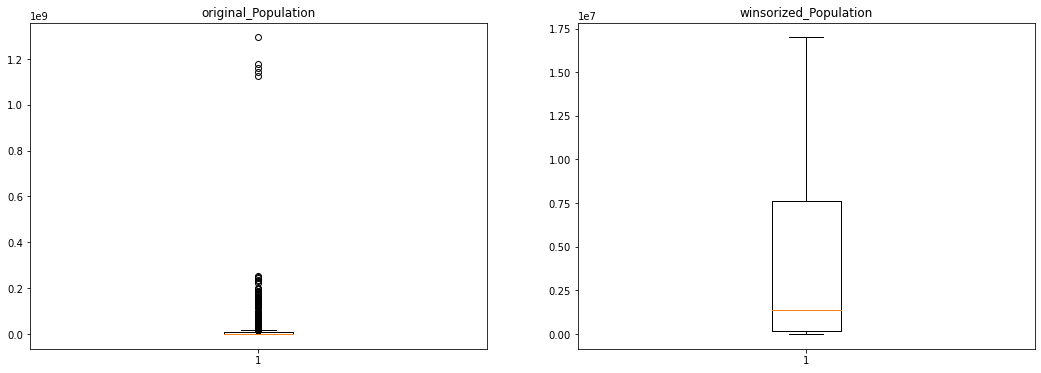

In [27]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = life['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(life['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

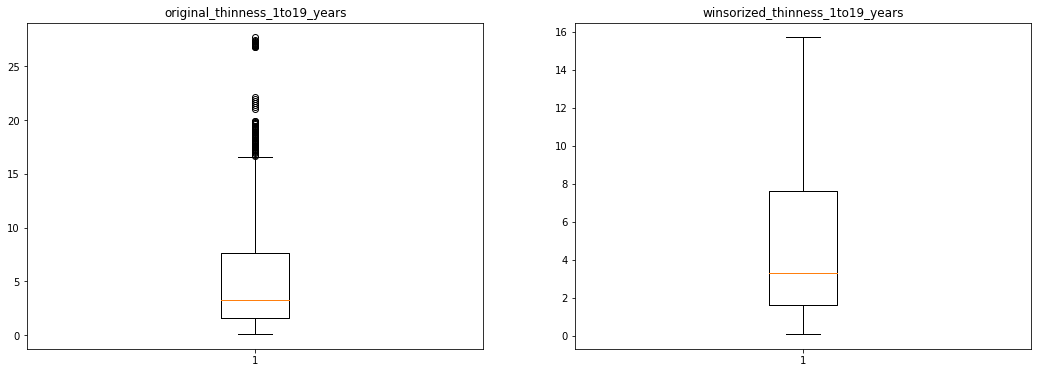

In [28]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = life[' thinness  1-19 years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(life[' thinness  1-19 years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

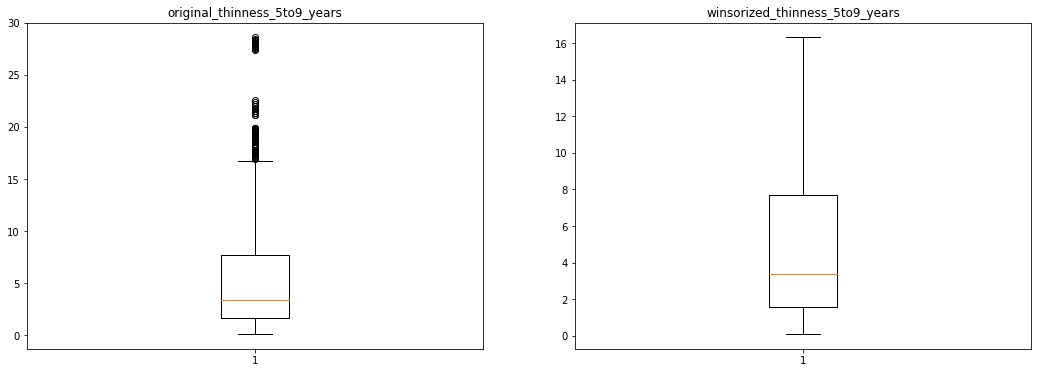

In [29]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = life[' thinness 5-9 years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(life[' thinness 5-9 years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

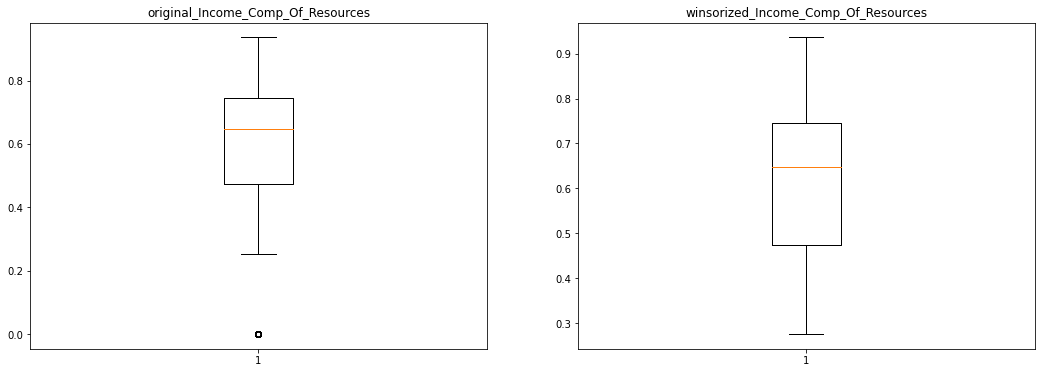

In [30]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = life['Income composition of resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(life['Income composition of resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

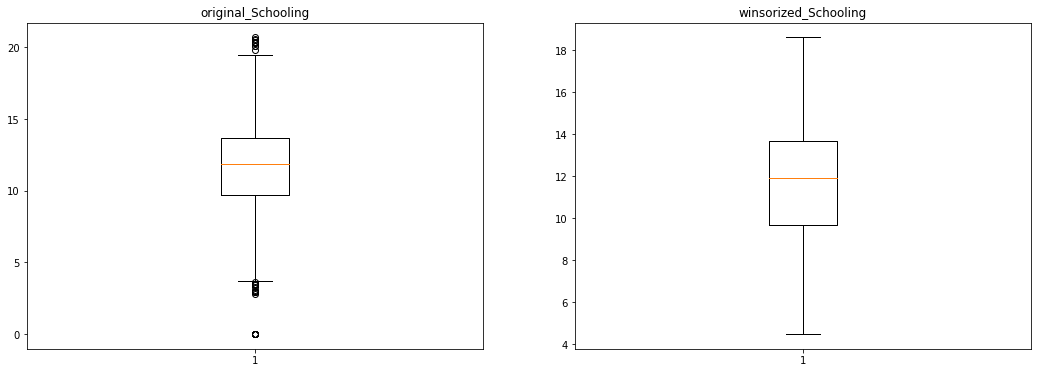

In [31]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = life['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(life['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

**Now again calculating Number of outliers after winsorization**

In [32]:
winsorized_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Measles,winsorized_Infant_Deaths,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in winsorized_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization   : {} ".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 


**Adding winsorized variables to our dataframe**

In [33]:
life['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
life['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
life['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
life['winsorized_Alcohol'] = winsorized_Alcohol
life['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
life['winsorized_HepatitisB'] = winsorized_HepatitisB
life['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
life['winsorized_Polio'] = winsorized_Polio
life['winsorized_Tot_Exp'] = winsorized_Tot_Exp
life['winsorized_Diphtheria'] = winsorized_Diphtheria
life['winsorized_HIV'] = winsorized_HIV
life['winsorized_GDP'] = winsorized_GDP
life['winsorized_Population'] = winsorized_Population
life['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
life['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
life['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
life['winsorized_Schooling'] = winsorized_Schooling
life['winsorized_Measles'] = winsorized_Measles

# Exploratory Data analysis

In [34]:
life.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   winsorized_Tot_Exp  winsorized_Diphtheria  winsorized_HIV  winsorized_GDP  \
0                8.16                   65.0             0.1      584.259210   
1                8.18                   62.0             0.1      612.696514   
2                8.13                   64.0             0.1      631.744976   
3                8.52                   67.0             0.1      669.959000   
4                7.87                   68.0             0.1       63.537231   

   winsorized_Population  winsorized_thinness_1to19_years  \
0             16993354.0                             15.7   
1               327582.0                             15.7   
2             16993354.0                             15.7   
3              3696958.0                             15.7   
4              2978599.0                             15.7   

   winsorized_thinness_5to9_years  winsorized_Income_Comp_Of_Resources  \
0                            16.3                                0.479   
1                            16.3                                0.476   
2                            16.3                                0.470   
3                            16.3                                0.463   
4                            16.3                                0.454   

   winsorized_Schooling  winsorized_Measles  
0                  10.1                1154  
1                  10.0                 492  
2                   9.9                 430  
3                   9.8                1154  
4                   9.5                1154  

[5 rows x 40 columns]

In [35]:
life.size

79480

In [36]:
life.shape

(1987, 40)

In [37]:
life.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  1987.000000       1987.000000      1987.000000    1987.000000   
mean   2006.984902         67.981782       175.187217      36.623553   
std       4.323147          9.706401       131.616942     138.784913   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2003.000000         61.700000        75.000000       1.000000   
50%    2007.000000         69.900000       153.000000       4.000000   
75%    2011.000000         74.700000       243.000000      25.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  1987.000000             1987.000000   1987.00000    1987.000000   
mean      4.455644              685.492318     73.86160    2729.561651   
std       3.976733             1761.669050     29.02807   12102.389143   
min       0.010000                0.000000      2.00000       0.000000   
25%       0.830000               29.469887     64.00000       0.000000   
50%       3.770000              104.314473     86.00000      20.000000   
75%       7.190000              470.870122     95.00000     499.500000   
max      17.870000            18961.348600     99.00000  212183.000000   

              BMI   under-five deaths   ...  winsorized_Tot_Exp  \
count  1987.000000         1987.000000  ...         1987.000000   
mean     36.428636           50.932562  ...            5.895471   
std      19.736138          188.933117  ...            2.266421   
min       1.400000            0.000000  ...            0.370000   
25%      18.150000            1.000000  ...            4.360000   
50%      38.700000            4.000000  ...            5.800000   
75%      55.000000           36.000000  ...            7.385000   
max      77.100000         2500.000000  ...           11.700000   

       winsorized_Diphtheria  winsorized_HIV  winsorized_GDP  \
count            1987.000000     1987.000000     1987.000000   
mean               83.225969        0.874082     2864.719760   
std                17.239348        1.183198     3186.069874   
min                45.000000        0.100000        1.681350   
25%                75.500000        0.100000      384.553107   
50%                91.000000        0.100000     1334.651896   
75%                96.000000        1.400000     4441.530655   
max                99.000000        3.200000     9291.227619   

       winsorized_Population  winsorized_thinness_1to19_years  \
count           1.987000e+03                      1987.000000   
mean            4.799769e+06                         4.955561   
std             6.217060e+06                         4.187776   
min             3.400000e+01                         0.100000   
25%             1.967480e+05                         1.600000   
50%             1.396861e+06                         3.300000   
75%             7.625918e+06                         7.600000   
max             1.699335e+07                        15.700000   

       winsorized_thinness_5to9_years  winsorized_Income_Comp_Of_Resources  \
count                     1987.000000                          1987.000000   
mean                         5.024006                             0.616143   
std                          4.265385                             0.174584   
min                          0.100000                             0.276000   
25%                          1.600000                             0.473000   
50%                          3.400000                             0.648000   
75%                          7.700000                             0.745000   
max                         16.300000                             0.936000   

       winsorized_Schooling  winsorized_Measles  
count           1987.000000         1987.000000  
mean              11.658581          304.742828  
std                3.102260          456.738004  
min                4.500000 

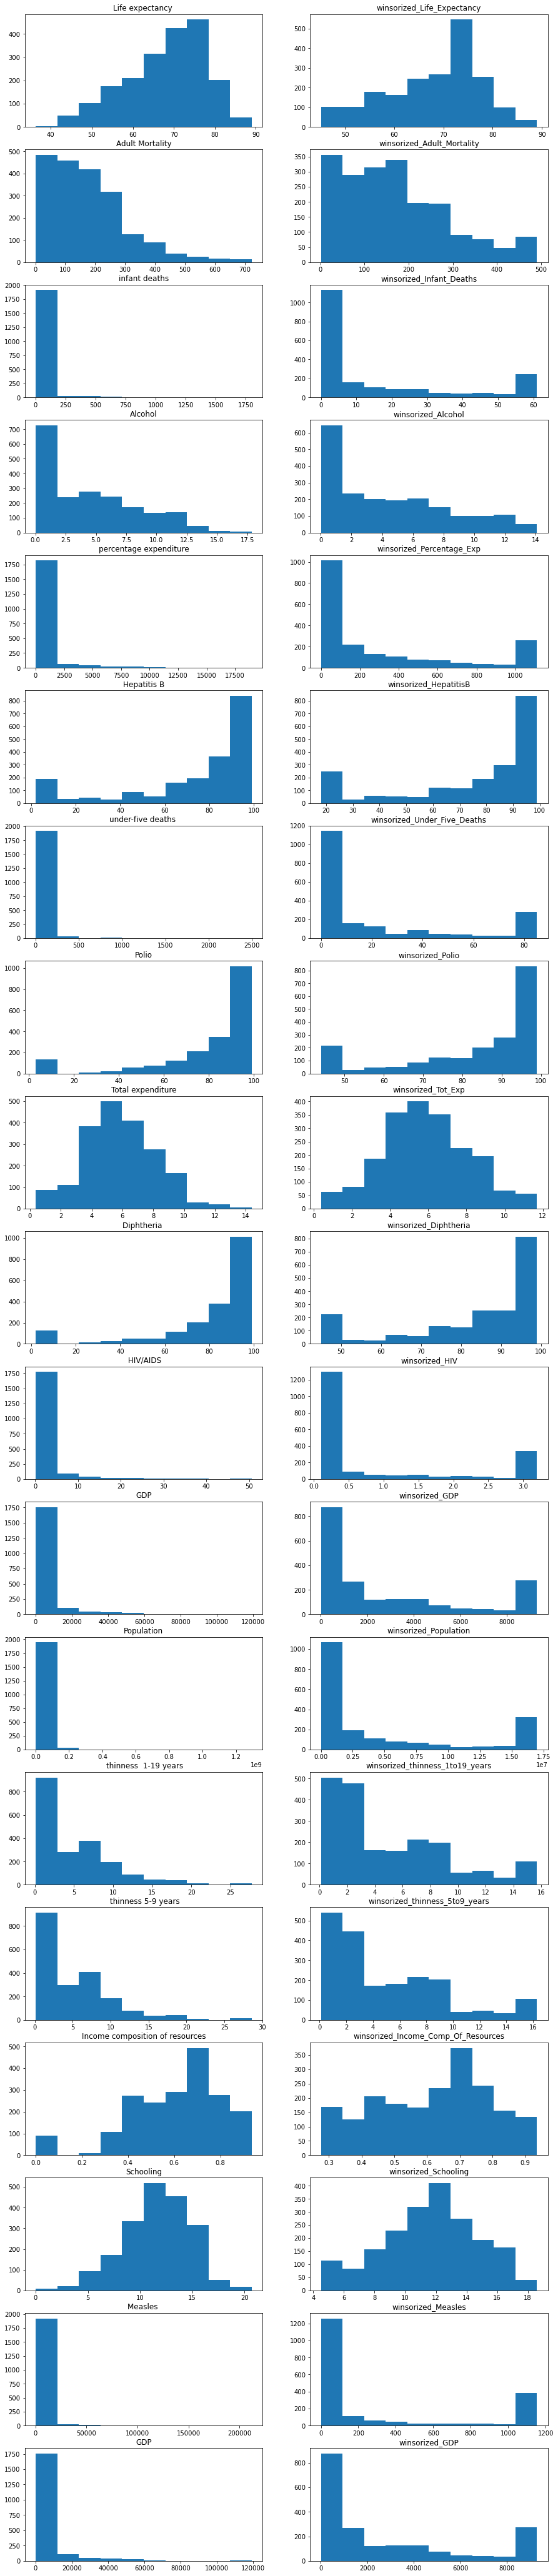

In [38]:

all_col = ['Life expectancy ','winsorized_Life_Expectancy','Adult Mortality','winsorized_Adult_Mortality','infant deaths',
         'winsorized_Infant_Deaths','Alcohol','winsorized_Alcohol','percentage expenditure','winsorized_Percentage_Exp','Hepatitis B',
         'winsorized_HepatitisB','under-five deaths ','winsorized_Under_Five_Deaths','Polio','winsorized_Polio','Total expenditure',
         'winsorized_Tot_Exp','Diphtheria ','winsorized_Diphtheria',' HIV/AIDS','winsorized_HIV','GDP','winsorized_GDP',
         'Population','winsorized_Population',' thinness  1-19 years','winsorized_thinness_1to19_years',' thinness 5-9 years',
         'winsorized_thinness_5to9_years','Income composition of resources','winsorized_Income_Comp_Of_Resources',
         'Schooling','winsorized_Schooling','Measles ','winsorized_Measles','GDP','winsorized_GDP']

plt.figure(figsize=(15,75))

for i in range(len(all_col)):
    plt.subplot(19,2,i+1)
    plt.hist(life[all_col[i]])
    plt.title(all_col[i])

plt.show()


In [39]:
life.describe(include= 'O')

Country      Status
count          1987        1987
unique          133           2
top     Afghanistan  Developing
freq             16        1702

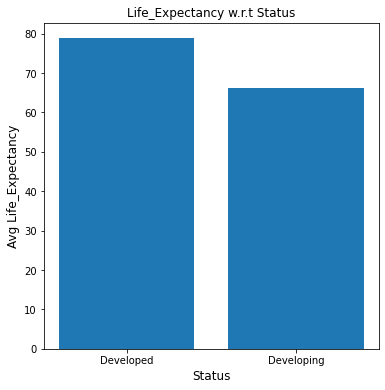

In [40]:
plt.figure(figsize=(6,6))
plt.bar(life.groupby('Status')['Status'].count().index,life.groupby('Status')['winsorized_Life_Expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Status")
plt.show()


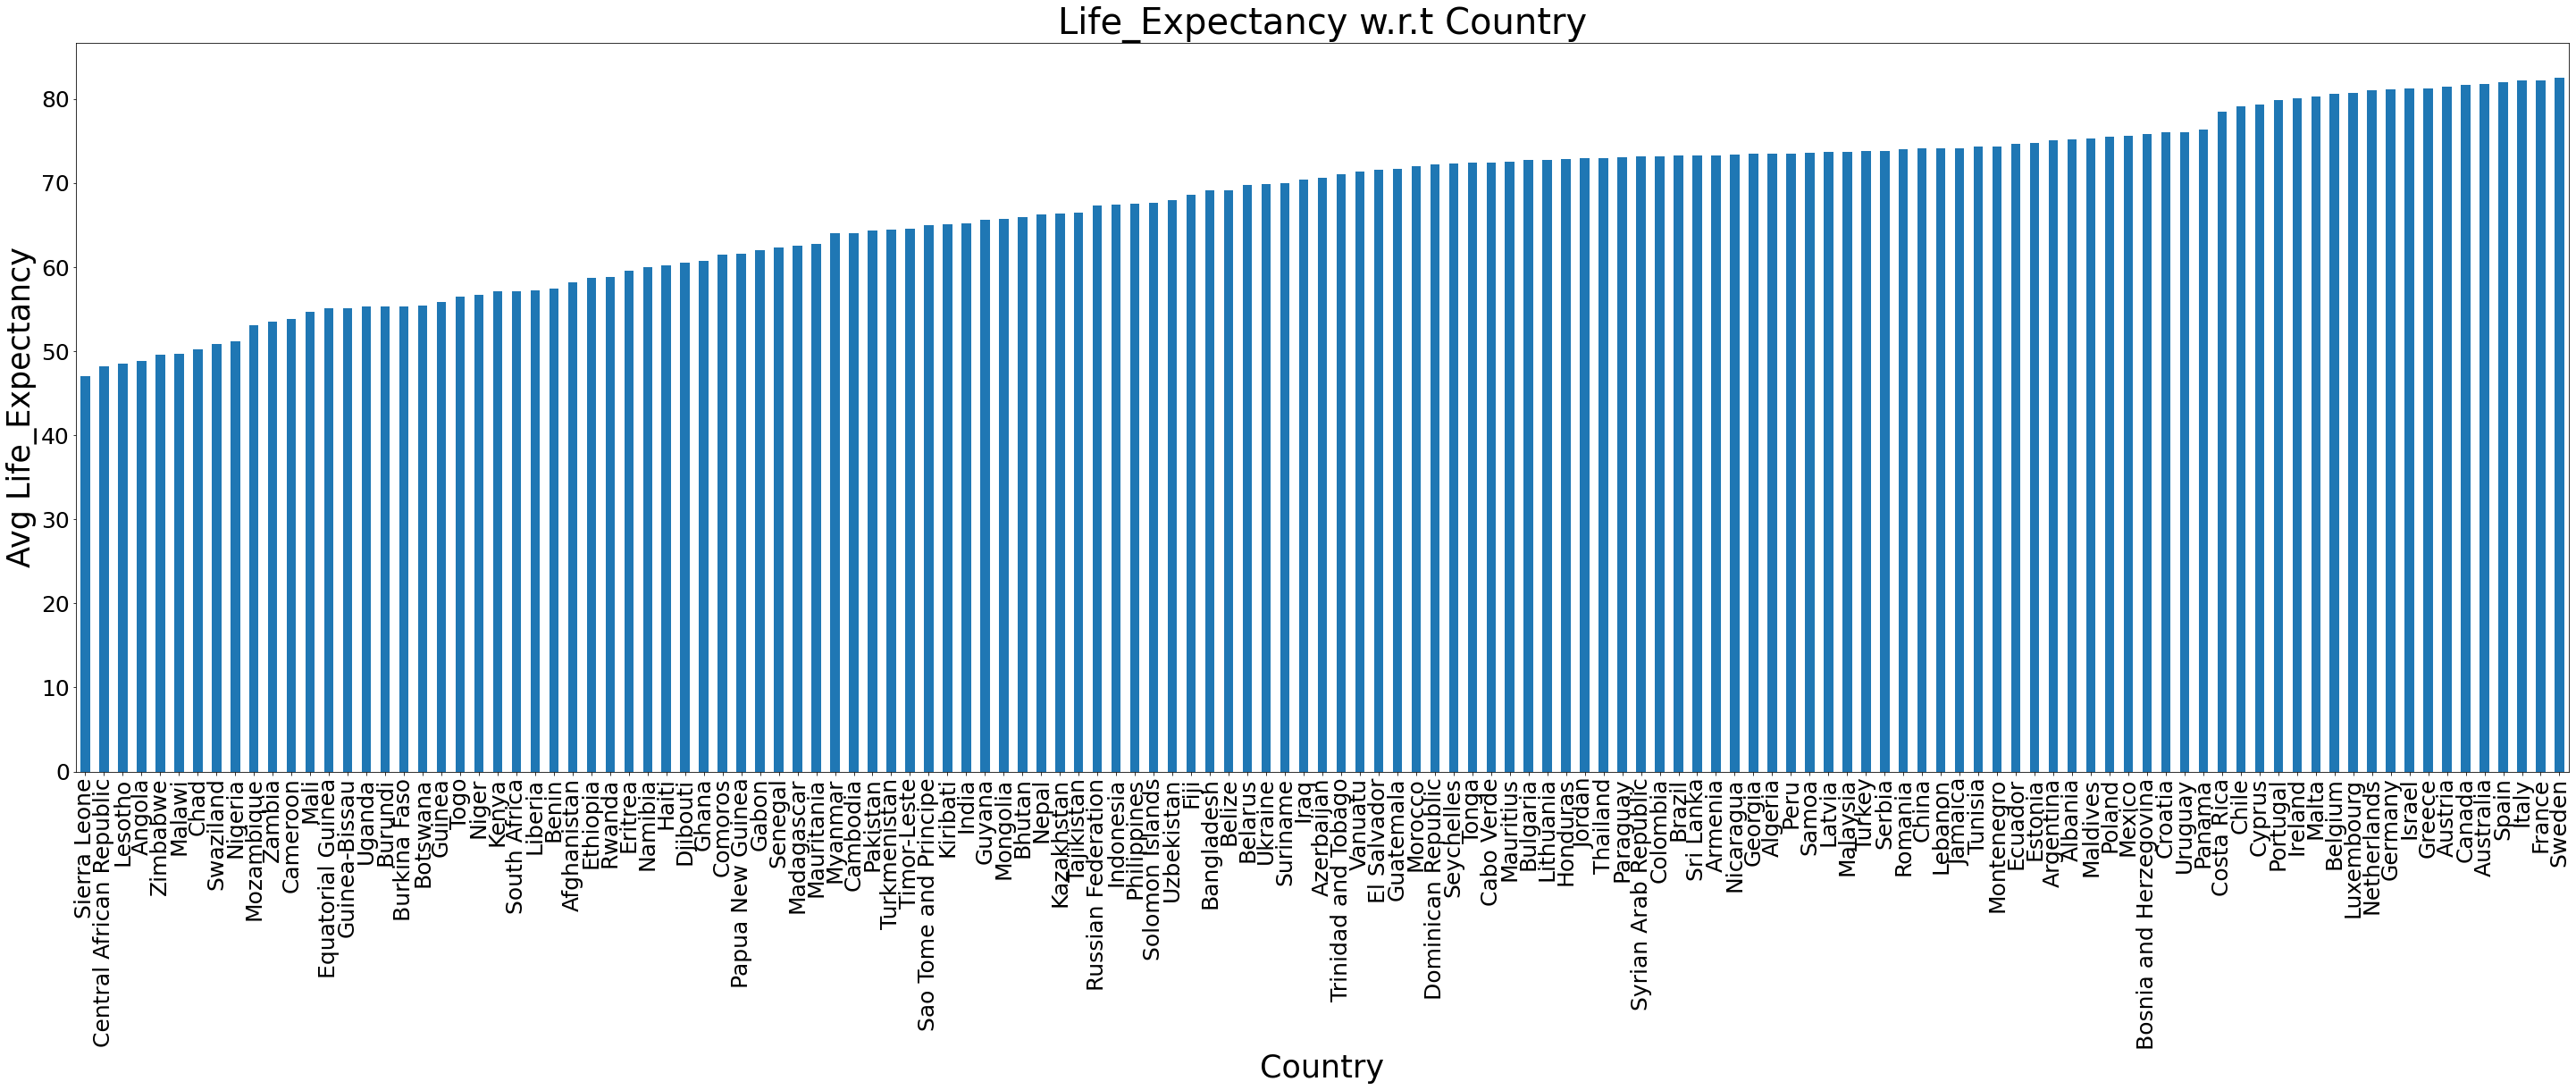

In [41]:
le_country = life.groupby('Country')['winsorized_Life_Expectancy'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

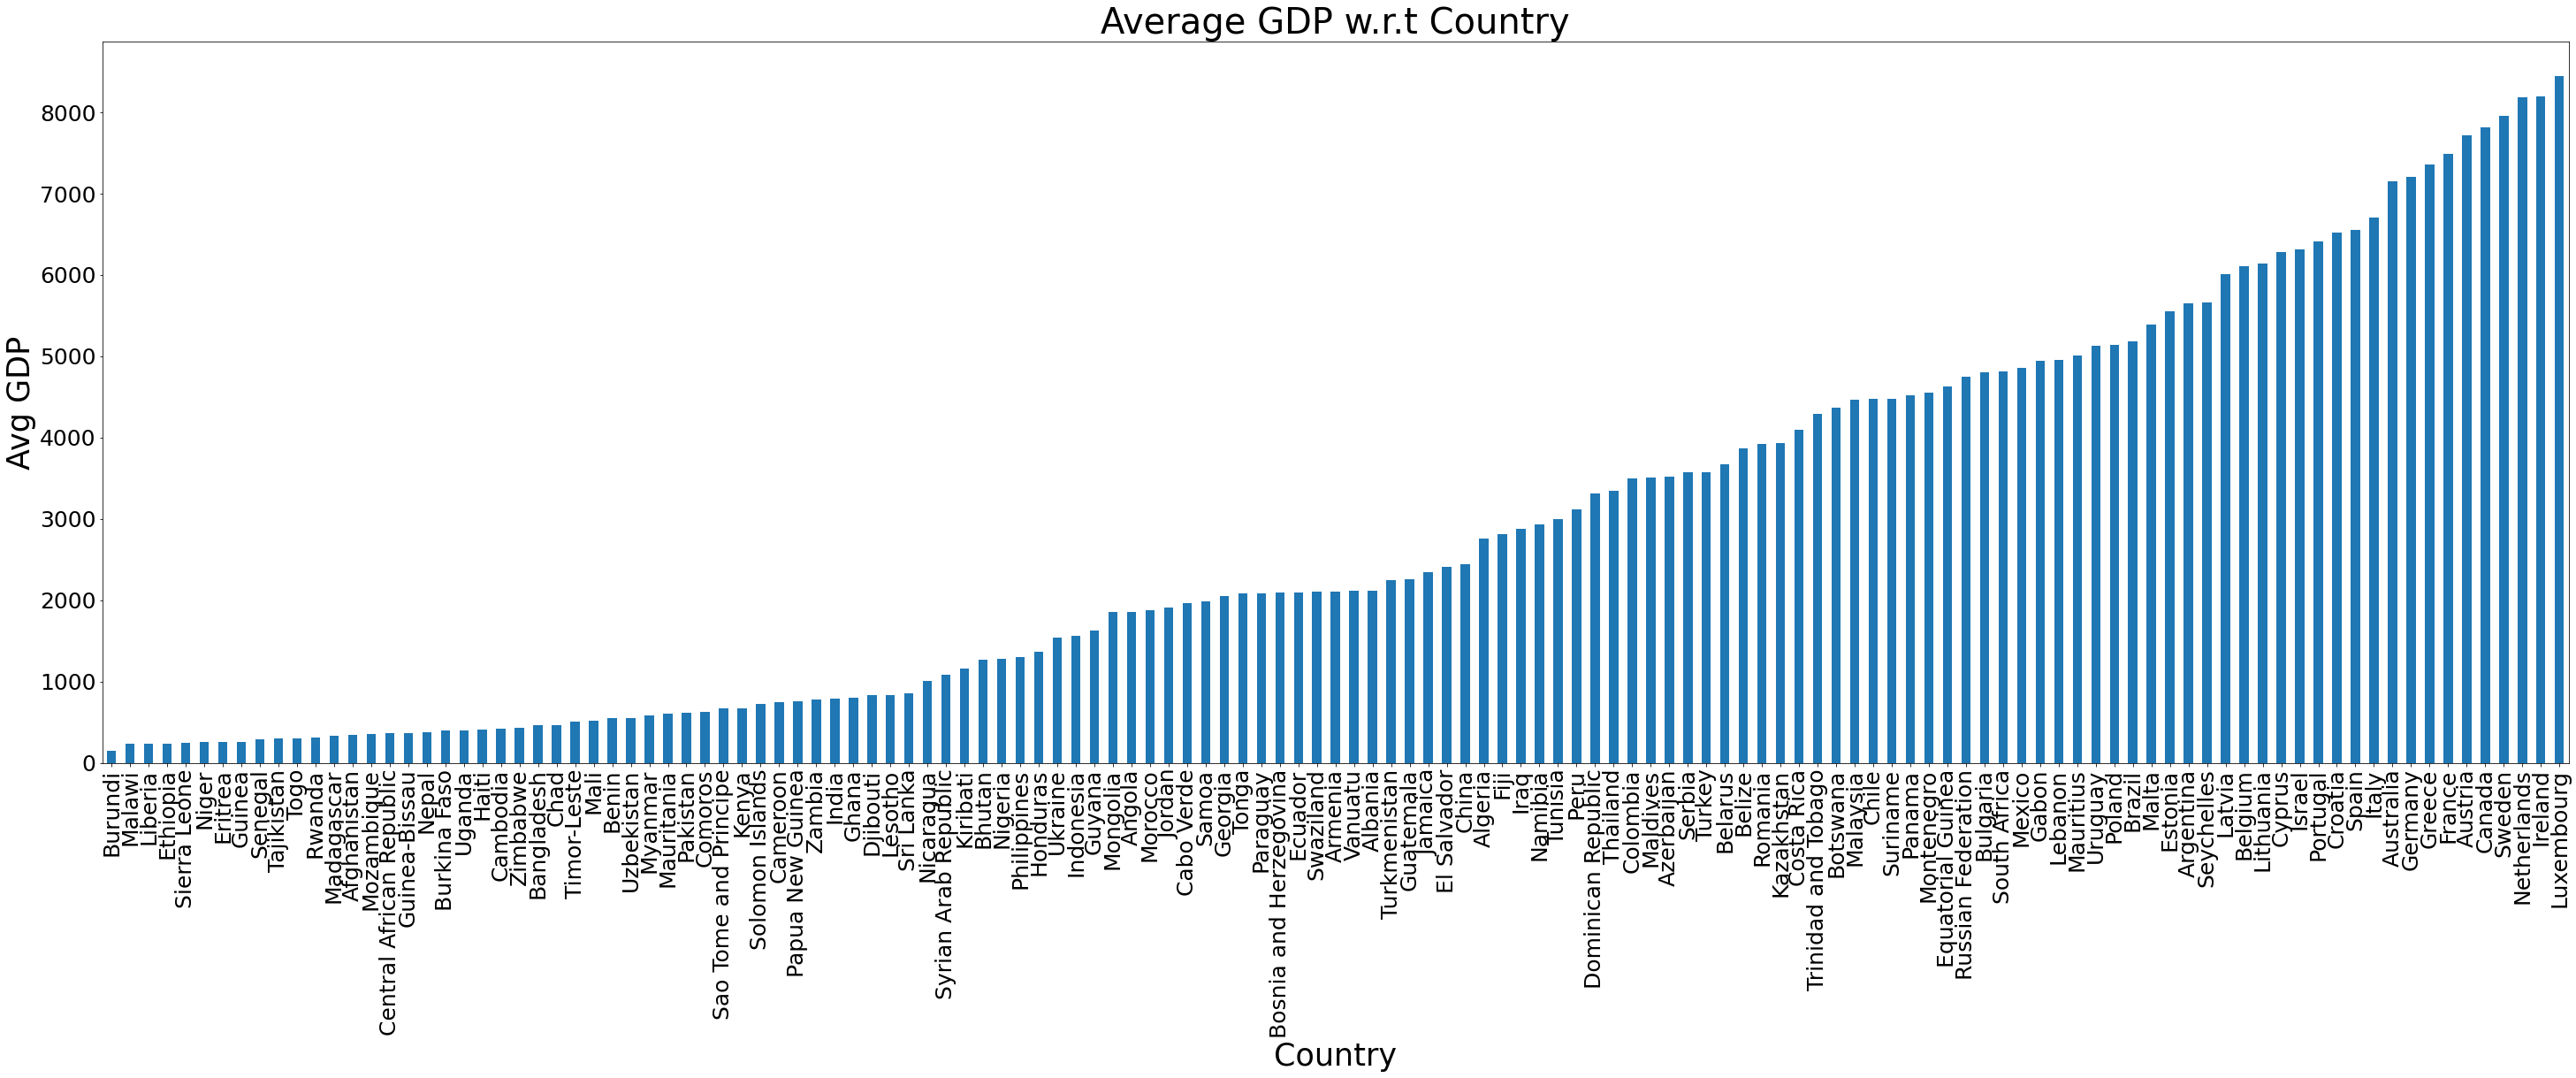

In [42]:
le_country = life.groupby('Country')['winsorized_GDP'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Average GDP w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg GDP",fontsize=35)
plt.show()

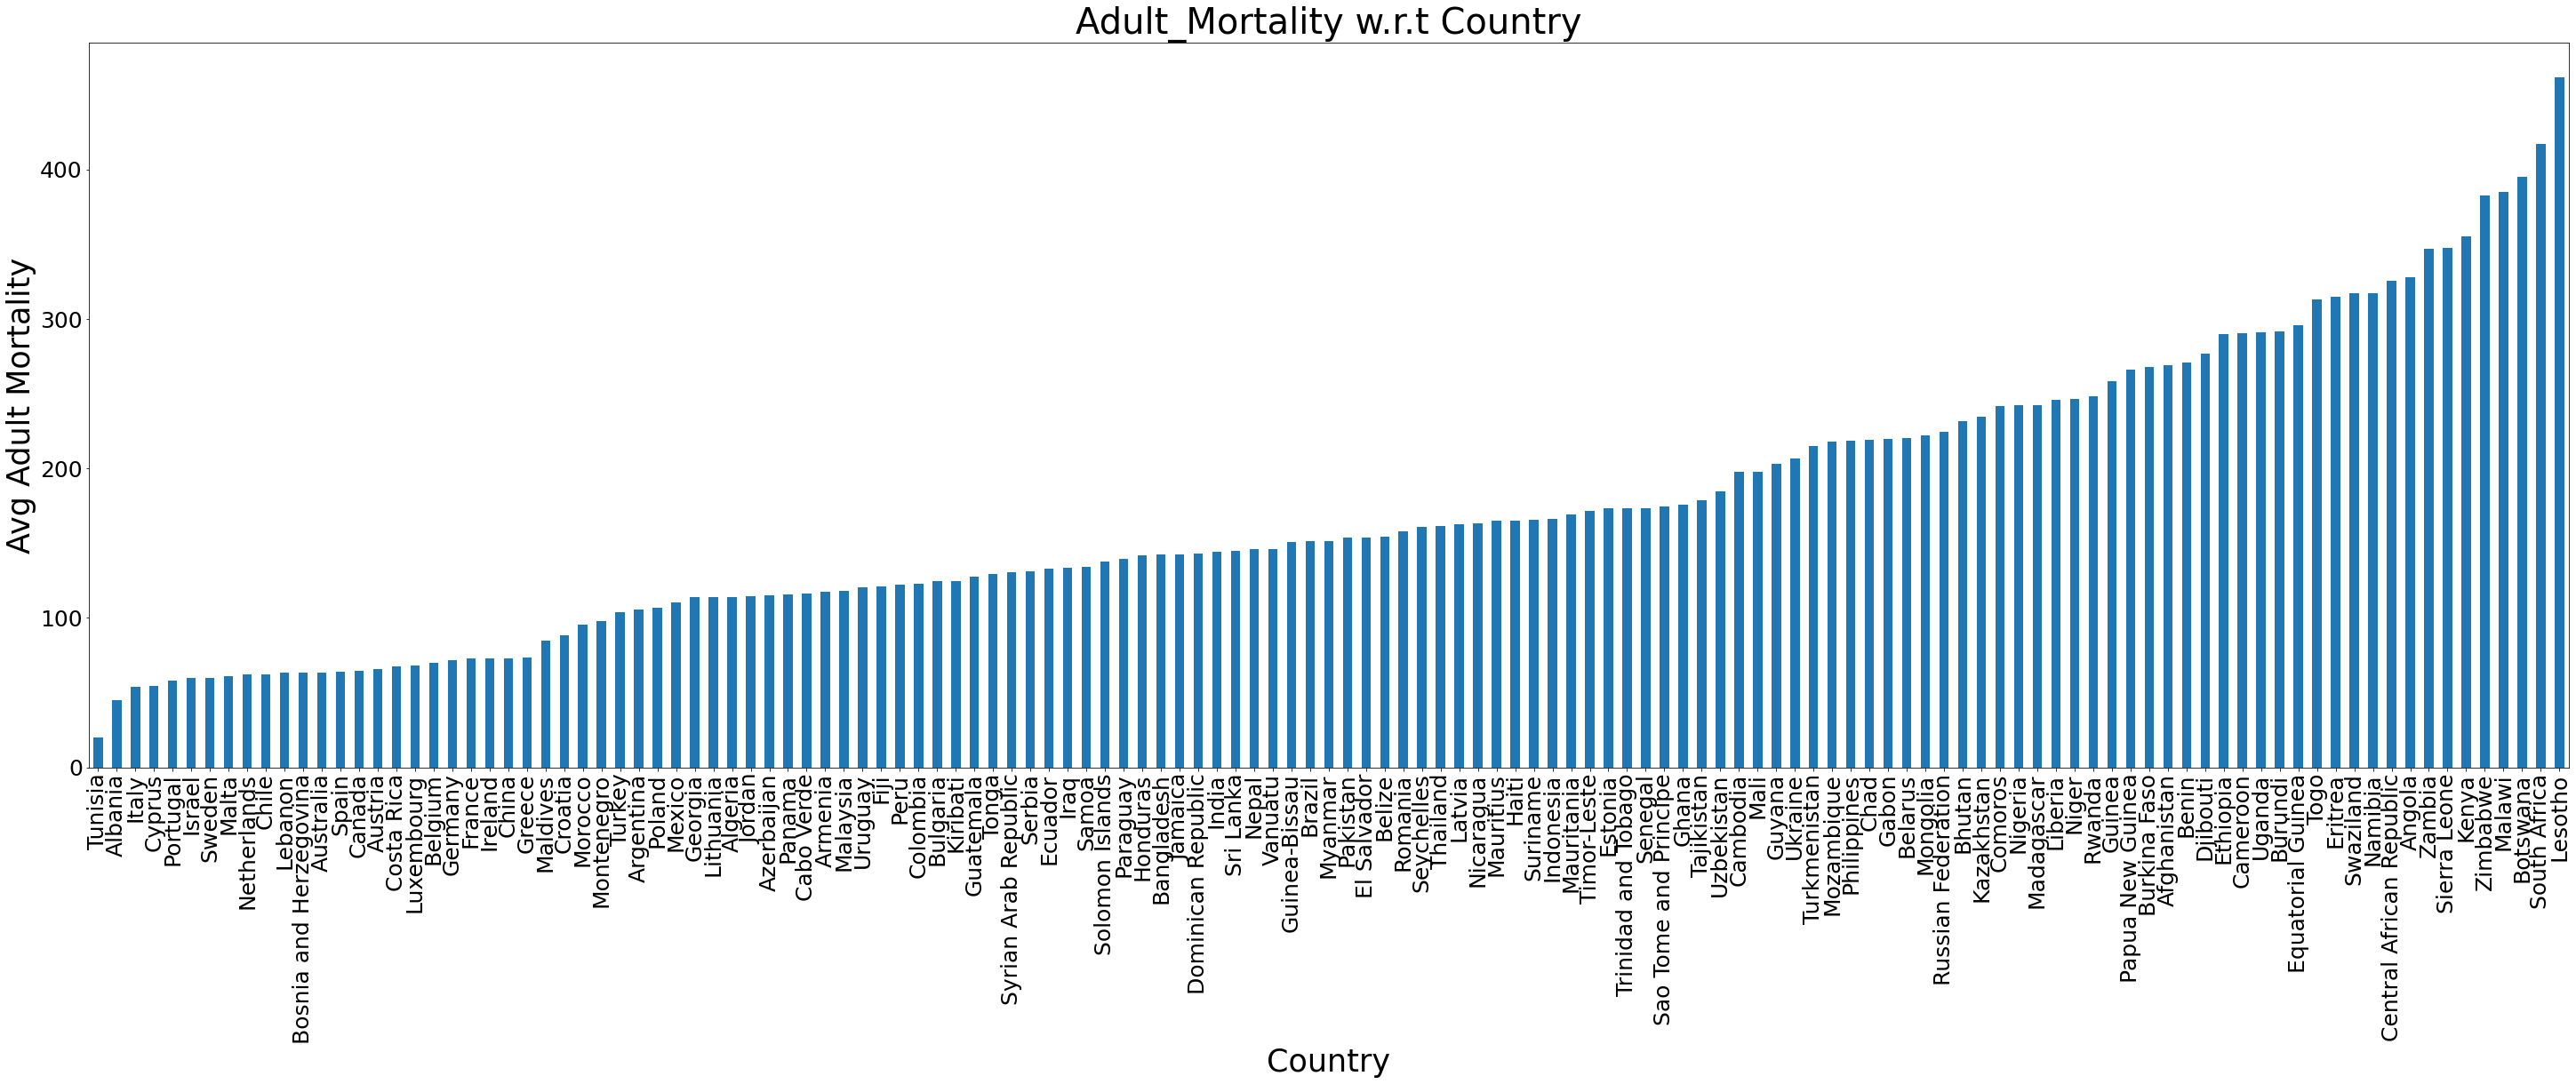

In [43]:
le_country = life.groupby('Country')['winsorized_Adult_Mortality'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Adult_Mortality w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Adult Mortality",fontsize=35)
plt.show()

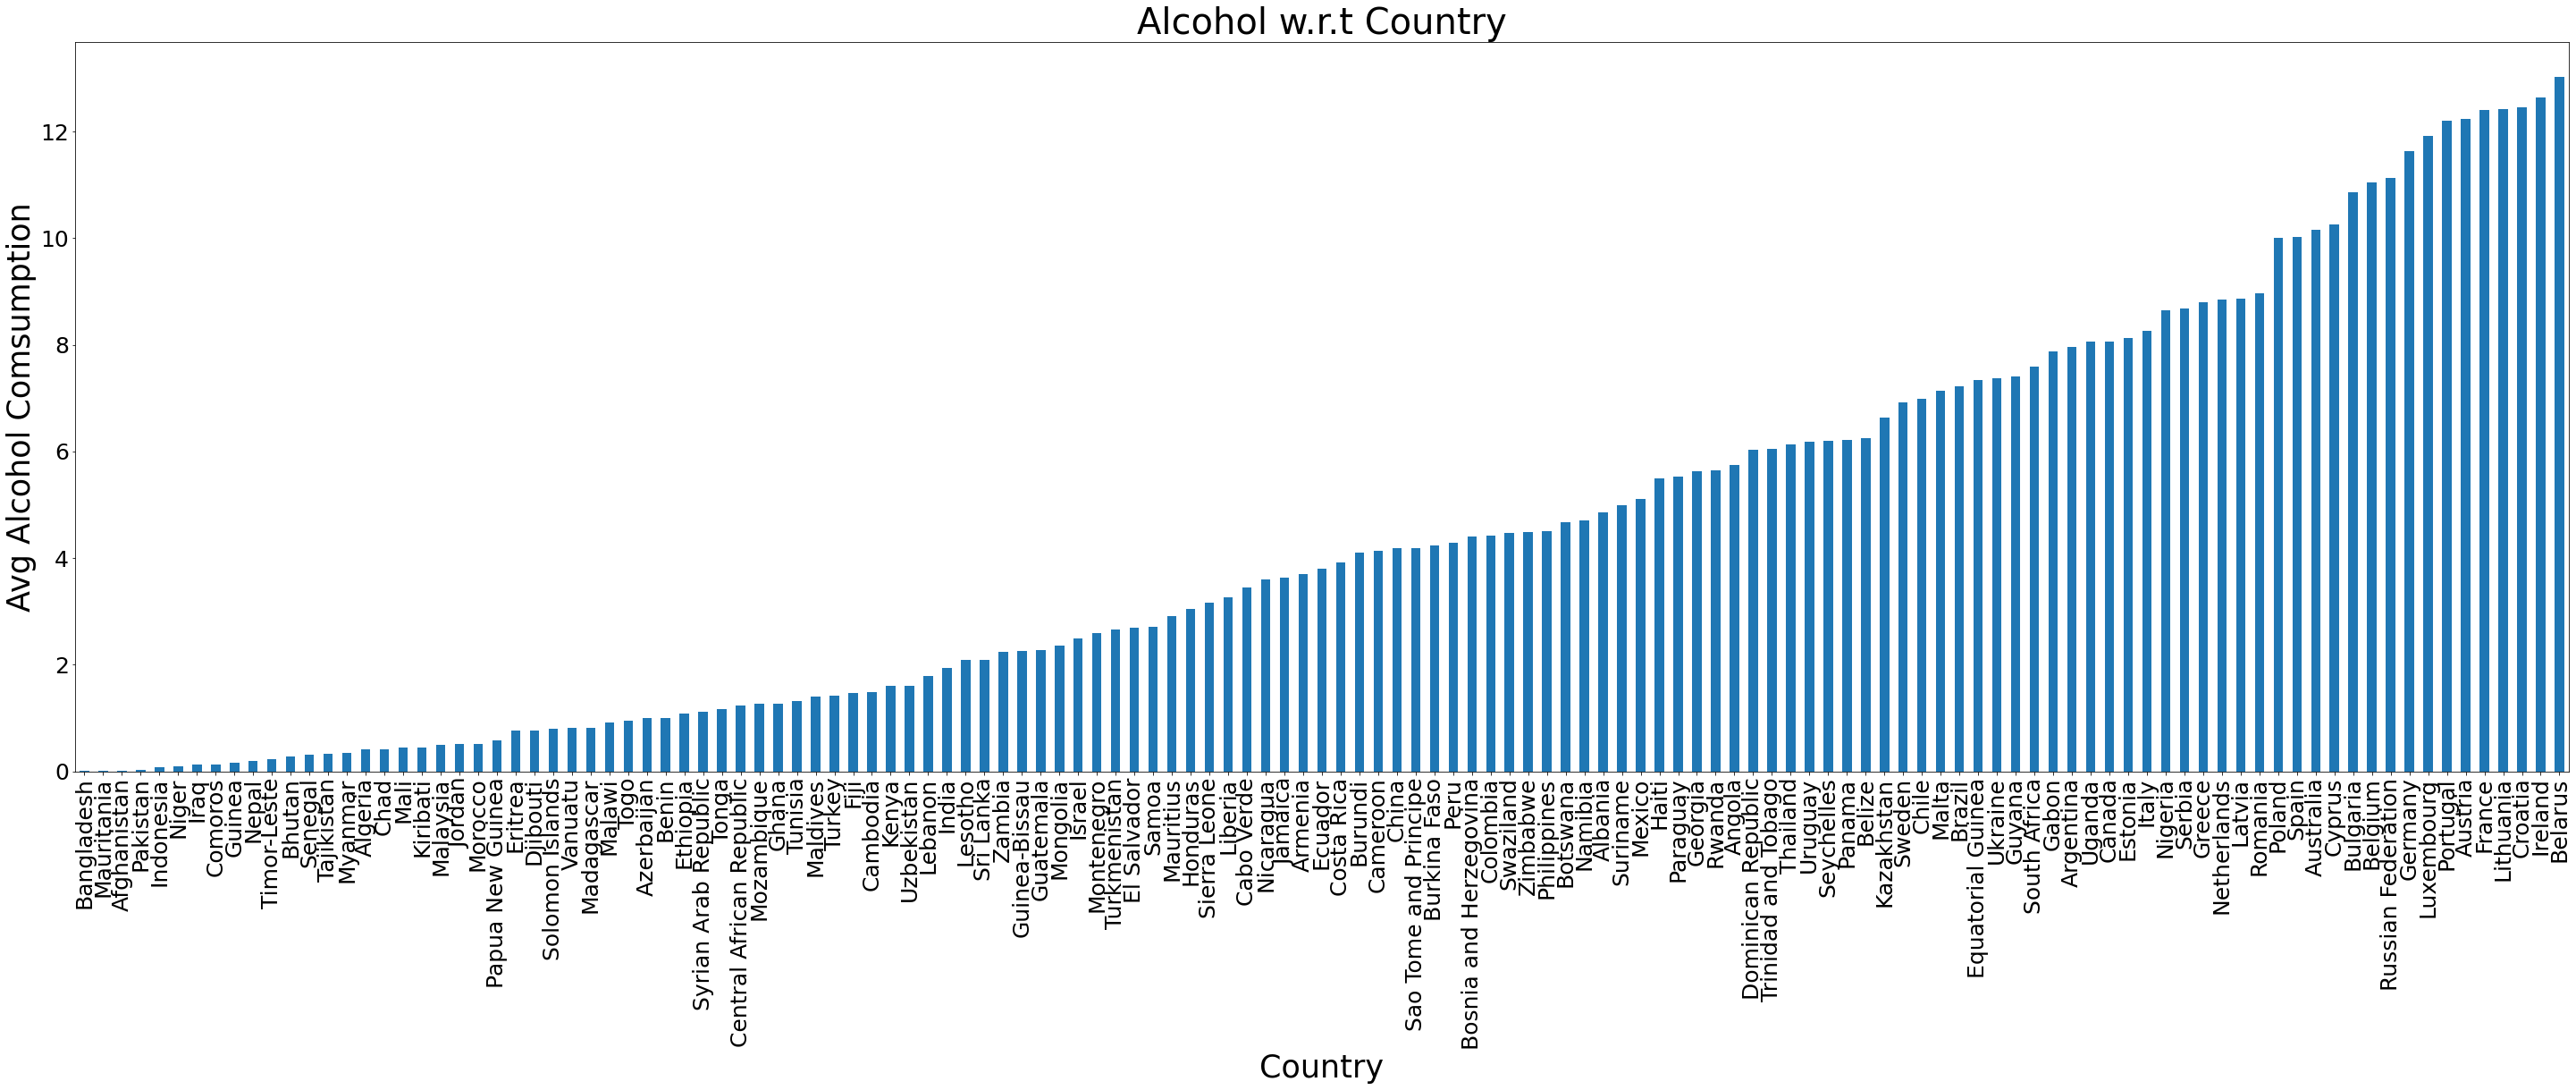

In [44]:
le_country = life.groupby('Country')['winsorized_Alcohol'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Alcohol w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Alcohol Comsumption",fontsize=35)
plt.show()

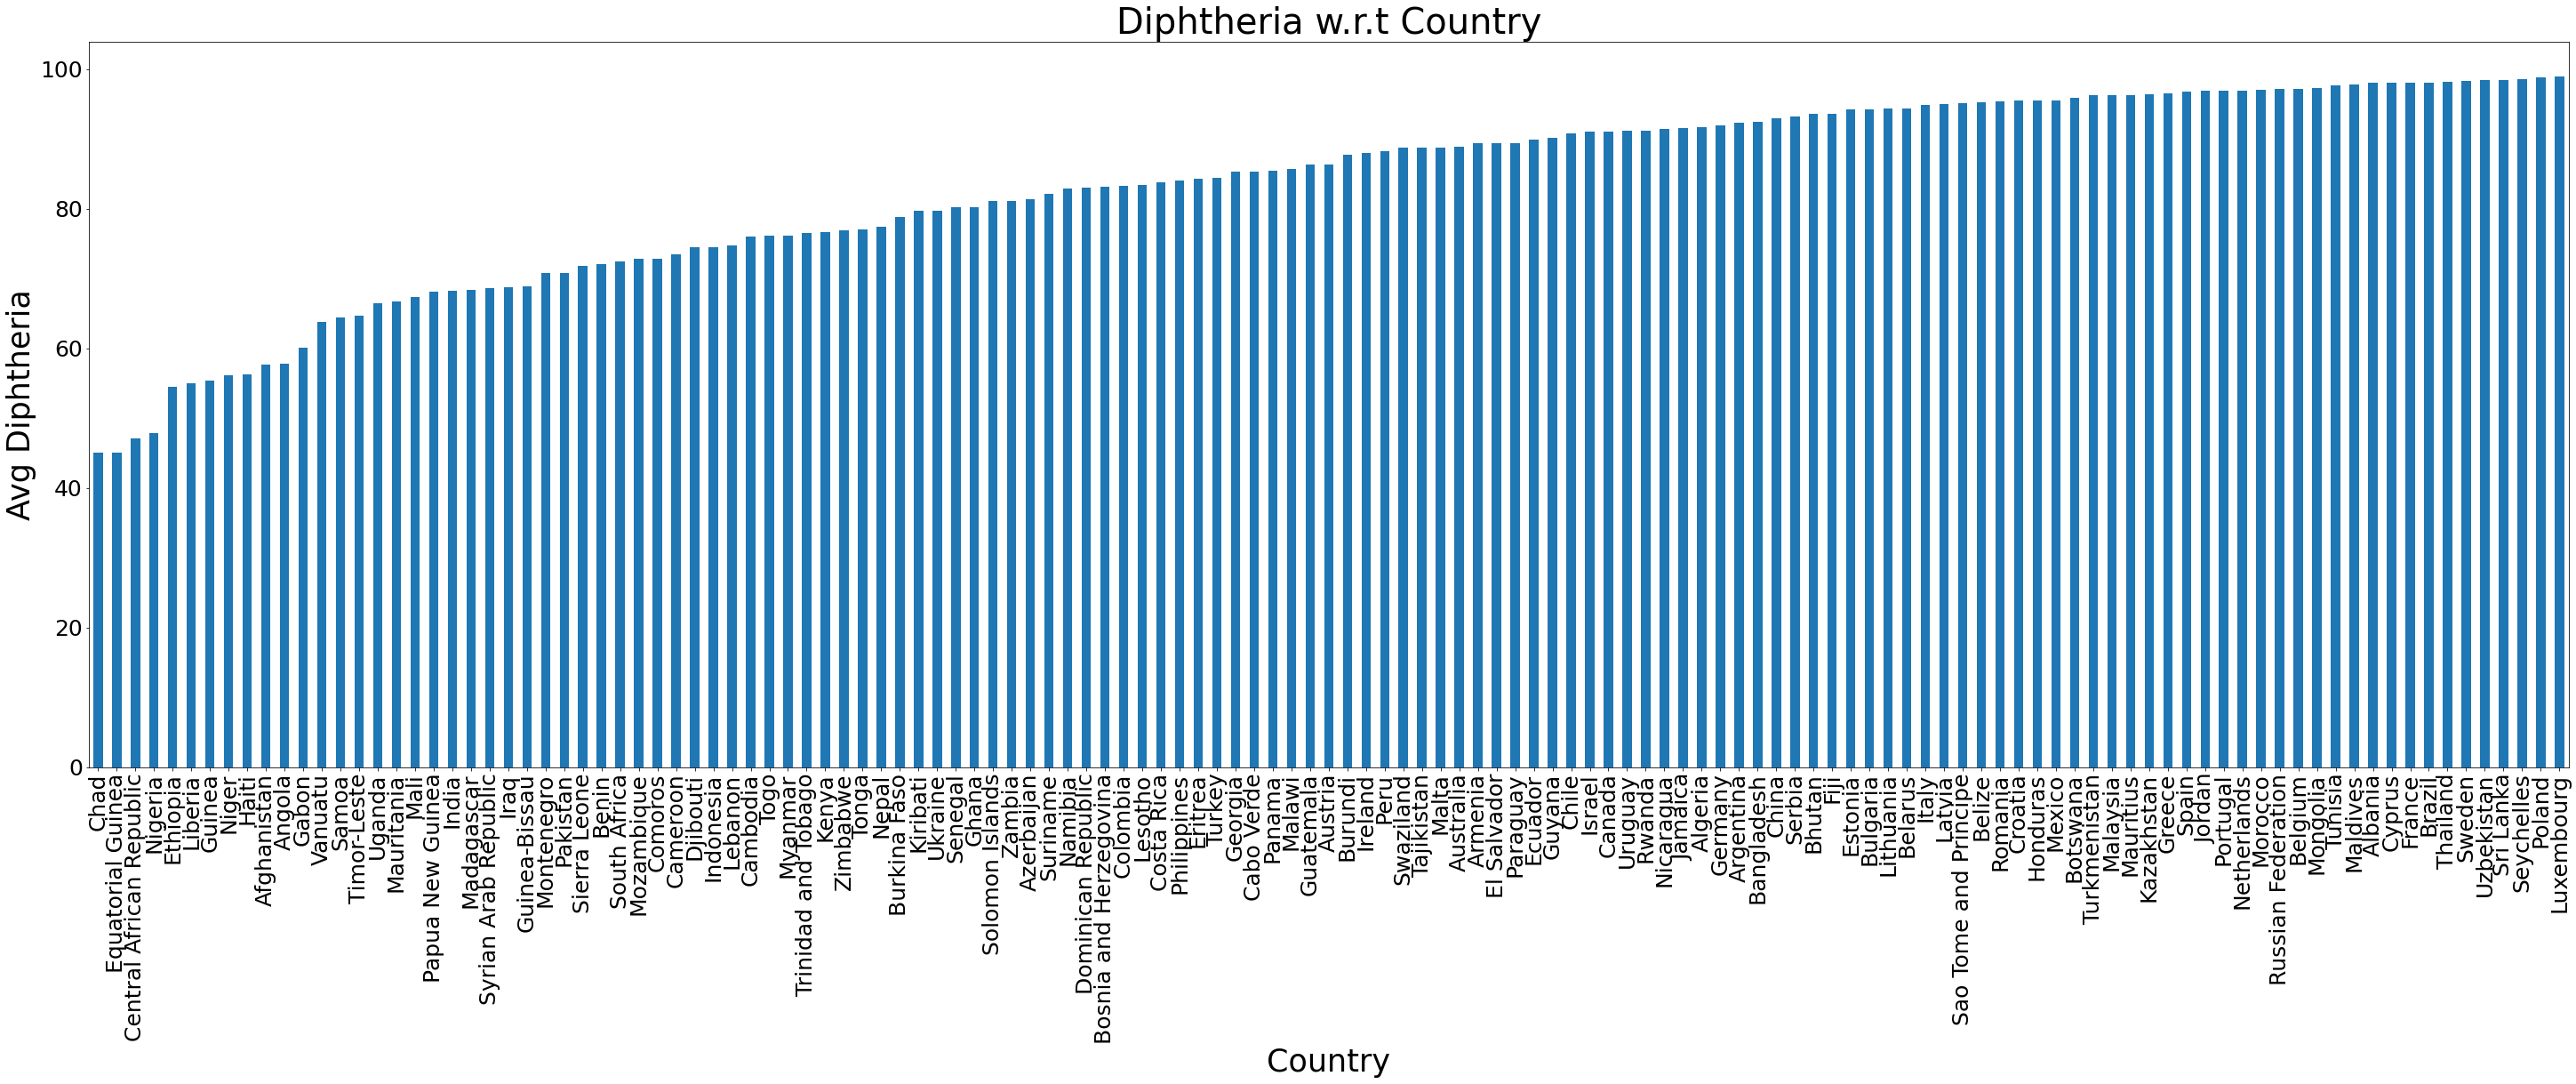

In [45]:
le_country = life.groupby('Country')['winsorized_Diphtheria'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Diphtheria w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Diphtheria",fontsize=35)
plt.show()

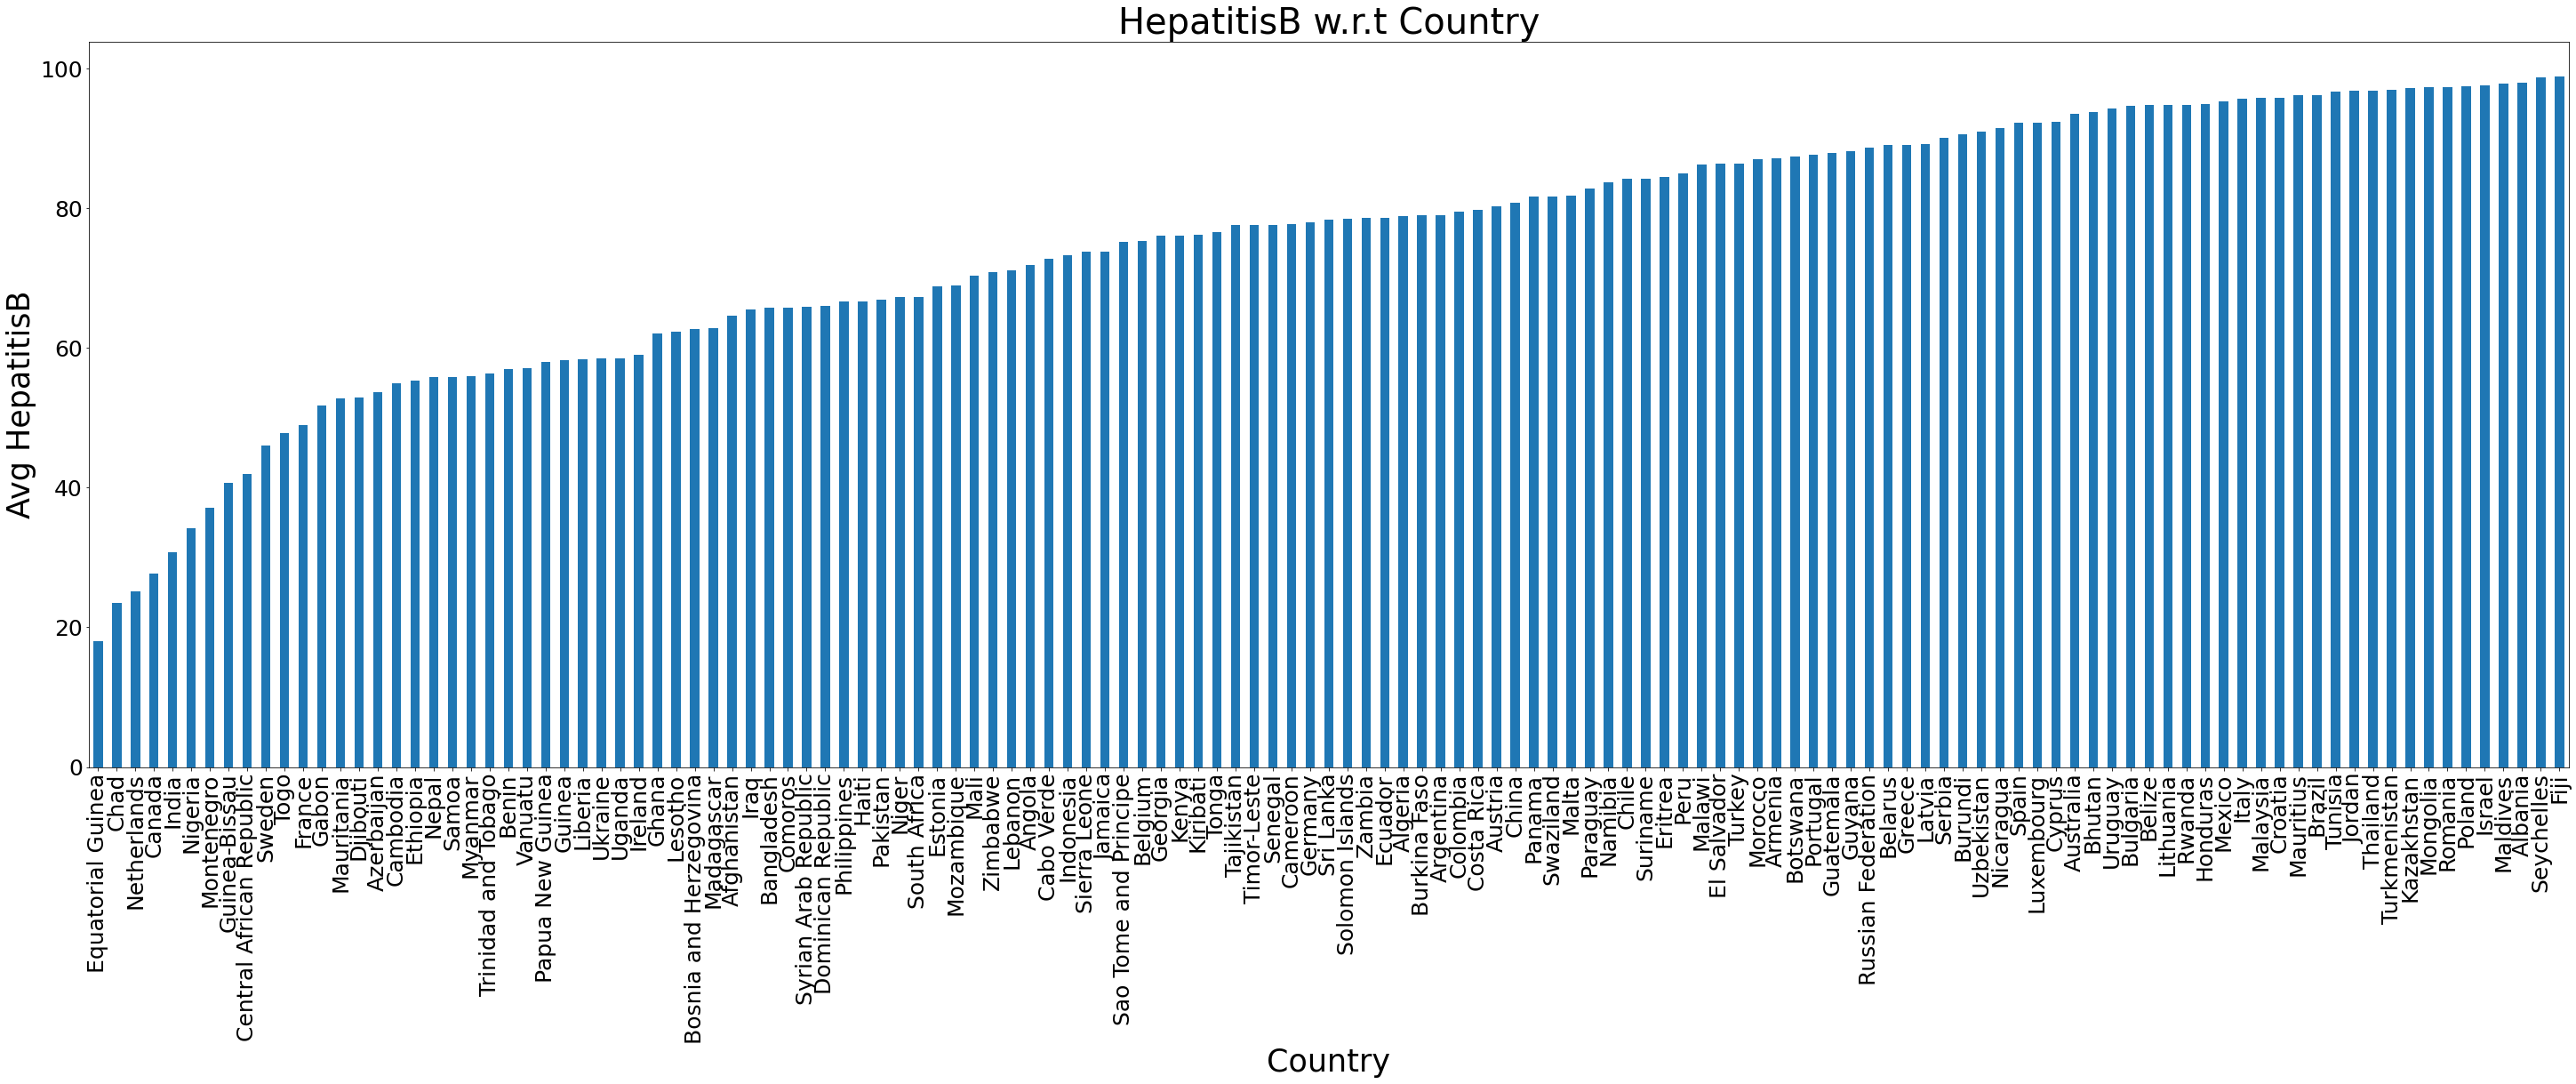

In [46]:
le_country = life.groupby('Country')['winsorized_HepatitisB'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("HepatitisB w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg HepatitisB",fontsize=35)
plt.show()

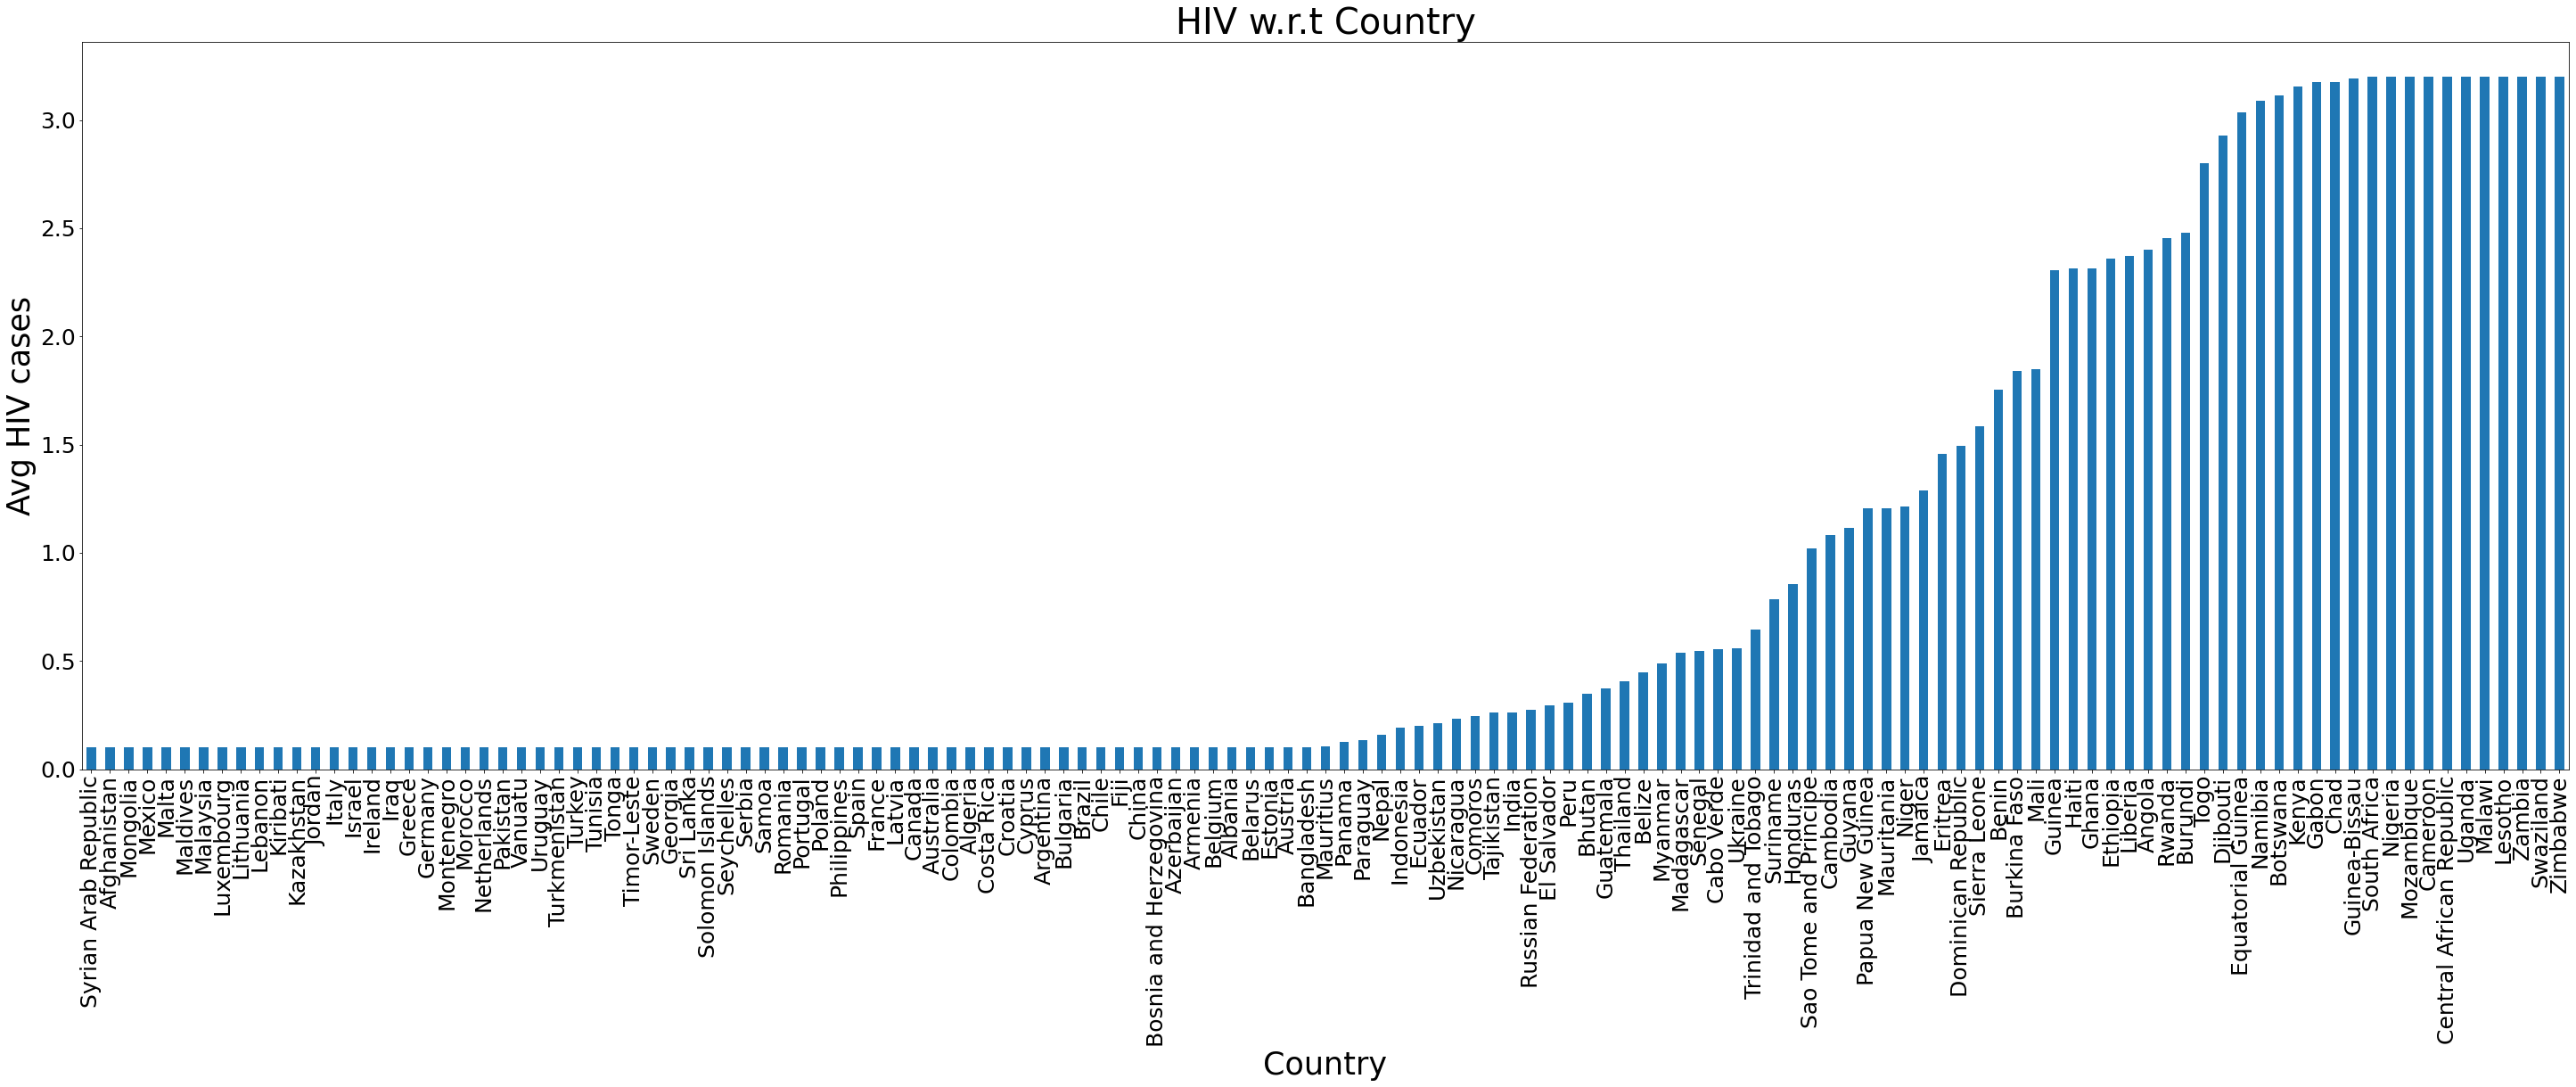

In [47]:
le_country = life.groupby('Country')['winsorized_HIV'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("HIV w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg HIV cases",fontsize=35)
plt.show()

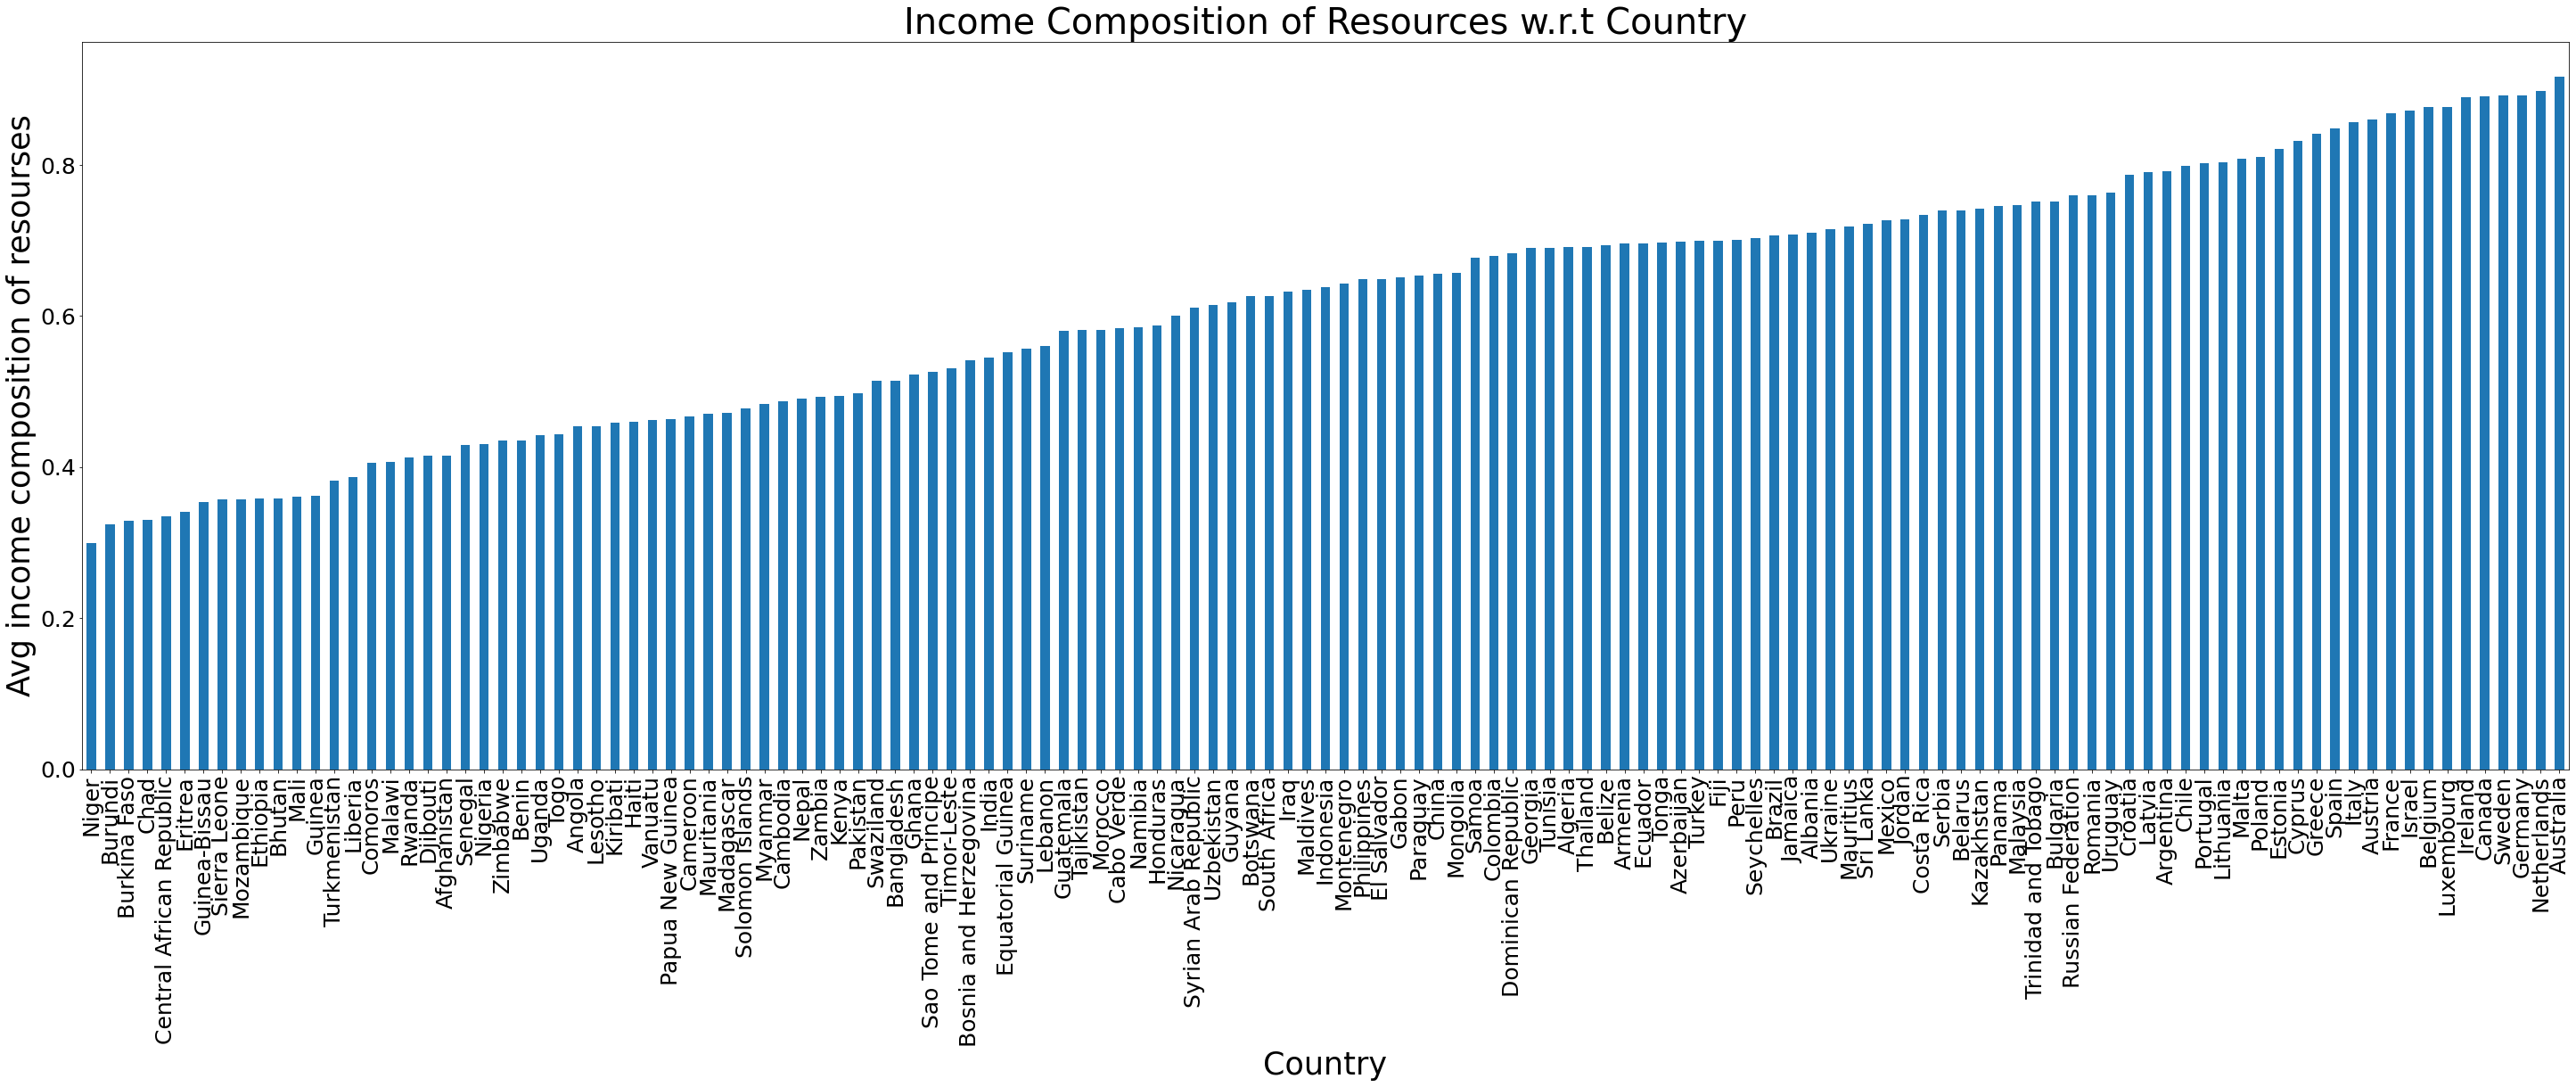

In [48]:
le_country = life.groupby('Country')['winsorized_Income_Comp_Of_Resources'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Income Composition of Resources w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg income composition of resourses",fontsize=35)
plt.show()

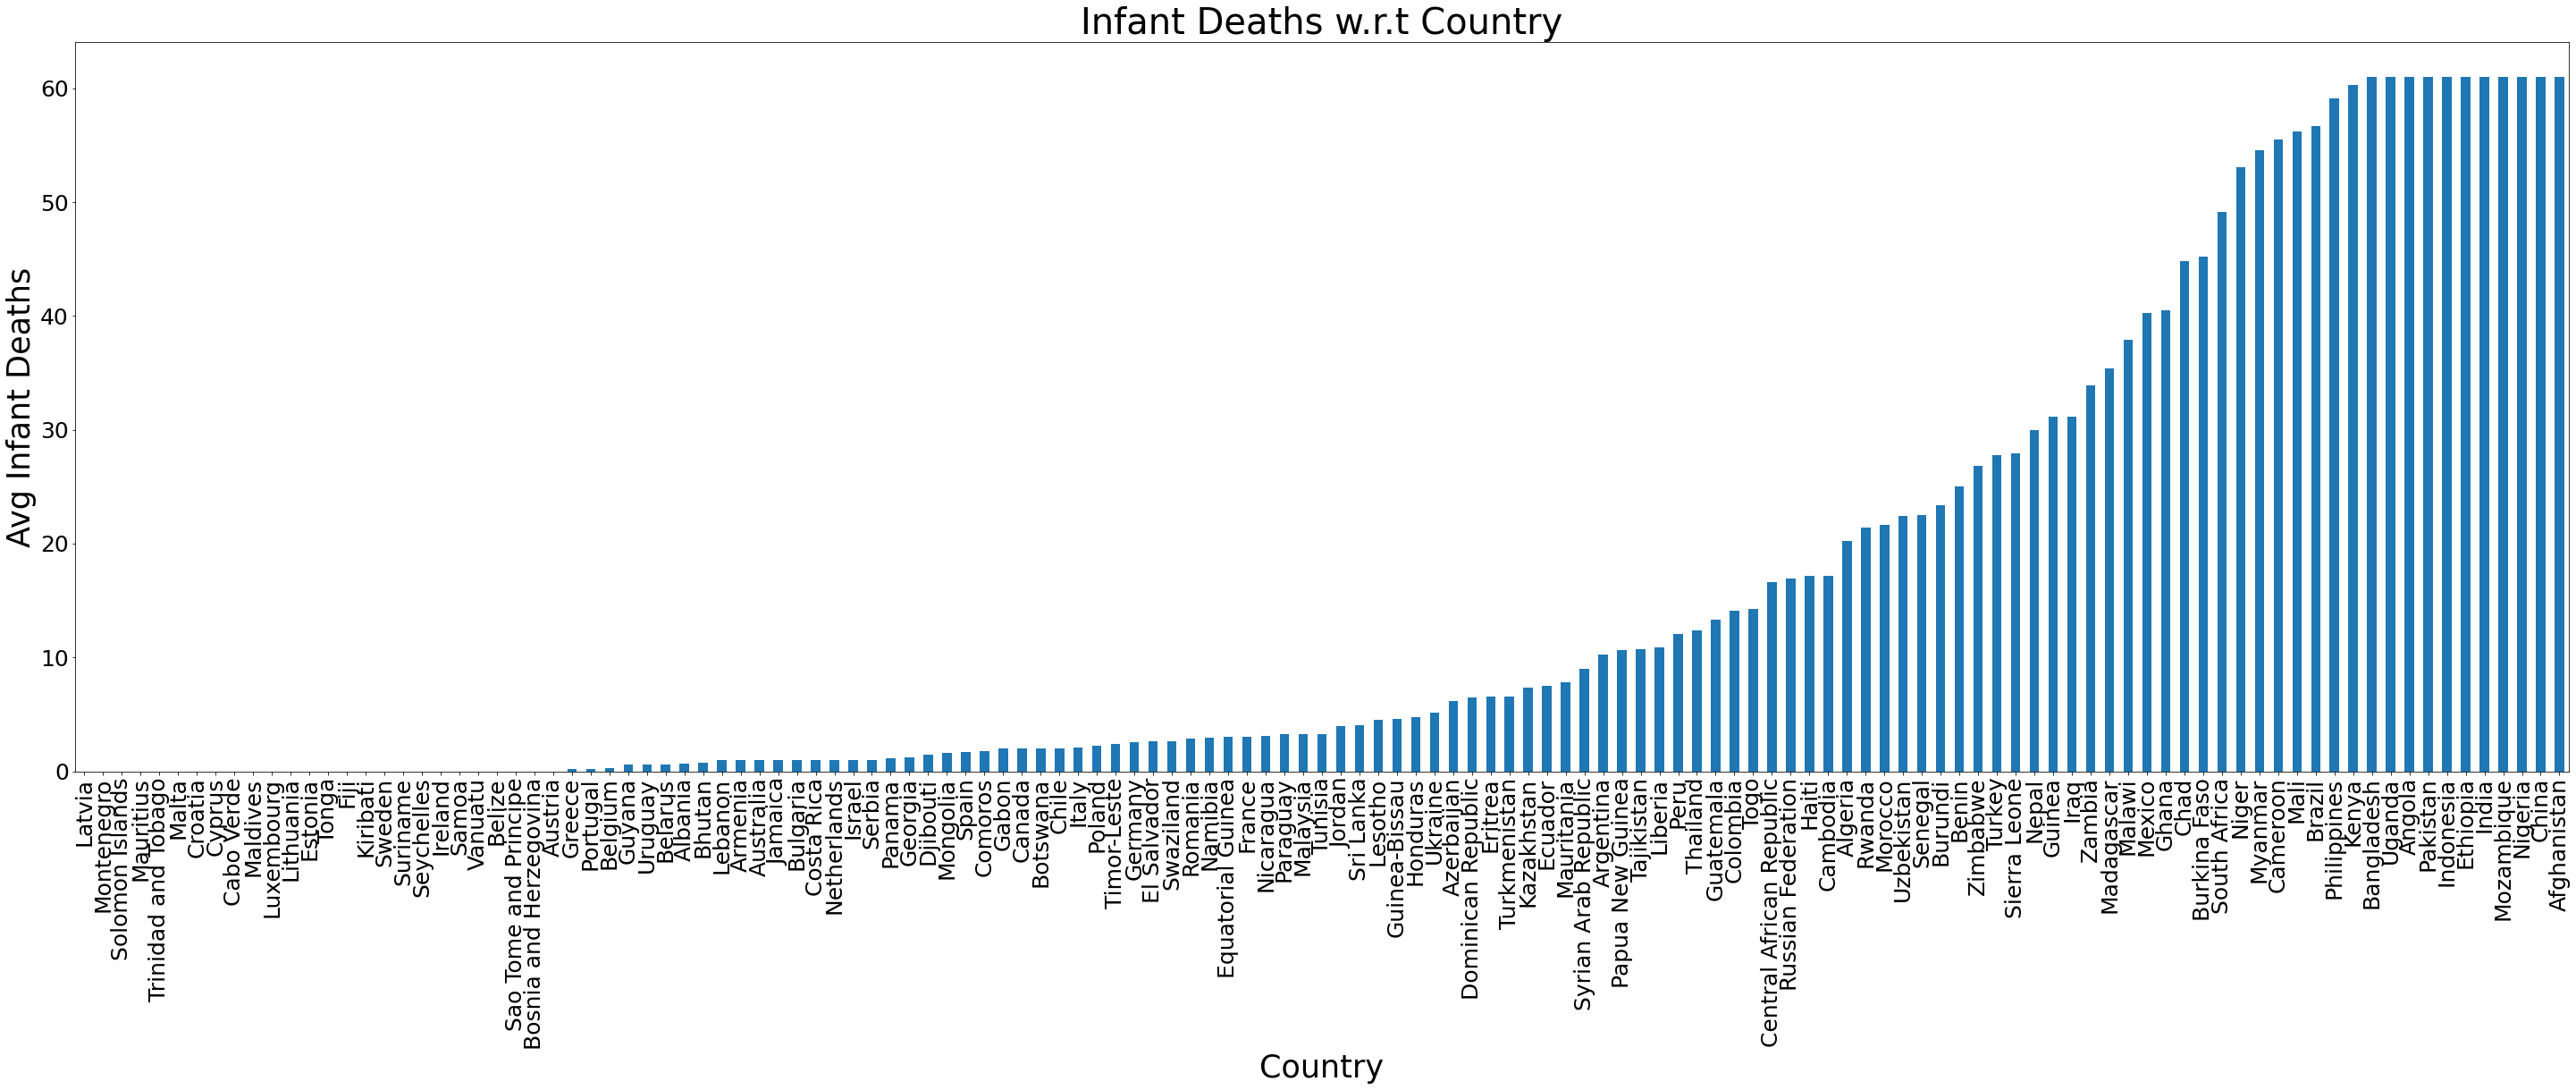

In [49]:
le_country = life.groupby('Country')['winsorized_Infant_Deaths'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Infant Deaths w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Infant Deaths",fontsize=35)
plt.show()

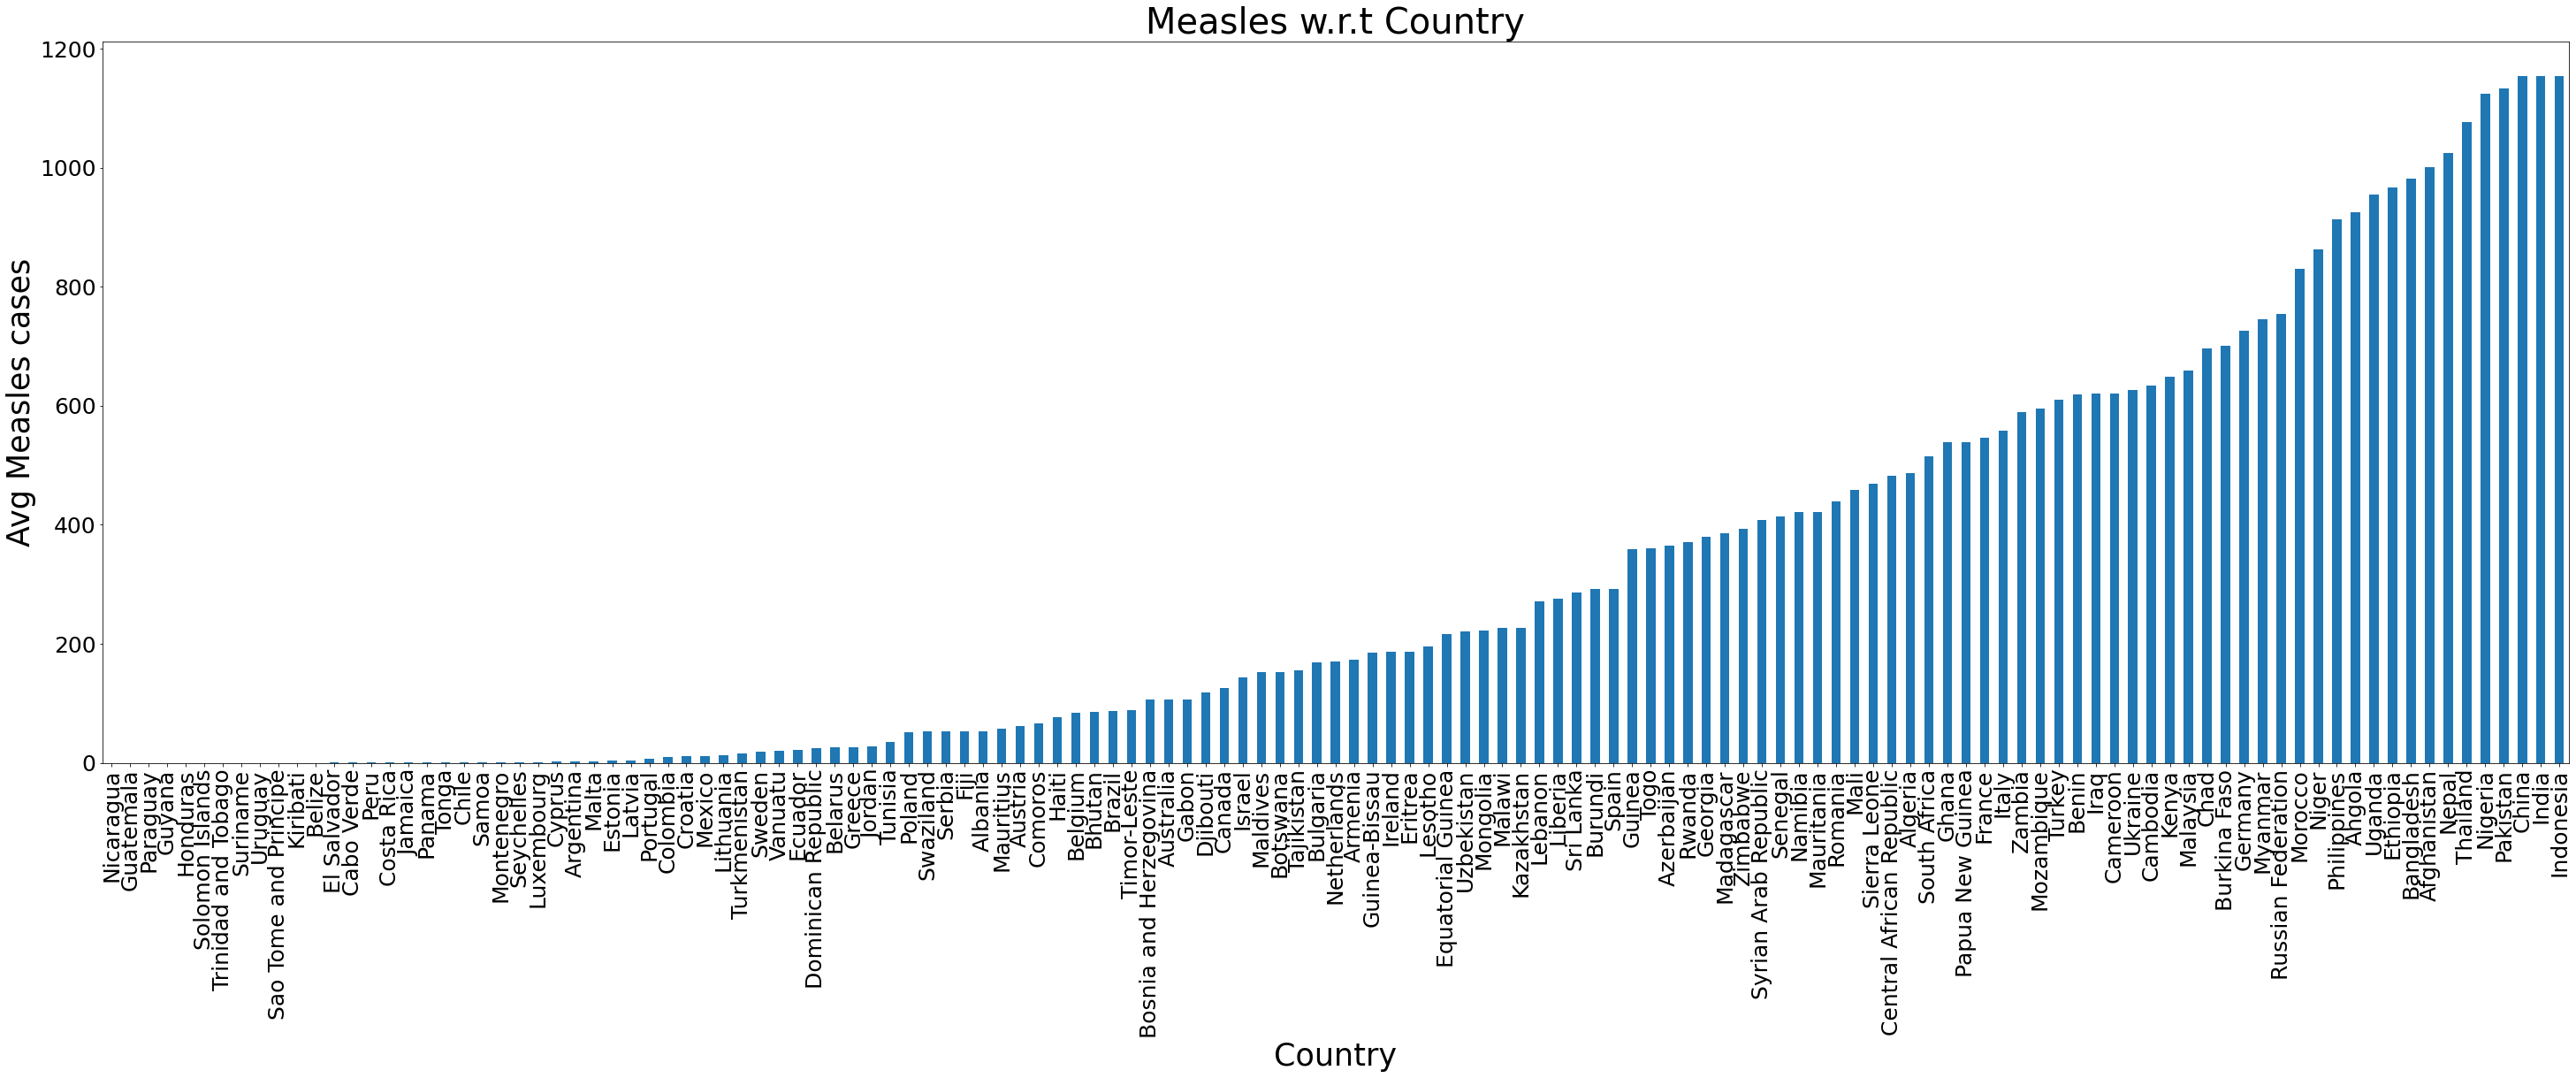

In [50]:
le_country = life.groupby('Country')['winsorized_Measles'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Measles w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Measles cases",fontsize=35)
plt.show()

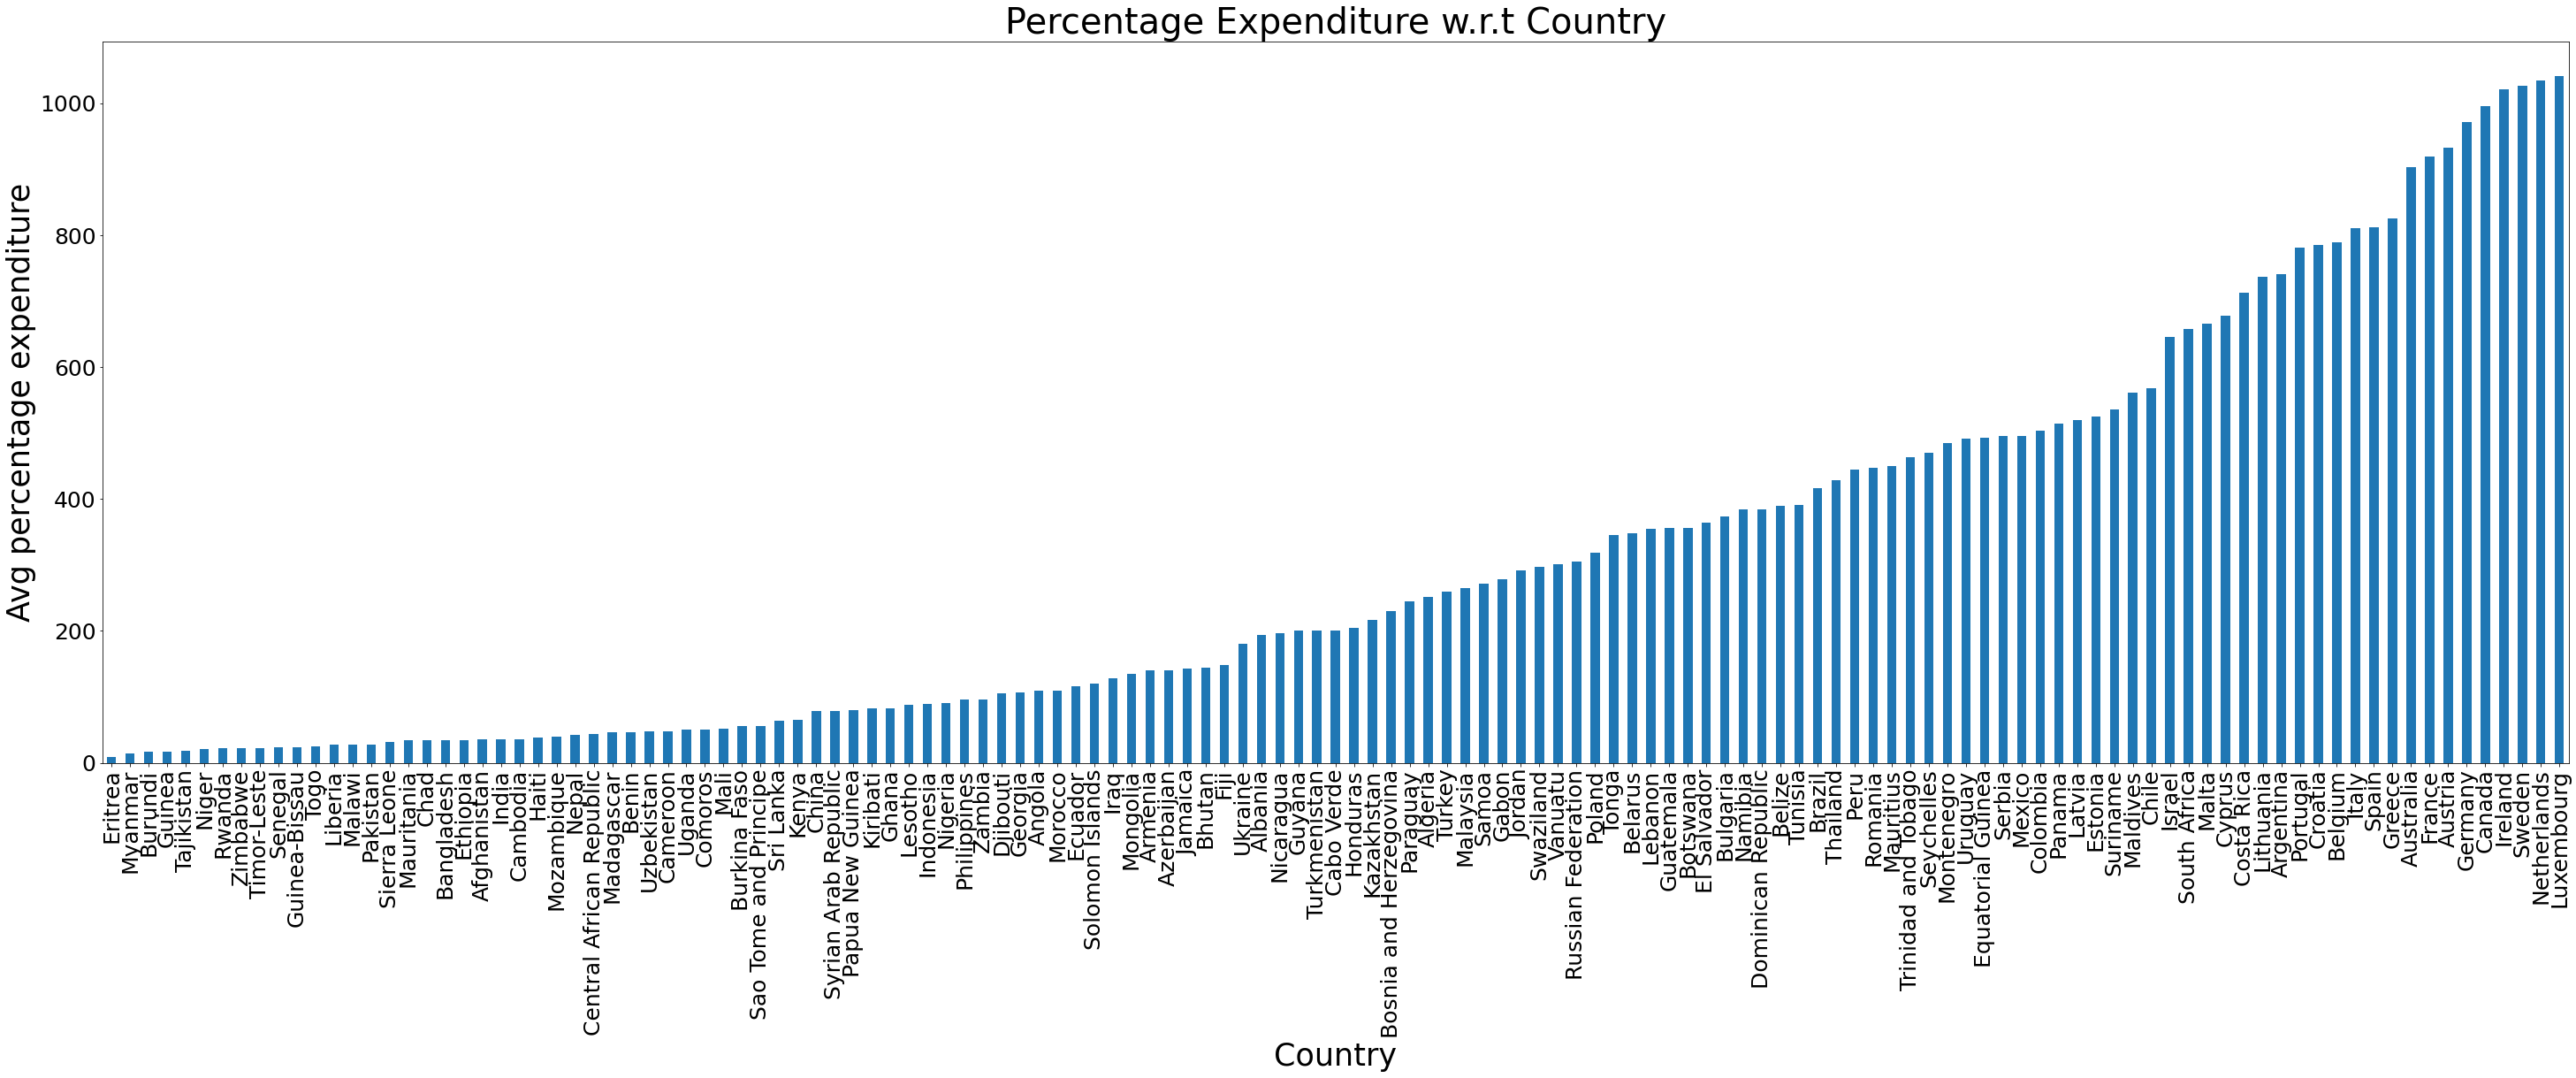

In [51]:
le_country = life.groupby('Country')['winsorized_Percentage_Exp'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Percentage Expenditure w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg percentage expenditure",fontsize=35)
plt.show()

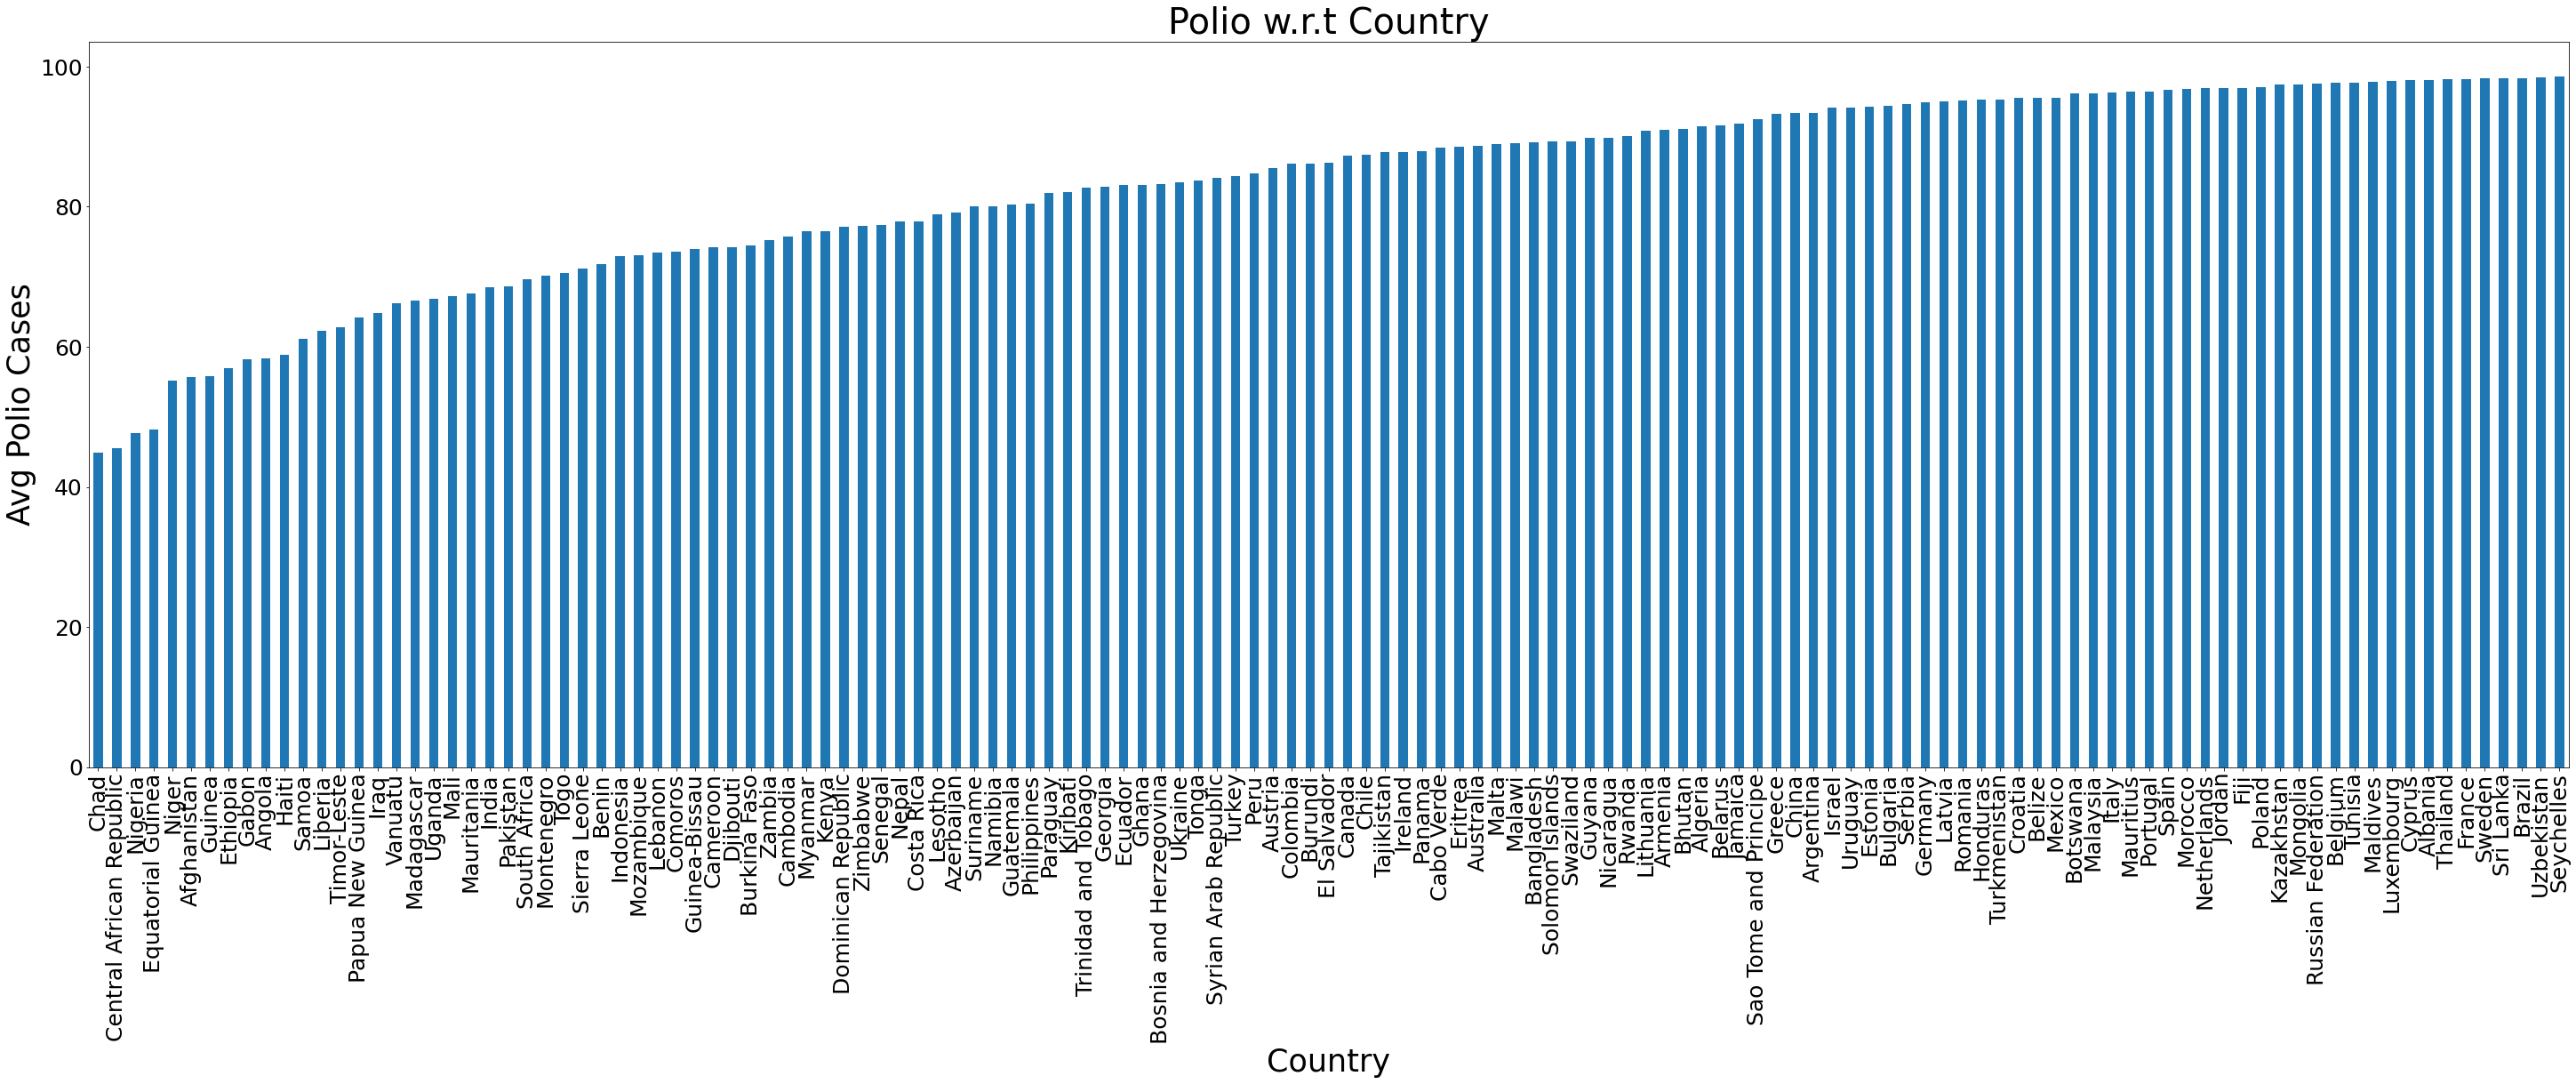

In [52]:
le_country = life.groupby('Country')['winsorized_Polio'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Polio w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Polio Cases",fontsize=35)
plt.show()

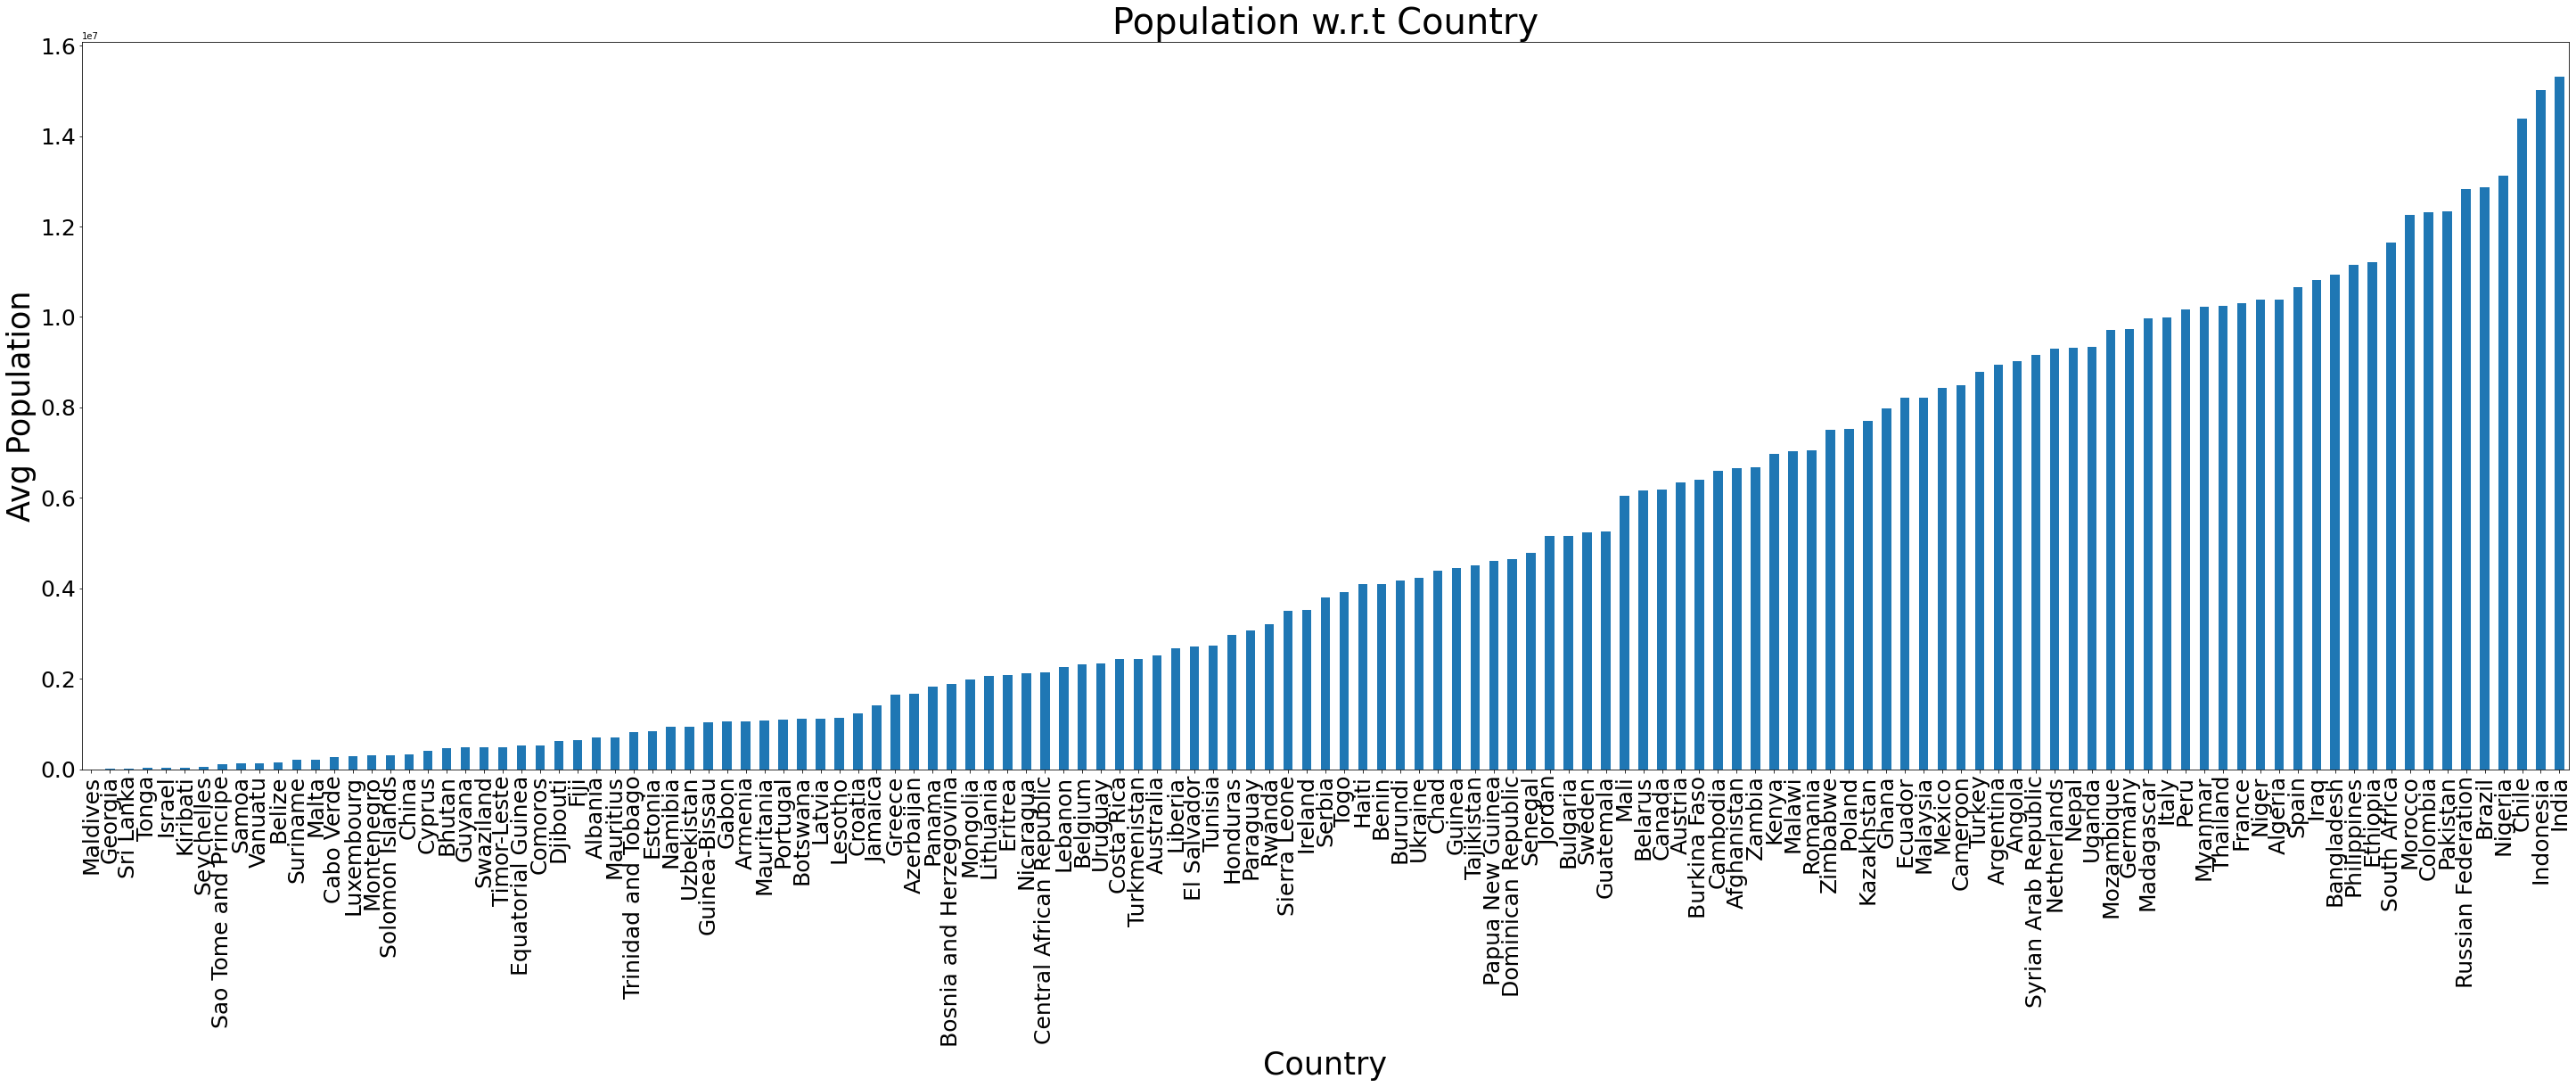

In [53]:
le_country = life.groupby('Country')['winsorized_Population'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Population w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Population",fontsize=35)
plt.show()

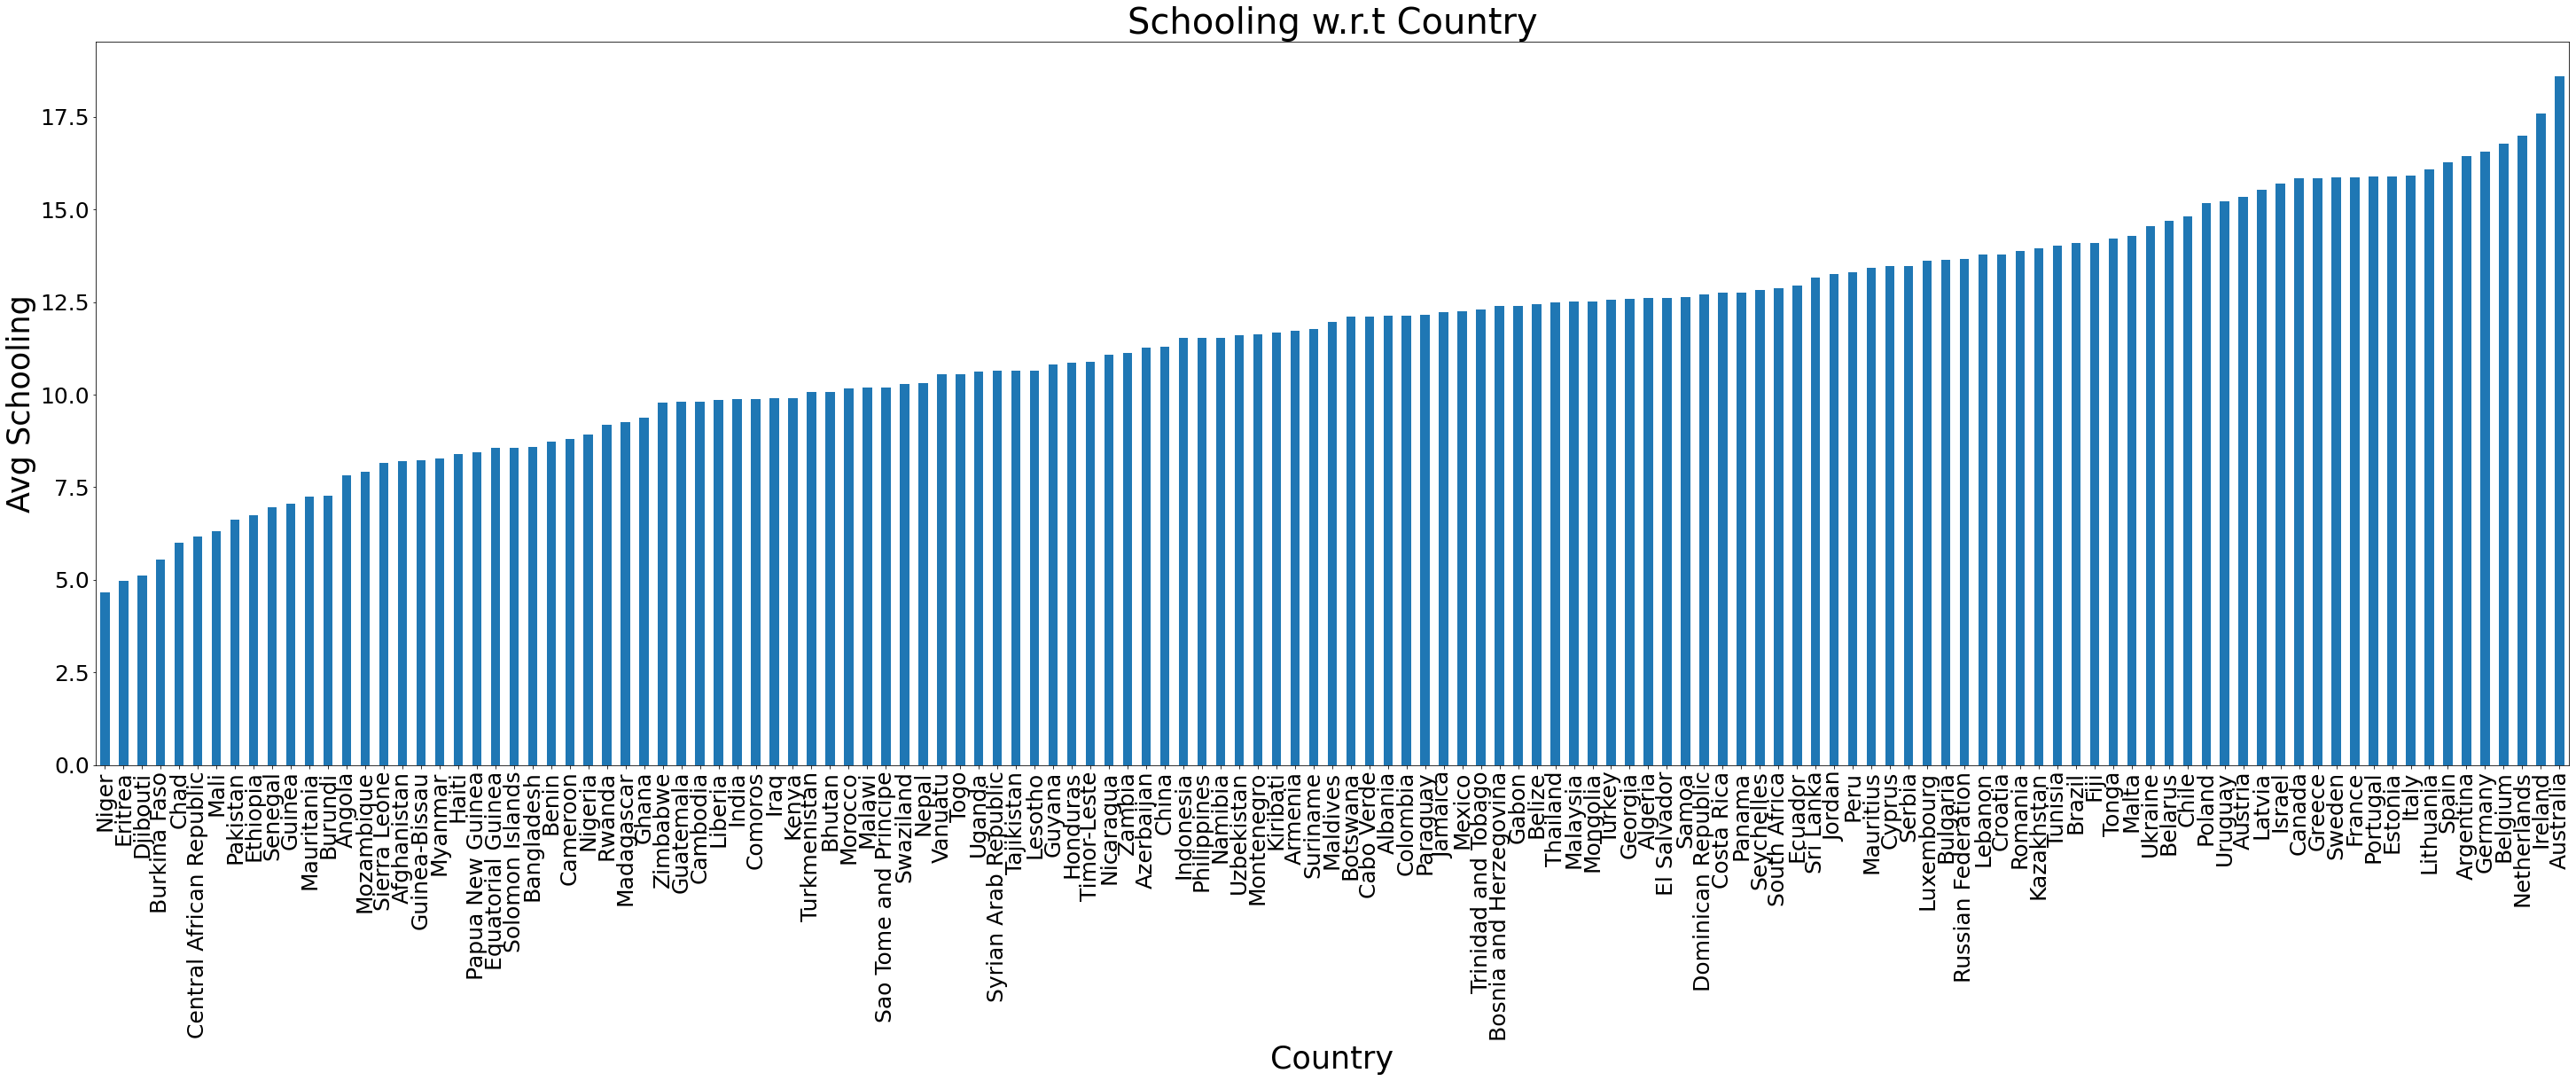

In [54]:
le_country = life.groupby('Country')['winsorized_Schooling'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Schooling w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Schooling",fontsize=35)
plt.show()

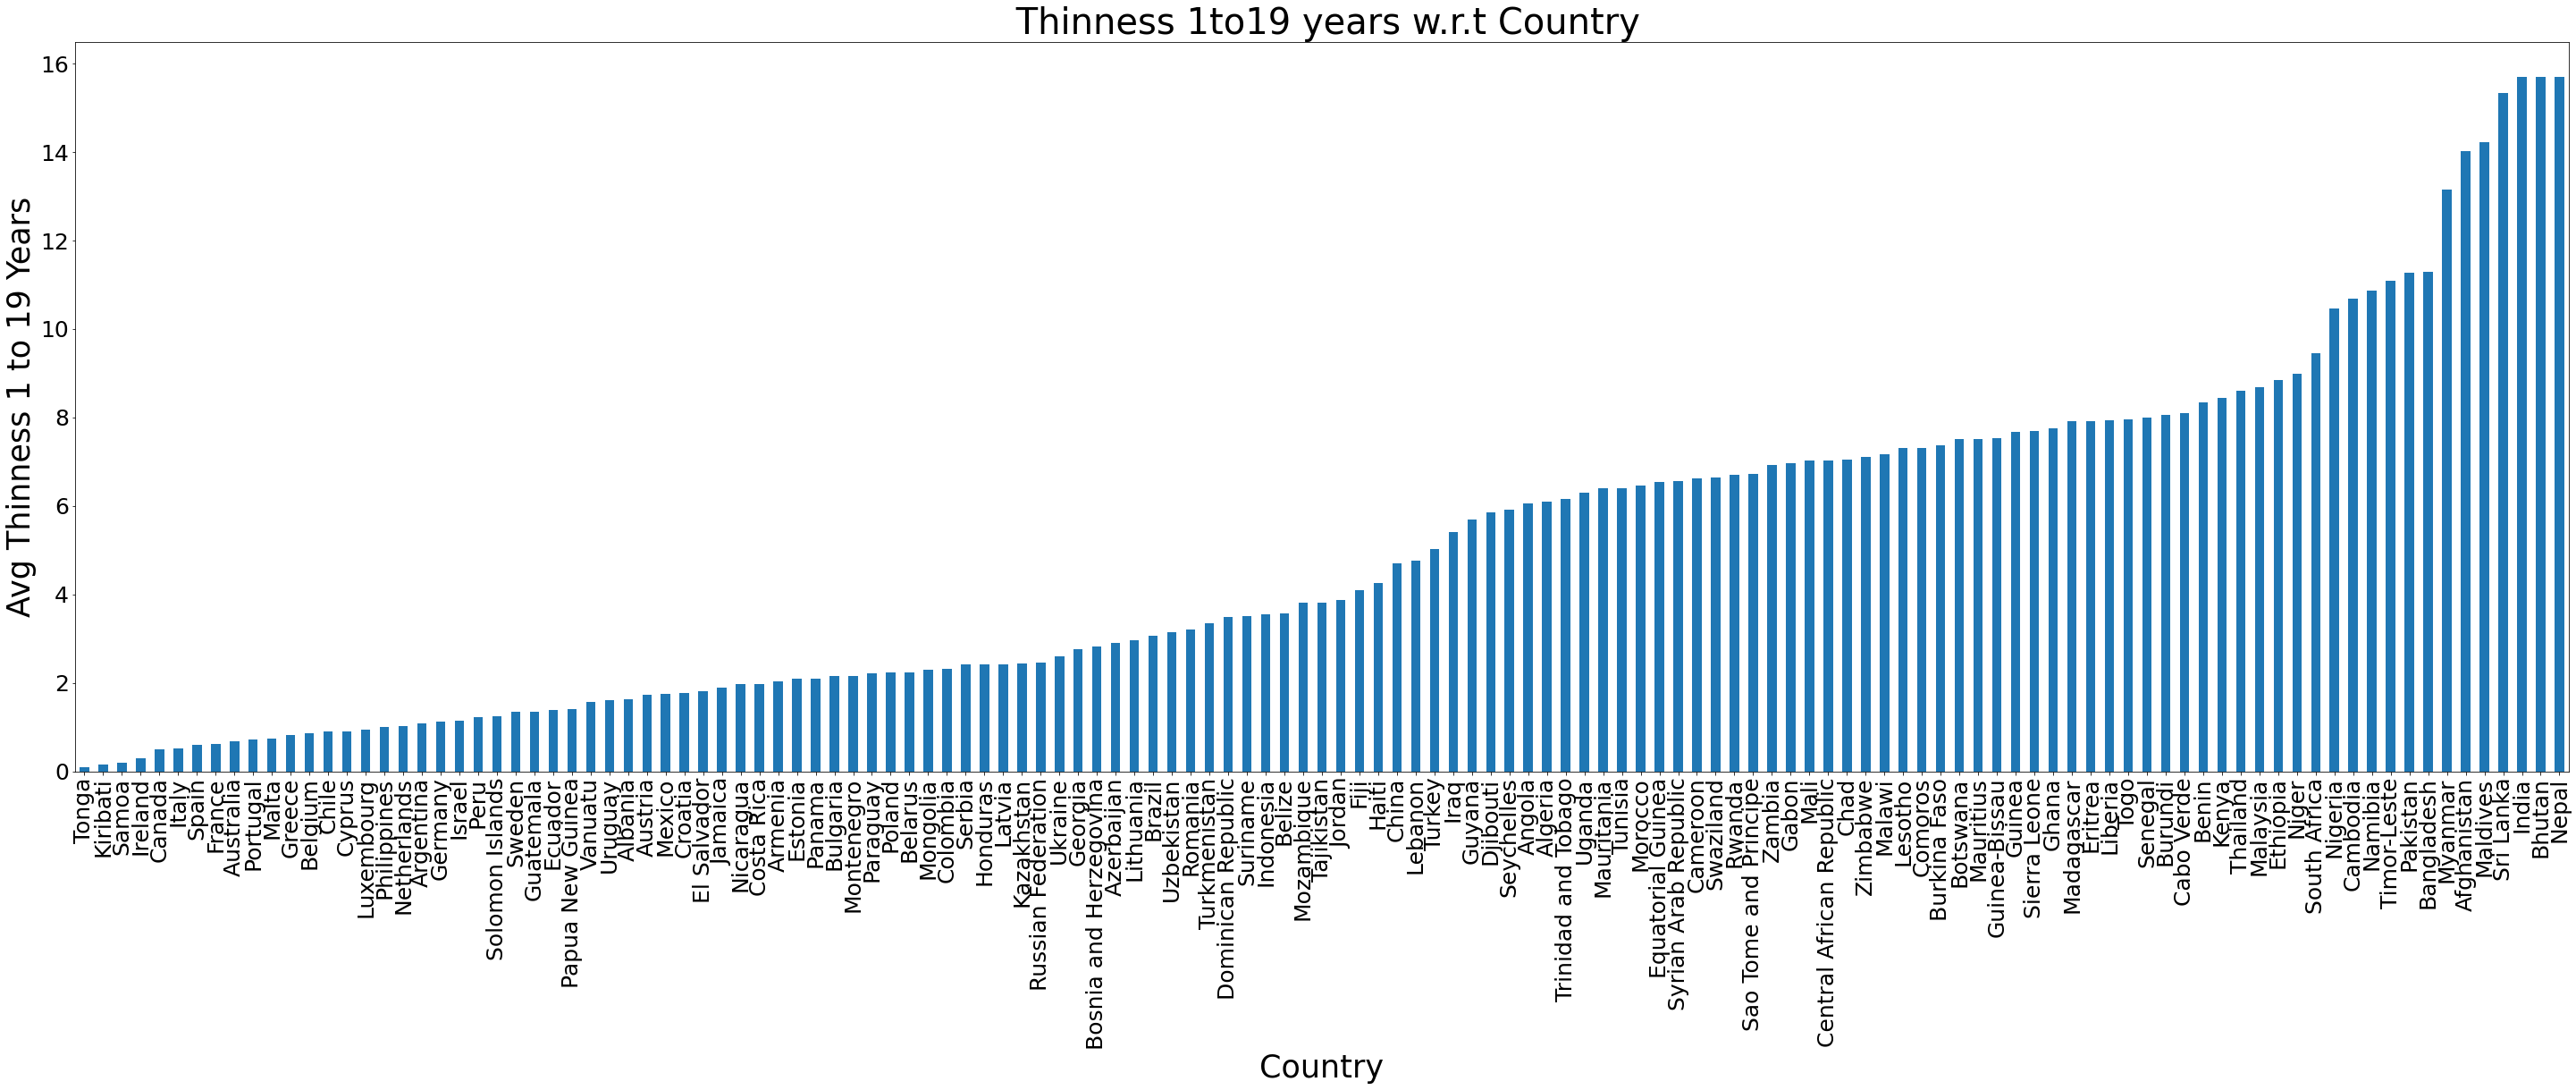

In [55]:
le_country = life.groupby('Country')['winsorized_thinness_1to19_years'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title(" Thinness 1to19 years w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Thinness 1 to 19 Years",fontsize=35)
plt.show()

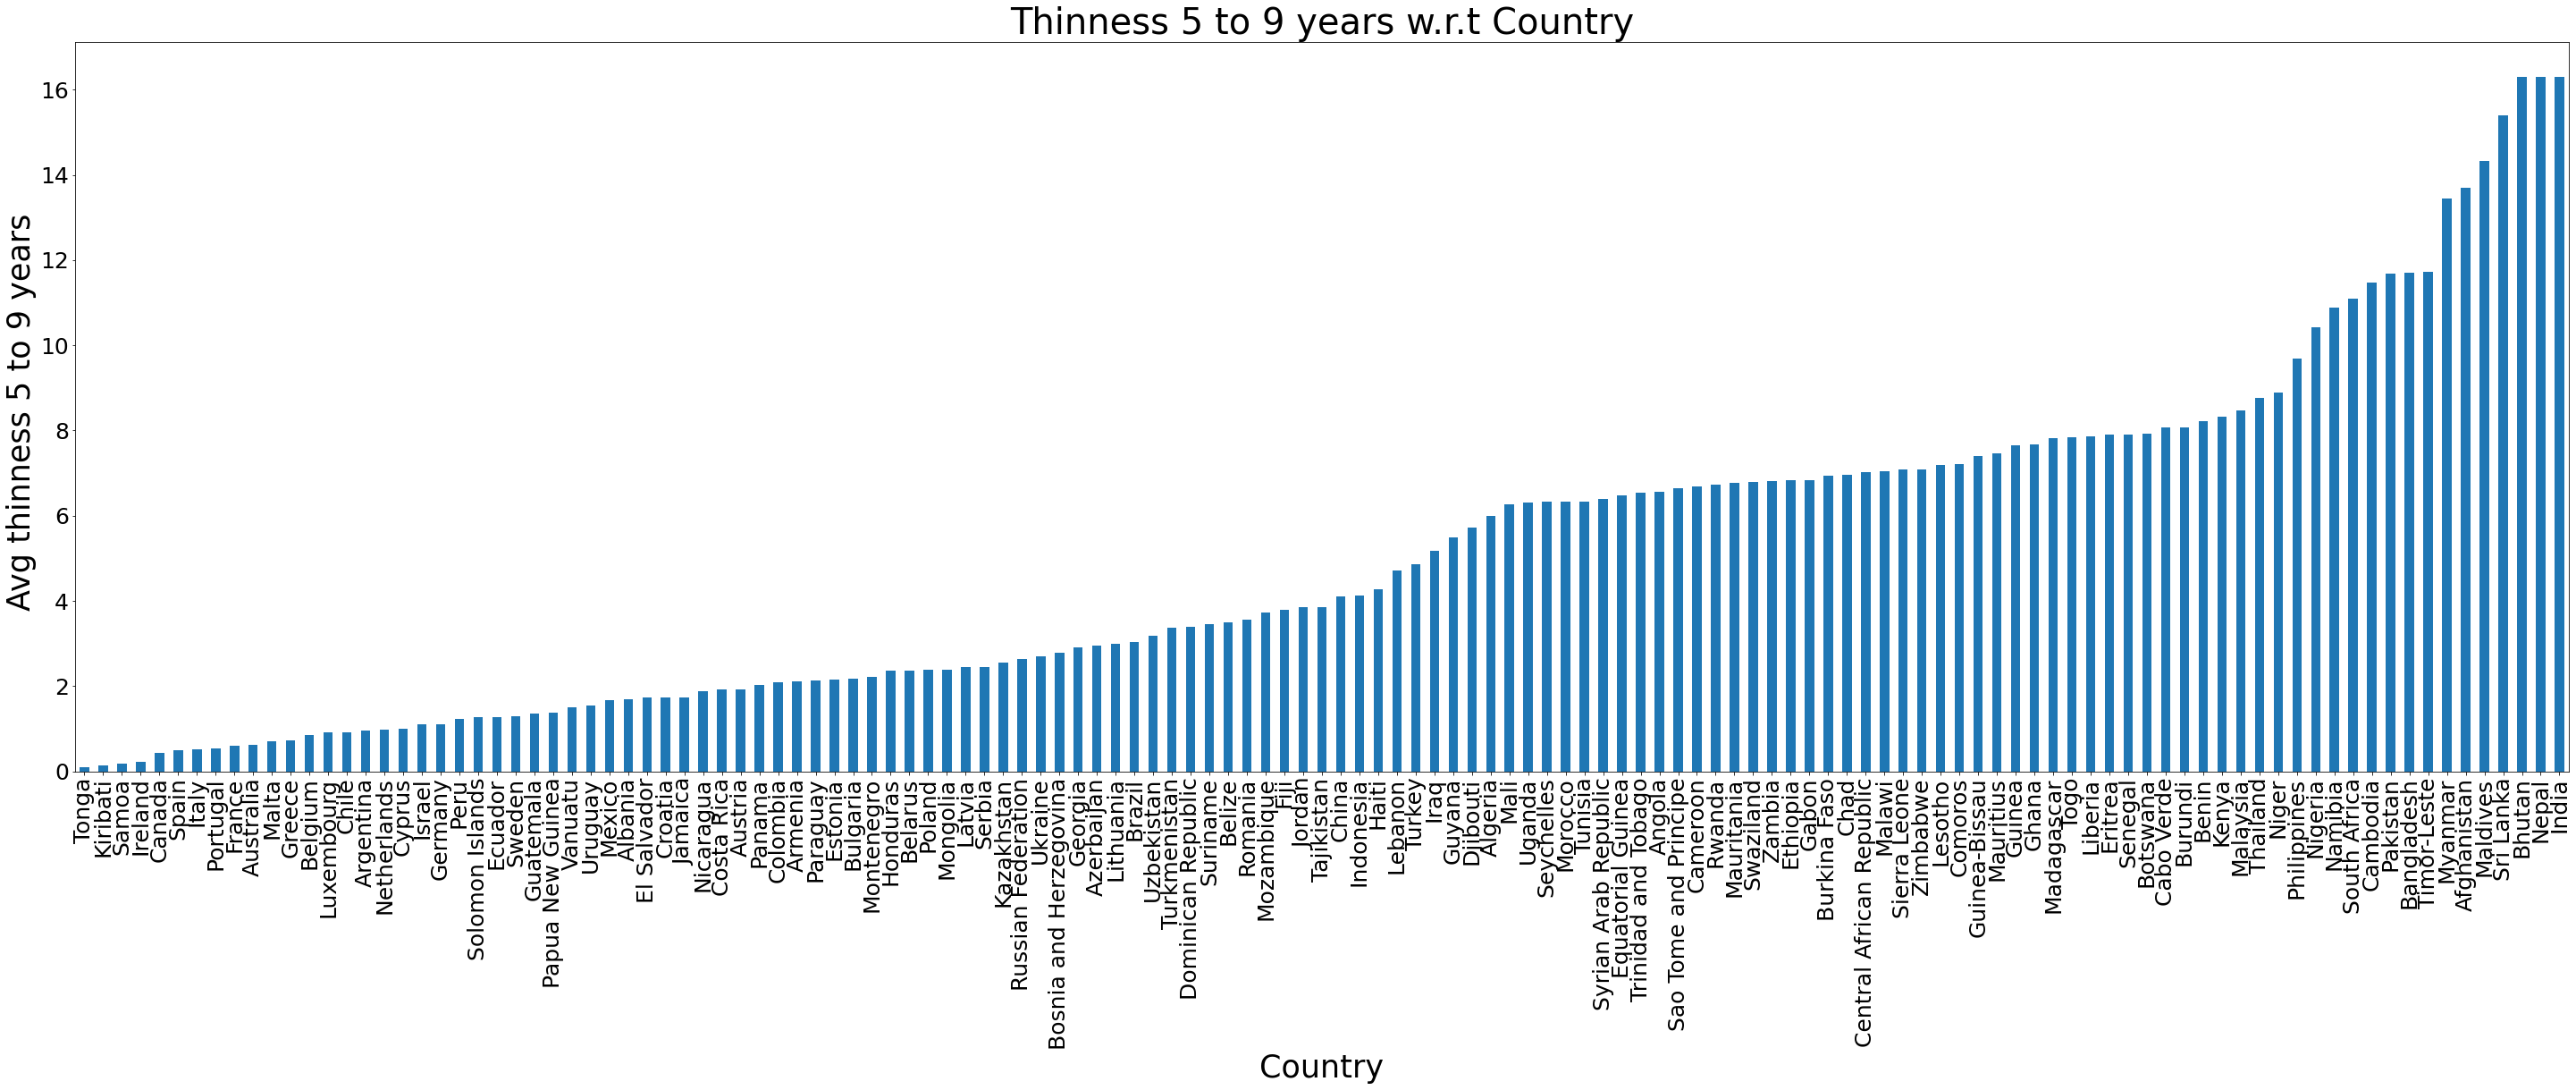

In [56]:
le_country = life.groupby('Country')['winsorized_thinness_5to9_years'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Thinness 5 to 9 years w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg thinness 5 to 9 years ",fontsize=35)
plt.show()

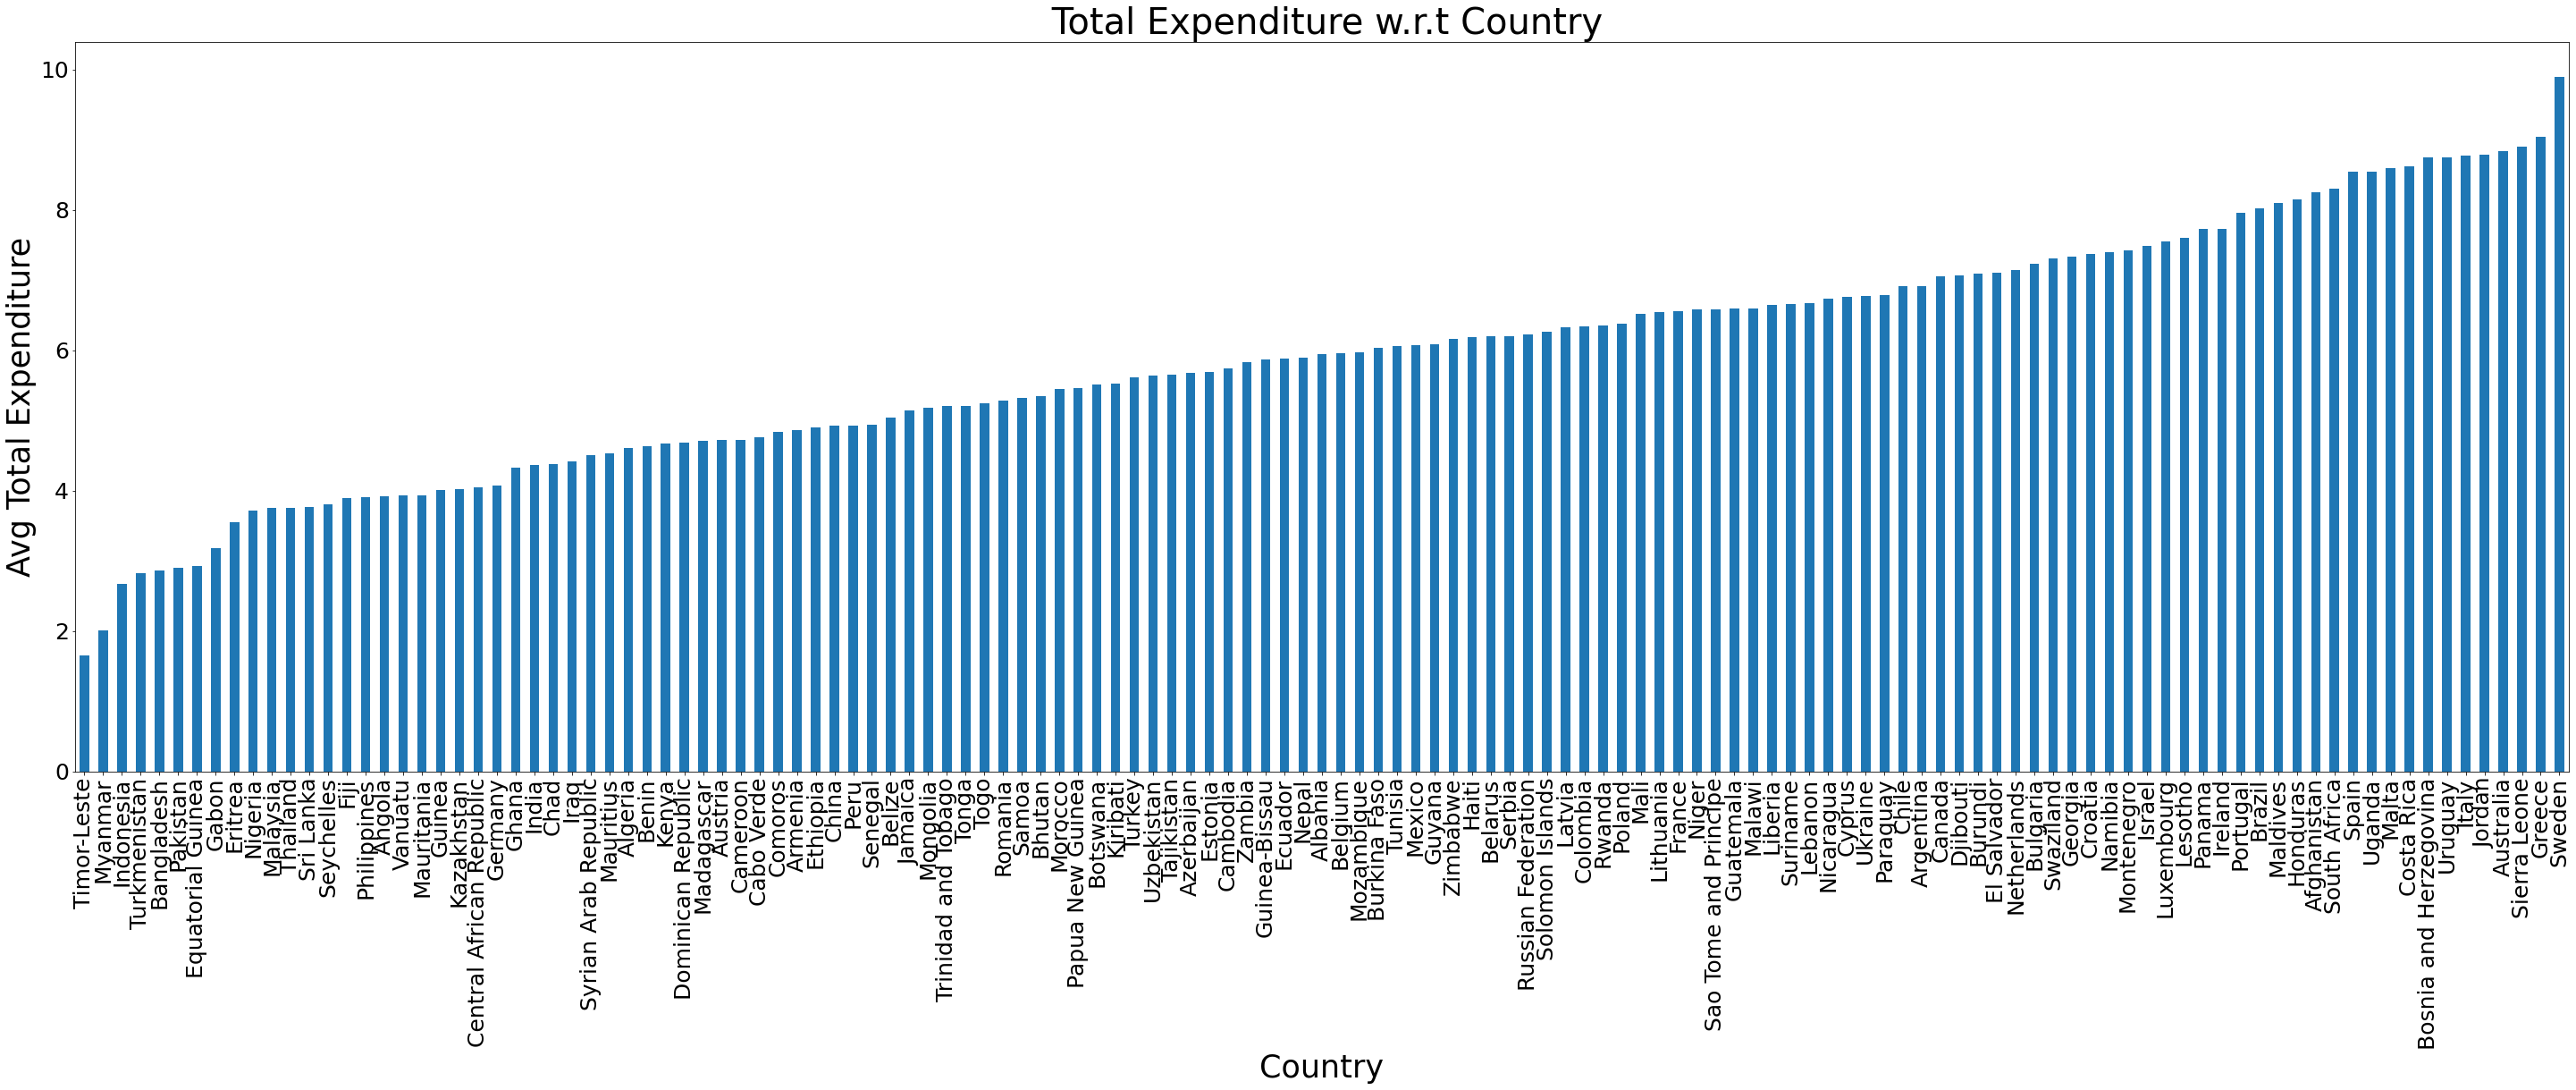

In [57]:
le_country = life.groupby('Country')['winsorized_Tot_Exp'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title(" Total Expenditure w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Total Expenditure",fontsize=35)
plt.show()

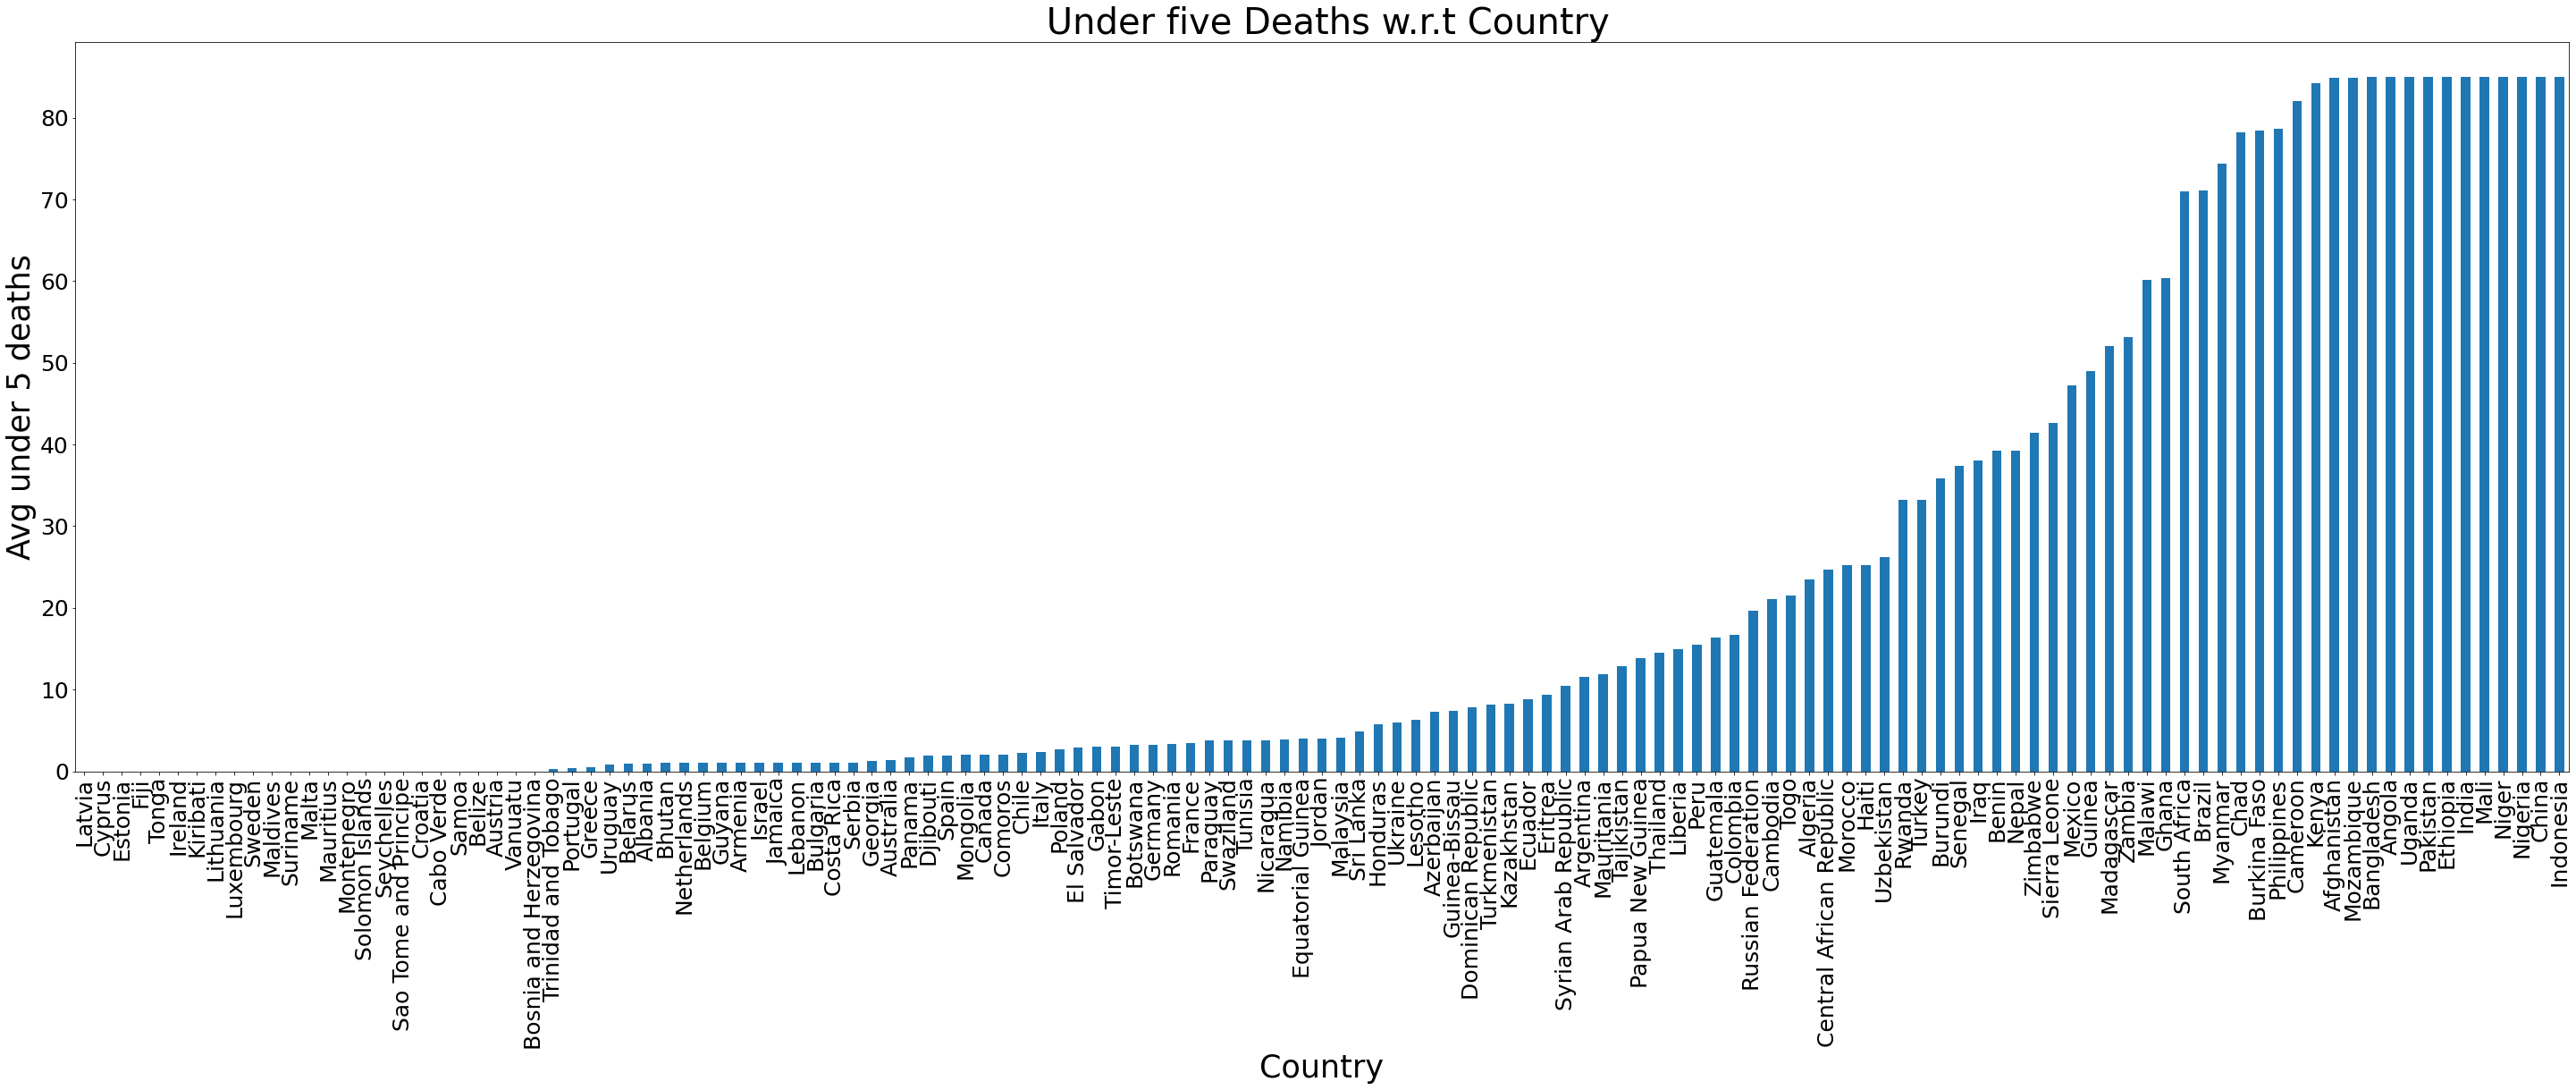

In [58]:
le_country = life.groupby('Country')['winsorized_Under_Five_Deaths'].mean().sort_values(ascending=True)
le_country.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title(" Under five Deaths w.r.t Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg under 5 deaths",fontsize=35)
plt.show()

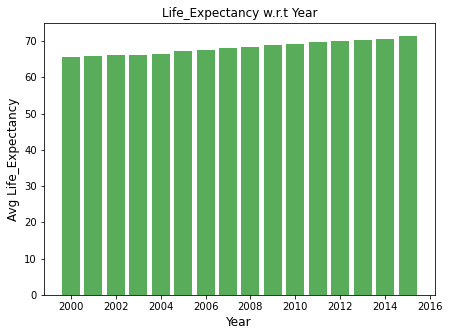

In [59]:
plt.figure(figsize=(7,5))
plt.bar(life.groupby('Year')['Year'].count().index,life.groupby('Year')['winsorized_Life_Expectancy'].mean(),color='green',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy w.r.t Year")
plt.show()

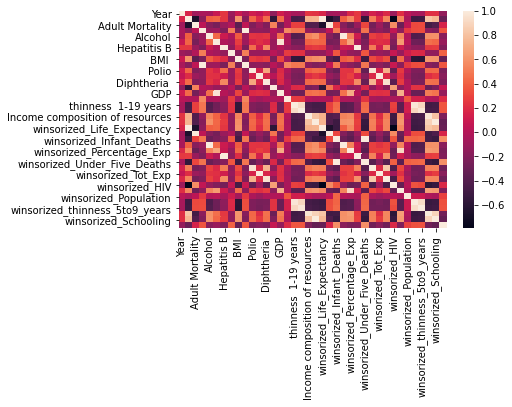

In [60]:
corr= life.corr()
sns.heatmap(corr)

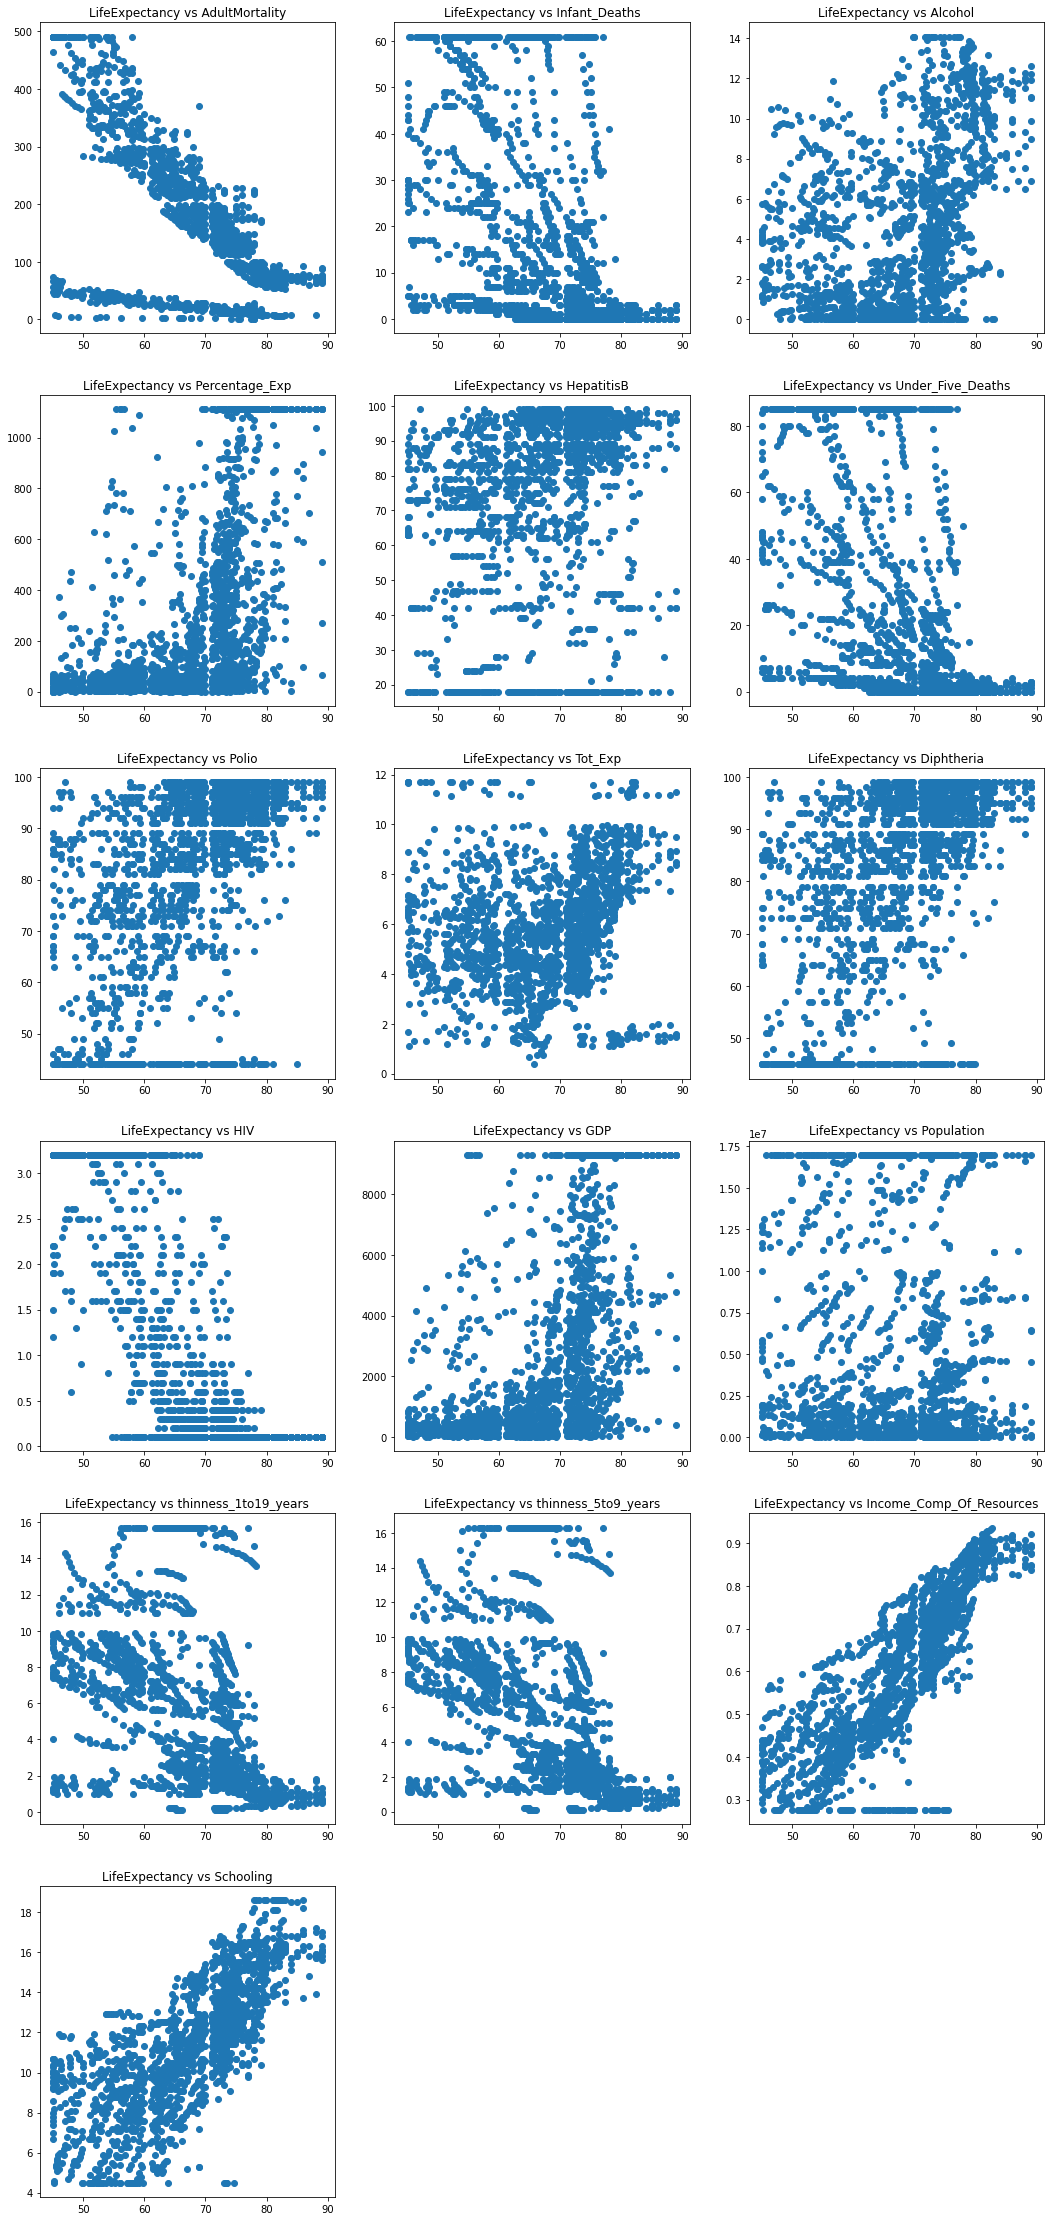

In [61]:
plt.figure(figsize=(18,40))

plt.subplot(6,3,1)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Adult_Mortality"])
plt.title("LifeExpectancy vs AdultMortality")

plt.subplot(6,3,2)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Infant_Deaths"])
plt.title("LifeExpectancy vs Infant_Deaths")

plt.subplot(6,3,3)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Alcohol"])
plt.title("LifeExpectancy vs Alcohol")

plt.subplot(6,3,4)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Percentage_Exp"])
plt.title("LifeExpectancy vs Percentage_Exp")

plt.subplot(6,3,5)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_HepatitisB"])
plt.title("LifeExpectancy vs HepatitisB")

plt.subplot(6,3,6)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Under_Five_Deaths"])
plt.title("LifeExpectancy vs Under_Five_Deaths")

plt.subplot(6,3,7)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Polio"])
plt.title("LifeExpectancy vs Polio")

plt.subplot(6,3,8)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Tot_Exp"])
plt.title("LifeExpectancy vs Tot_Exp")

plt.subplot(6,3,9)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Diphtheria"])
plt.title("LifeExpectancy vs Diphtheria")

plt.subplot(6,3,10)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_HIV"])
plt.title("LifeExpectancy vs HIV")

plt.subplot(6,3,11)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_GDP"])
plt.title("LifeExpectancy vs GDP")

plt.subplot(6,3,12)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Population"])
plt.title("LifeExpectancy vs Population")

plt.subplot(6,3,13)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_thinness_1to19_years"])
plt.title("LifeExpectancy vs thinness_1to19_years")

plt.subplot(6,3,14)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_thinness_5to9_years"])
plt.title("LifeExpectancy vs thinness_5to9_years")

plt.subplot(6,3,15)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Income_Comp_Of_Resources"])
plt.title("LifeExpectancy vs Income_Comp_Of_Resources")

plt.subplot(6,3,16)
plt.scatter(life["winsorized_Life_Expectancy"], life["winsorized_Schooling"])
plt.title("LifeExpectancy vs Schooling")


plt.show()

In [62]:
round(life[['Status','Life expectancy ']].groupby(['Status']).mean(),2)

Life expectancy 
Status                      
Developed              78.83
Developing             66.16

In [63]:
stats.ttest_ind(life.loc[life['Status']=='Developed','Life expectancy '],life.loc[life['Status']=='Developing','Life expectancy '])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

In [64]:
life.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'],
      dtype='object')

In [65]:
life.shape

(1987, 40)

In [66]:
life.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   winsorized_Tot_Exp  winsorized_Diphtheria  winsorized_HIV  winsorized_GDP  \
0                8.16                   65.0             0.1      584.259210   
1                8.18                   62.0             0.1      612.696514   
2                8.13                   64.0             0.1      631.744976   
3                8.52                   67.0             0.1      669.959000   
4                7.87                   68.0             0.1       63.537231   

   winsorized_Population  winsorized_thinness_1to19_years  \
0             16993354.0                             15.7   
1               327582.0                             15.7   
2             16993354.0                             15.7   
3              3696958.0                             15.7   
4              2978599.0                             15.7   

   winsorized_thinness_5to9_years  winsorized_Income_Comp_Of_Resources  \
0                            16.3                                0.479   
1                            16.3                                0.476   
2                            16.3                                0.470   
3                            16.3                                0.463   
4                            16.3                                0.454   

   winsorized_Schooling  winsorized_Measles  
0                  10.1                1154  
1                  10.0                 492  
2                   9.9                 430  
3                   9.8                1154  
4                   9.5                1154  

[5 rows x 40 columns]

In [67]:
new_life=pd.DataFrame(data=life,columns=['Country', 'Year','Status',' BMI ',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles'])

In [68]:
new_life.shape

(1987, 22)

In [69]:
new_life.head()

Country  Year      Status   BMI   winsorized_Life_Expectancy  \
0  Afghanistan  2015  Developing   19.1                        65.0   
1  Afghanistan  2014  Developing   18.6                        59.9   
2  Afghanistan  2013  Developing   18.1                        59.9   
3  Afghanistan  2012  Developing   17.6                        59.5   
4  Afghanistan  2011  Developing   17.2                        59.2   

   winsorized_Adult_Mortality  winsorized_Infant_Deaths  winsorized_Alcohol  \
0                       263.0                        61                0.01   
1                       271.0                        61                0.01   
2                       268.0                        61                0.01   
3                       272.0                        61                0.01   
4                       275.0                        61                0.01   

   winsorized_Percentage_Exp  winsorized_HepatitisB  ...  winsorized_Tot_Exp  \
0                  71.279624                   65.0  ...                8.16   
1                  73.523582                   62.0  ...                8.18   
2                  73.219243                   64.0  ...                8.13   
3                  78.184215                   67.0  ...                8.52   
4                   7.097109                   68.0  ...                7.87   

   winsorized_Diphtheria  winsorized_HIV  winsorized_GDP  \
0                   65.0             0.1      584.259210   
1                   62.0             0.1      612.696514   
2                   64.0             0.1      631.744976   
3                   67.0             0.1      669.959000   
4                   68.0             0.1       63.537231   

   winsorized_Population  winsorized_thinness_1to19_years  \
0             16993354.0                             15.7   
1               327582.0                             15.7   
2             16993354.0                             15.7   
3              3696958.0                             15.7   
4              2978599.0                             15.7   

   winsorized_thinness_5to9_years  winsorized_Income_Comp_Of_Resources  \
0                            16.3                                0.479   
1                            16.3                                0.476   
2                            16.3                                0.470   
3                            16.3                                0.463   
4                            16.3                                0.454   

   winsorized_Schooling  winsorized_Measles  
0                  10.1                1154  
1                  10.0                 492  
2                   9.9                 430  
3                   9.8                1154  
4                   9.5                1154  

[5 rows x 22 columns]

In [70]:
new_life.rename(columns={
    'winsorized_Life_Expectancy':'Life_Expectancy', 'winsorized_Adult_Mortality':'Adult_Mortality',
       'winsorized_Infant_Deaths':'Infant_Deaths', 'winsorized_Alcohol':'Alcohol',
       'winsorized_Percentage_Exp':'Percentage_Expenditure', 'winsorized_HepatitisB':'HepatitisB',
       'winsorized_Under_Five_Deaths':'Under_Five_Deaths', 'winsorized_Polio':'Polio',
       'winsorized_Tot_Exp':'Total_Expenditure', 'winsorized_Diphtheria':'Diphtheria', 'winsorized_HIV':'HIV',
       'winsorized_GDP':'GDP', 'winsorized_Population':'Population',
       'winsorized_thinness_1to19_years':'thinness_1to19_years', 'winsorized_thinness_5to9_years':'thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources':'Income_Comp_Of_Resources', 'winsorized_Schooling':'Schooling',
       'winsorized_Measles':'Measles'
},inplace=True)

In [71]:
new_life.head()

Country  Year      Status   BMI   Life_Expectancy  Adult_Mortality  \
0  Afghanistan  2015  Developing   19.1             65.0            263.0   
1  Afghanistan  2014  Developing   18.6             59.9            271.0   
2  Afghanistan  2013  Developing   18.1             59.9            268.0   
3  Afghanistan  2012  Developing   17.6             59.5            272.0   
4  Afghanistan  2011  Developing   17.2             59.2            275.0   

   Infant_Deaths  Alcohol  Percentage_Expenditure  HepatitisB  ...  \
0             61     0.01               71.279624        65.0  ...   
1             61     0.01               73.523582        62.0  ...   
2             61     0.01               73.219243        64.0  ...   
3             61     0.01               78.184215        67.0  ...   
4             61     0.01                7.097109        68.0  ...   

   Total_Expenditure  Diphtheria  HIV         GDP  Population  \
0               8.16        65.0  0.1  584.259210  16993354.0   
1               8.18        62.0  0.1  612.696514    327582.0   
2               8.13        64.0  0.1  631.744976  16993354.0   
3               8.52        67.0  0.1  669.959000   3696958.0   
4               7.87        68.0  0.1   63.537231   2978599.0   

   thinness_1to19_years  thinness_5to9_years  Income_Comp_Of_Resources  \
0                  15.7                 16.3                     0.479   
1                  15.7                 16.3                     0.476   
2                  15.7                 16.3                     0.470   
3                  15.7                 16.3                     0.463   
4                  15.7                 16.3                     0.454   

   Schooling  Measles  
0       10.1     1154  
1       10.0      492  
2        9.9      430  
3        9.8     1154  
4        9.5     1154  

[5 rows x 22 columns]

In [72]:
new_life.columns

Index(['Country', 'Year', 'Status', ' BMI ', 'Life_Expectancy',
       'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure',
       'HepatitisB', 'Under_Five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling',
       'Measles'],
      dtype='object')

In [73]:
dummies=pd.get_dummies(new_life.Status)
dummies

Developed  Developing
0             0           1
1             0           1
2             0           1
3             0           1
4             0           1
...         ...         ...
2933          0           1
2934          0           1
2935          0           1
2936          0           1
2937          0           1

[1987 rows x 2 columns]

In [74]:
merged=pd.concat([new_life,dummies],axis='columns')
merged

Country  Year      Status   BMI   Life_Expectancy  Adult_Mortality  \
0     Afghanistan  2015  Developing   19.1             65.0            263.0   
1     Afghanistan  2014  Developing   18.6             59.9            271.0   
2     Afghanistan  2013  Developing   18.1             59.9            268.0   
3     Afghanistan  2012  Developing   17.6             59.5            272.0   
4     Afghanistan  2011  Developing   17.2             59.2            275.0   
...           ...   ...         ...    ...              ...              ...   
2933     Zimbabwe  2004  Developing   27.1             45.1            491.0   
2934     Zimbabwe  2003  Developing   26.7             45.1            491.0   
2935     Zimbabwe  2002  Developing   26.3             45.1             73.0   
2936     Zimbabwe  2001  Developing   25.9             45.3            491.0   
2937     Zimbabwe  2000  Developing   25.5             46.0            491.0   

      Infant_Deaths  Alcohol  Percentage_Expenditure  HepatitisB  ...  HIV  \
0                61     0.01               71.279624        65.0  ...  0.1   
1                61     0.01               73.523582        62.0  ...  0.1   
2                61     0.01               73.219243        64.0  ...  0.1   
3                61     0.01               78.184215        67.0  ...  0.1   
4                61     0.01                7.097109        68.0  ...  0.1   
...             ...      ...                     ...         ...  ...  ...   
2933             27     4.36                0.000000        68.0  ...  3.2   
2934             26     4.06                0.000000        18.0  ...  3.2   
2935             25     4.43                0.000000        73.0  ...  3.2   
2936             25     1.72                0.000000        76.0  ...  3.2   
2937             24     1.68                0.000000        79.0  ...  3.2   

             GDP  Population  thinness_1to19_years  thinness_5to9_years  \
0     584.259210  16993354.0                  15.7                 16.3   
1     612.696514    327582.0                  15.7                 16.3   
2     631.744976  16993354.0                  15.7                 16.3   
3     669.959000   3696958.0                  15.7                 16.3   
4      63.537231   2978599.0                  15.7                 16.3   
...          ...         ...                   ...                  ...   
2933  454.366654  12777511.0                   9.4                  9.4   
2934  453.351155  12633897.0                   9.8                  9.9   
2935   57.348340    125525.0                   1.2                  1.3   
2936  548.587312  12366165.0                   1.6                  1.7   
2937  547.358879  12222251.0                  11.0                 11.2   

      Income_Comp_Of_Resources  Schooling  Measles  Developed  Developing  
0                        0.479       10.1     1154          0           1  
1                        0.476       10.0      492          0           1  
2                        0.470        9.9      430          0           1  
3                        0.463        9.8     1154          0           1  
4                        0.454        9.5     1154          0           1  
...                        ...        ...      ...        ...         ...  
2933                     0.407        9.2       31          0           1  
2934                     0.418        9.5      998          0           1  
2935                     0.427       10.0      304          0           1  
2936                     0.427        9.8      529          0           1  
2937                     0.434        9.8     1154          0           1  

[1987 rows x 24 columns]

In [75]:
final=merged.drop(['Status','Developed'],axis='columns')
final

Country  Year   BMI   Life_Expectancy  Adult_Mortality  \
0     Afghanistan  2015   19.1             65.0            263.0   
1     Afghanistan  2014   18.6             59.9            271.0   
2     Afghanistan  2013   18.1             59.9            268.0   
3     Afghanistan  2012   17.6             59.5            272.0   
4     Afghanistan  2011   17.2             59.2            275.0   
...           ...   ...    ...              ...              ...   
2933     Zimbabwe  2004   27.1             45.1            491.0   
2934     Zimbabwe  2003   26.7             45.1            491.0   
2935     Zimbabwe  2002   26.3             45.1             73.0   
2936     Zimbabwe  2001   25.9             45.3            491.0   
2937     Zimbabwe  2000   25.5             46.0            491.0   

      Infant_Deaths  Alcohol  Percentage_Expenditure  HepatitisB  \
0                61     0.01               71.279624        65.0   
1                61     0.01               73.523582        62.0   
2                61     0.01               73.219243        64.0   
3                61     0.01               78.184215        67.0   
4                61     0.01                7.097109        68.0   
...             ...      ...                     ...         ...   
2933             27     4.36                0.000000        68.0   
2934             26     4.06                0.000000        18.0   
2935             25     4.43                0.000000        73.0   
2936             25     1.72                0.000000        76.0   
2937             24     1.68                0.000000        79.0   

      Under_Five_Deaths  ...  Diphtheria  HIV         GDP  Population  \
0                    83  ...        65.0  0.1  584.259210  16993354.0   
1                    85  ...        62.0  0.1  612.696514    327582.0   
2                    85  ...        64.0  0.1  631.744976  16993354.0   
3                    85  ...        67.0  0.1  669.959000   3696958.0   
4                    85  ...        68.0  0.1   63.537231   2978599.0   
...                 ...  ...         ...  ...         ...         ...   
2933                 42  ...        65.0  3.2  454.366654  12777511.0   
2934                 41  ...        68.0  3.2  453.351155  12633897.0   
2935                 40  ...        71.0  3.2   57.348340    125525.0   
2936                 39  ...        75.0  3.2  548.587312  12366165.0   
2937                 39  ...        78.0  3.2  547.358879  12222251.0   

      thinness_1to19_years  thinness_5to9_years  Income_Comp_Of_Resources  \
0                     15.7                 16.3                     0.479   
1                     15.7                 16.3                     0.476   
2                     15.7                 16.3                     0.470   
3                     15.7                 16.3                     0.463   
4                     15.7                 16.3                     0.454   
...                    ...                  ...                       ...   
2933                   9.4                  9.4                     0.407   
2934                   9.8                  9.9                     0.418   
2935                   1.2                  1.3                     0.427   
2936                   1.6                  1.7                     0.427   
2937                  11.0                 11.2                     0.434   

      Schooling  Measles  Developing  
0          10.1     1154           1  
1          10.0      492           1  
2           9.9      430           1  
3           9.8     1154           1  
4           9.5     1154           1  
...         ...      ...         ...  
2933        9.2       31           1  
2934        9.5      998           1  
2935       10.0      304           1  
2936        9.8      529           1  
2937        9.8     1154           1  

[1987 rows x 22 columns]

In [76]:
final.columns

Index(['Country', 'Year', ' BMI ', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'HepatitisB',
       'Under_Five_Deaths', 'Polio', 'Total_Expenditure', 'Diphtheria', 'HIV',
       'GDP', 'Population', 'thinness_1to19_years', 'thinness_5to9_years',
       'Income_Comp_Of_Resources', 'Schooling', 'Measles', 'Developing'],
      dtype='object')

****Splitting the data set for separating input and  output variables****

In [77]:
X=final.drop(['Life_Expectancy','Country'],axis='columns')
Y=pd.DataFrame(data=final,columns=['Life_Expectancy'])

In [78]:
X.head()

Year   BMI   Adult_Mortality  Infant_Deaths  Alcohol  \
0  2015   19.1            263.0             61     0.01   
1  2014   18.6            271.0             61     0.01   
2  2013   18.1            268.0             61     0.01   
3  2012   17.6            272.0             61     0.01   
4  2011   17.2            275.0             61     0.01   

   Percentage_Expenditure  HepatitisB  Under_Five_Deaths  Polio  \
0               71.279624        65.0                 83   44.0   
1               73.523582        62.0                 85   58.0   
2               73.219243        64.0                 85   62.0   
3               78.184215        67.0                 85   67.0   
4                7.097109        68.0                 85   68.0   

   Total_Expenditure  Diphtheria  HIV         GDP  Population  \
0               8.16        65.0  0.1  584.259210  16993354.0   
1               8.18        62.0  0.1  612.696514    327582.0   
2               8.13        64.0  0.1  631.744976  16993354.0   
3               8.52        67.0  0.1  669.959000   3696958.0   
4               7.87        68.0  0.1   63.537231   2978599.0   

   thinness_1to19_years  thinness_5to9_years  Income_Comp_Of_Resources  \
0                  15.7                 16.3                     0.479   
1                  15.7                 16.3                     0.476   
2                  15.7                 16.3                     0.470   
3                  15.7                 16.3                     0.463   
4                  15.7                 16.3                     0.454   

   Schooling  Measles  Developing  
0       10.1     1154           1  
1       10.0      492           1  
2        9.9      430           1  
3        9.8     1154           1  
4        9.5     1154           1

In [79]:
Y.head()

Life_Expectancy
0             65.0
1             59.9
2             59.9
3             59.5
4             59.2

Splitting the data set for training and testing

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 42)

In [81]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1589, 20)
(1589, 1)
(398, 20)
(398, 1)


# **MODELING**

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [83]:
model = LinearRegression(fit_intercept=True, normalize=True).fit(X_train, Y_train)
predictions= model.predict(X_test)
len(predictions)

398

In [84]:
model.score(X_train, Y_train)

0.8705386111753781

In [85]:
r2_score(predictions, Y_test)

0.8393623068732375

In [86]:
mean_squared_error(predictions, Y_test)

12.733429957445713

In [87]:
mean_absolute_error(predictions, Y_test)

2.6319536881043075